In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from datetime import datetime
from src.BPNN import BPNN
import seaborn as sns

In [2]:
# Load the CSV file into a DataFrame
df_antam = pd.read_csv("./data/ANTM.JK.csv")
# Drop rows with NaN values
df_antam.dropna(inplace=True)

# Display the first few rows of the DataFrame
print(df_antam.shape)
df_antam.head()

(3807, 7)


Date        Open        High         Low       Close   Adj Close  \
0  2005-09-29  432.588074  436.787964  407.388763  432.588074  304.904572   
1  2005-09-30  457.787384  457.787384  432.588074  457.787384  322.666016   
2  2005-10-03  470.387024  474.586914  440.987854  470.387024  331.546692   
3  2005-10-04  474.586914  482.986694  466.187164  474.586914  334.506927   
4  2005-10-05  482.986694  482.986694  466.187164  482.986694  340.427429   

        Volume  
0   76180670.0  
1  105493978.0  
2   59712955.0  
3   56236668.0  
4   31319315.0

In [3]:
# Extract the 'Open' columns as numpy arrays
open_data = df_antam['Open'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(open_data)

print("\nScaled Data Shape :", scaled_data.shape)

#Verify the data
print("\nScaling Verification:")
print(f"Original price range: [{open_data.min():.2f}, {open_data.max():.2f}]")
print(f"Scaled price range: [{scaled_data.min():.2f}, {scaled_data.max():.2f}]")




Scaled Data Shape : (3807, 1)

Scaling Verification:
Original price range: [290.00, 4409.88]
Scaled price range: [0.00, 1.00]


In [4]:
# Made data into an X day window to predict y days ahead
def create_dataset(data, window_size, y_days_ahead=1):
    X, y = [], []
    for i in range(len(data) - window_size - y_days_ahead + 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size : i + window_size + y_days_ahead, 0])

    print(f"X shape: {np.array(X).shape}")
    print(f"y shape: {np.array(y).shape}")
    return np.array(X), np.array(y)

In [5]:
#Analyze the effect of the window size
minWindowsPredicted = 1
minWindowsInput = 10
numberOfDataPoints = 10
distanceBetweenDataPointsWindows = 10
distanceBetweenDataPointsPredict = 1
error = np.zeros((numberOfDataPoints, numberOfDataPoints))
iteration = 0

Iteration: 0, Window Size: 10, Y Days Ahead: 1
X shape: (3797, 10)
y shape: (3797, 1)
Initializing network with layer sizes: [10, 128, 64, 32, 1]
params_W_10_1.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 10), (3037, 1), Validation data shape: (380, 10), (380, 1), Testing data shape: (380, 10), (380, 1)
Parameters loaded from params_W_10_1.npz


Training Progress:   0%|          | 20/10000 [00:37<4:19:46,  1.56s/epoch, loss=0.000176, val_loss=3.62e-5, patience=1]

Epoch 21/10000, Training Loss: 0.000176, Validation Loss: 0.000036
Early stopping at epoch 21. Best validation loss: 0.000030


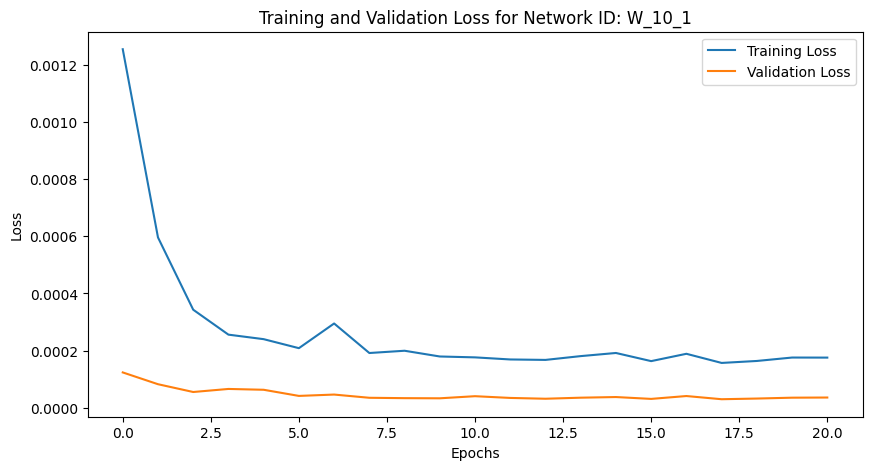

Training Progress:   0%|          | 20/10000 [00:38<5:20:06,  1.92s/epoch, loss=0.000176, val_loss=3.62e-5, patience=1]


Mean Squared Error: 0.0003438379686520979
Iteration: 1, Window Size: 10, Y Days Ahead: 2
X shape: (3796, 10)
y shape: (3796, 2)
Initializing network with layer sizes: [10, 128, 64, 32, 2]
params_W_10_2.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 10), (3036, 2), Validation data shape: (380, 10), (380, 2), Testing data shape: (380, 10), (380, 2)
Parameters loaded from params_W_10_2.npz


Training Progress:   0%|          | 23/10000 [00:32<3:44:14,  1.35s/epoch, loss=0.000226, val_loss=4.53e-5, patience=1]

Epoch 24/10000, Training Loss: 0.000226, Validation Loss: 0.000045
Early stopping at epoch 24. Best validation loss: 0.000043


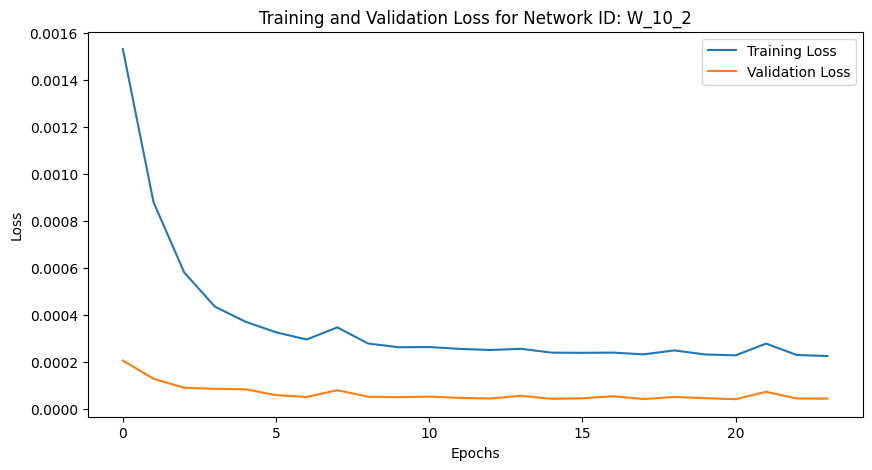

Training Progress:   0%|          | 23/10000 [00:33<3:59:25,  1.44s/epoch, loss=0.000226, val_loss=4.53e-5, patience=1]


Mean Squared Error: 0.00045094629398932434
Iteration: 2, Window Size: 10, Y Days Ahead: 3
X shape: (3795, 10)
y shape: (3795, 3)
Initializing network with layer sizes: [10, 128, 64, 32, 3]
params_W_10_3.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 10), (3036, 3), Validation data shape: (379, 10), (379, 3), Testing data shape: (380, 10), (380, 3)
Parameters loaded from params_W_10_3.npz


Training Progress:   0%|          | 10/10000 [00:15<3:42:53,  1.34s/epoch, loss=0.000325, val_loss=6.77e-5, patience=1]

Epoch 11/10000, Training Loss: 0.000325, Validation Loss: 0.000068
Early stopping at epoch 11. Best validation loss: 0.000063


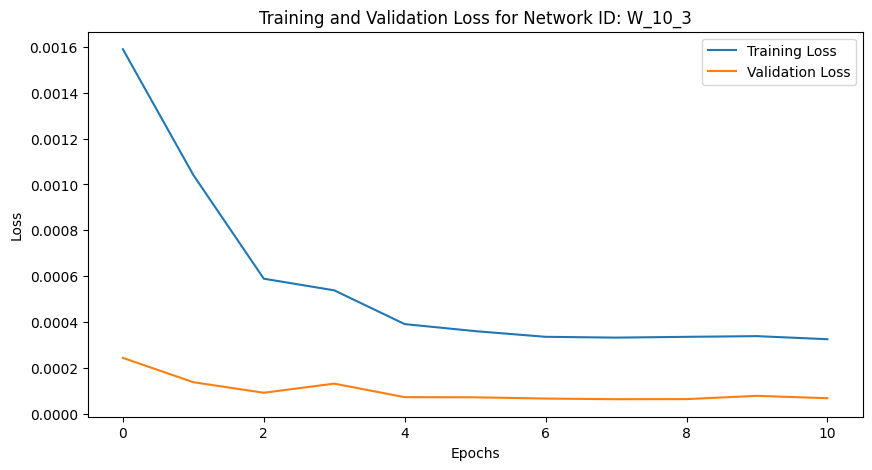

Training Progress:   0%|          | 10/10000 [00:15<4:12:45,  1.52s/epoch, loss=0.000325, val_loss=6.77e-5, patience=1]


Mean Squared Error: 0.0005482080065803543
Iteration: 3, Window Size: 10, Y Days Ahead: 4
X shape: (3794, 10)
y shape: (3794, 4)
Initializing network with layer sizes: [10, 128, 64, 32, 4]
params_W_10_4.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 10), (3035, 4), Validation data shape: (379, 10), (379, 4), Testing data shape: (380, 10), (380, 4)
Parameters loaded from params_W_10_4.npz


Training Progress:   0%|          | 10/10000 [00:22<6:57:40,  2.51s/epoch, loss=0.000464, val_loss=8.72e-5, patience=1]

Epoch 11/10000, Training Loss: 0.000464, Validation Loss: 0.000087
Early stopping at epoch 11. Best validation loss: 0.000077


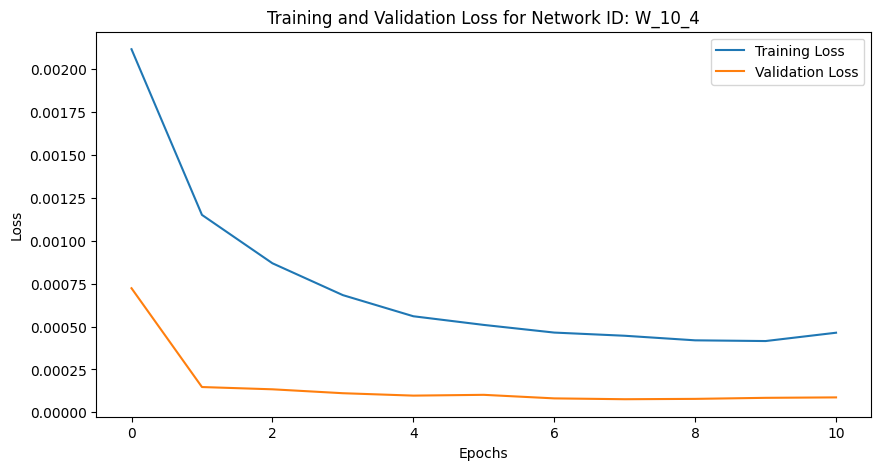

Training Progress:   0%|          | 10/10000 [00:22<6:17:53,  2.27s/epoch, loss=0.000464, val_loss=8.72e-5, patience=1]


Mean Squared Error: 0.0006217442300858862
Iteration: 4, Window Size: 10, Y Days Ahead: 5
X shape: (3793, 10)
y shape: (3793, 5)
Initializing network with layer sizes: [10, 128, 64, 32, 5]
params_W_10_5.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 10), (3034, 5), Validation data shape: (379, 10), (379, 5), Testing data shape: (380, 10), (380, 5)
Parameters loaded from params_W_10_5.npz


Training Progress:   0%|          | 15/10000 [00:27<4:34:49,  1.65s/epoch, loss=0.000453, val_loss=8.59e-5, patience=1]

Epoch 16/10000, Training Loss: 0.000453, Validation Loss: 0.000086
Early stopping at epoch 16. Best validation loss: 0.000083


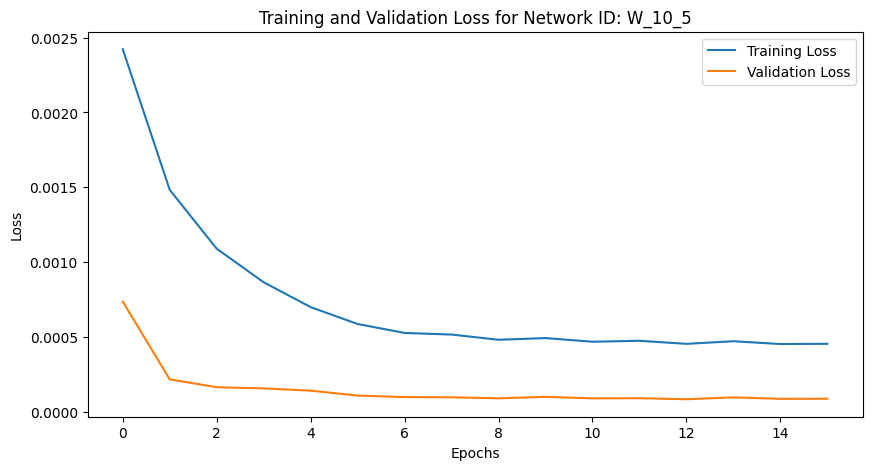

Training Progress:   0%|          | 15/10000 [00:27<5:10:01,  1.86s/epoch, loss=0.000453, val_loss=8.59e-5, patience=1]


Mean Squared Error: 0.0007648351728214264
Iteration: 5, Window Size: 10, Y Days Ahead: 6
X shape: (3792, 10)
y shape: (3792, 6)
Initializing network with layer sizes: [10, 128, 64, 32, 6]
params_W_10_6.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 10), (3033, 6), Validation data shape: (379, 10), (379, 6), Testing data shape: (380, 10), (380, 6)
Parameters loaded from params_W_10_6.npz


Training Progress:   0%|          | 9/10000 [00:14<3:44:29,  1.35s/epoch, loss=0.000633, val_loss=0.000138, patience=1]

Epoch 10/10000, Training Loss: 0.000633, Validation Loss: 0.000138
Early stopping at epoch 10. Best validation loss: 0.000109


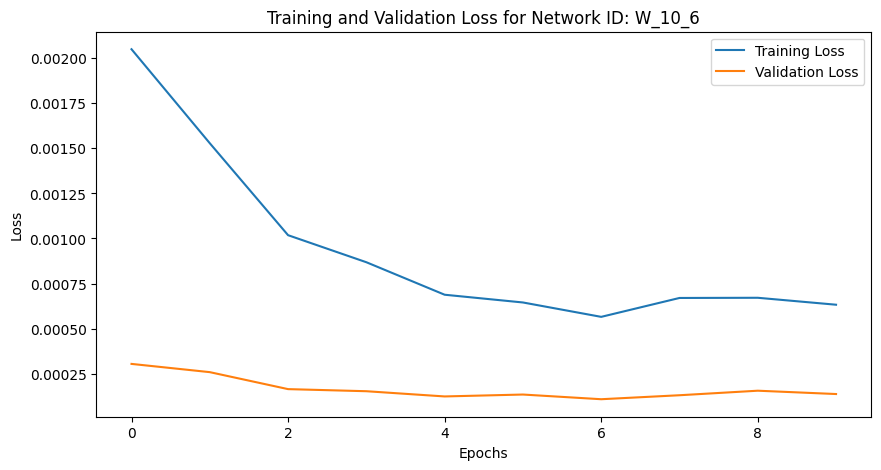

Training Progress:   0%|          | 9/10000 [00:14<4:23:28,  1.58s/epoch, loss=0.000633, val_loss=0.000138, patience=1]


Mean Squared Error: 0.000871544680645966
Iteration: 6, Window Size: 10, Y Days Ahead: 7
X shape: (3791, 10)
y shape: (3791, 7)
Initializing network with layer sizes: [10, 128, 64, 32, 7]
params_W_10_7.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 10), (3032, 7), Validation data shape: (379, 10), (379, 7), Testing data shape: (380, 10), (380, 7)
Parameters loaded from params_W_10_7.npz


Training Progress:   0%|          | 32/10000 [00:46<3:46:24,  1.36s/epoch, loss=0.000583, val_loss=0.00011, patience=1] 

Epoch 33/10000, Training Loss: 0.000583, Validation Loss: 0.000110
Early stopping at epoch 33. Best validation loss: 0.000104


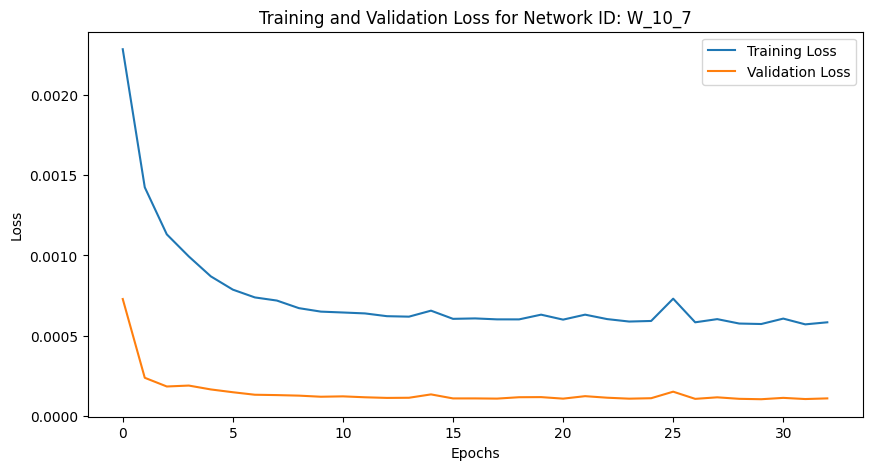

Training Progress:   0%|          | 32/10000 [00:46<4:02:49,  1.46s/epoch, loss=0.000583, val_loss=0.00011, patience=1]


Mean Squared Error: 0.0009769541210301253
Iteration: 7, Window Size: 10, Y Days Ahead: 8
X shape: (3790, 10)
y shape: (3790, 8)
Initializing network with layer sizes: [10, 128, 64, 32, 8]
params_W_10_8.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 10), (3032, 8), Validation data shape: (379, 10), (379, 8), Testing data shape: (379, 10), (379, 8)
Parameters loaded from params_W_10_8.npz


Training Progress:   0%|          | 24/10000 [00:35<3:52:48,  1.40s/epoch, loss=0.000676, val_loss=0.000129, patience=1]

Epoch 25/10000, Training Loss: 0.000676, Validation Loss: 0.000129
Early stopping at epoch 25. Best validation loss: 0.000123


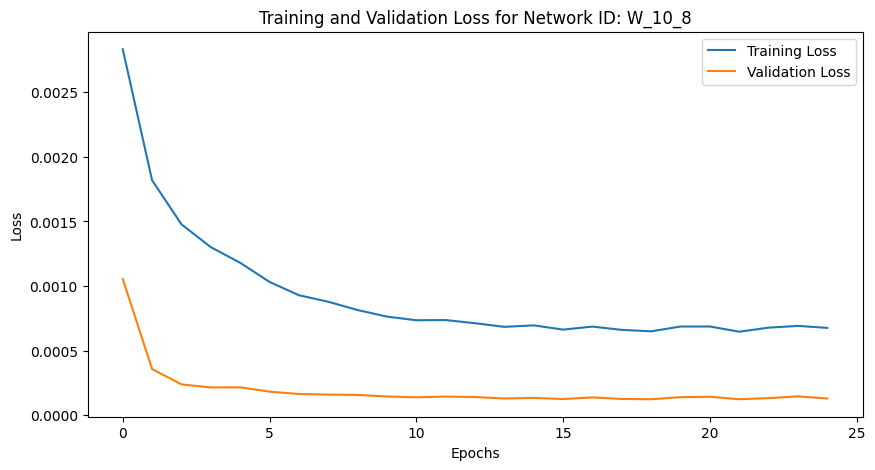

Training Progress:   0%|          | 24/10000 [00:35<4:06:20,  1.48s/epoch, loss=0.000676, val_loss=0.000129, patience=1]


Mean Squared Error: 0.0010714687449576705
Iteration: 8, Window Size: 10, Y Days Ahead: 9
X shape: (3789, 10)
y shape: (3789, 9)
Initializing network with layer sizes: [10, 128, 64, 32, 9]
params_W_10_9.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 10), (3031, 9), Validation data shape: (379, 10), (379, 9), Testing data shape: (379, 10), (379, 9)
Parameters loaded from params_W_10_9.npz


Training Progress:   0%|          | 22/10000 [00:34<3:54:08,  1.41s/epoch, loss=0.000737, val_loss=0.000136, patience=1]

Epoch 23/10000, Training Loss: 0.000737, Validation Loss: 0.000136
Early stopping at epoch 23. Best validation loss: 0.000136


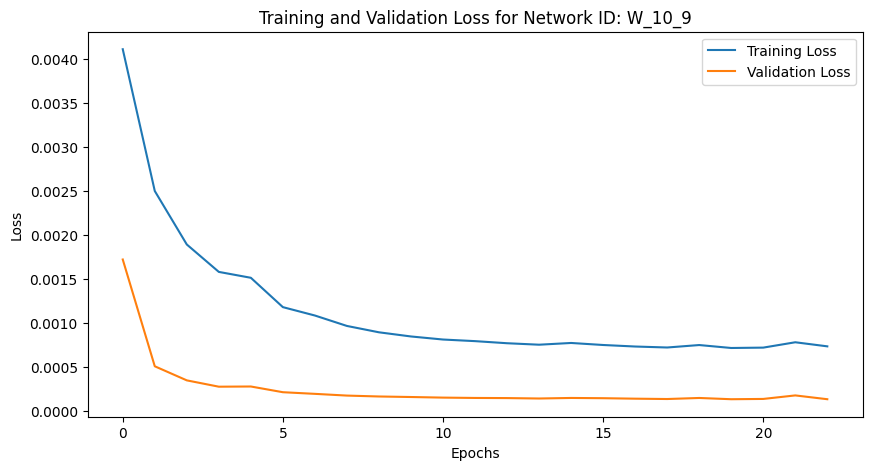

Training Progress:   0%|          | 22/10000 [00:34<4:19:24,  1.56s/epoch, loss=0.000737, val_loss=0.000136, patience=1]


Mean Squared Error: 0.0011968904165718555
Iteration: 9, Window Size: 10, Y Days Ahead: 10
X shape: (3788, 10)
y shape: (3788, 10)
Initializing network with layer sizes: [10, 128, 64, 32, 10]
params_W_10_10.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 10), (3030, 10), Validation data shape: (379, 10), (379, 10), Testing data shape: (379, 10), (379, 10)
Parameters loaded from params_W_10_10.npz


Training Progress:   0%|          | 23/10000 [00:33<3:50:46,  1.39s/epoch, loss=0.000764, val_loss=0.000146, patience=1]

Epoch 24/10000, Training Loss: 0.000764, Validation Loss: 0.000146
Early stopping at epoch 24. Best validation loss: 0.000145


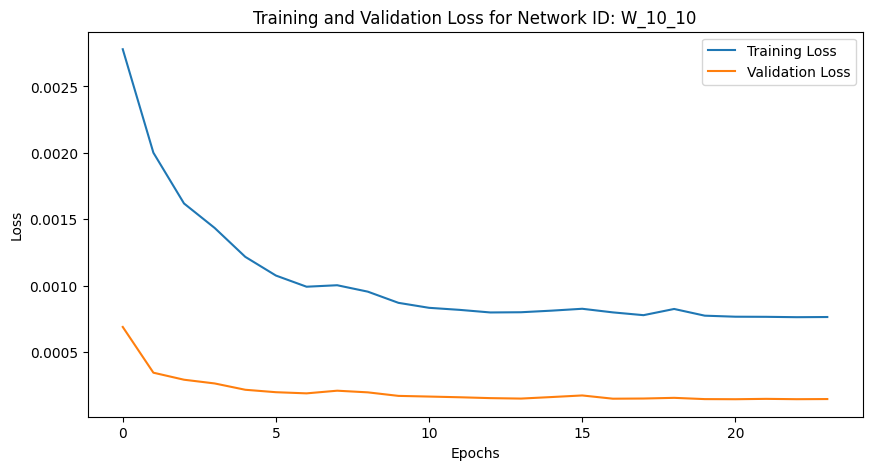

Training Progress:   0%|          | 23/10000 [00:33<4:03:12,  1.46s/epoch, loss=0.000764, val_loss=0.000146, patience=1]


Mean Squared Error: 0.0012763639290252807
Iteration: 10, Window Size: 20, Y Days Ahead: 1
X shape: (3787, 20)
y shape: (3787, 1)
Initializing network with layer sizes: [20, 128, 64, 32, 1]
params_W_20_1.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 20), (3029, 1), Validation data shape: (379, 20), (379, 1), Testing data shape: (379, 20), (379, 1)
Parameters loaded from params_W_20_1.npz


Training Progress:   0%|          | 14/10000 [00:22<4:02:34,  1.46s/epoch, loss=0.000213, val_loss=5.86e-5, patience=1]

Epoch 15/10000, Training Loss: 0.000213, Validation Loss: 0.000059
Early stopping at epoch 15. Best validation loss: 0.000047


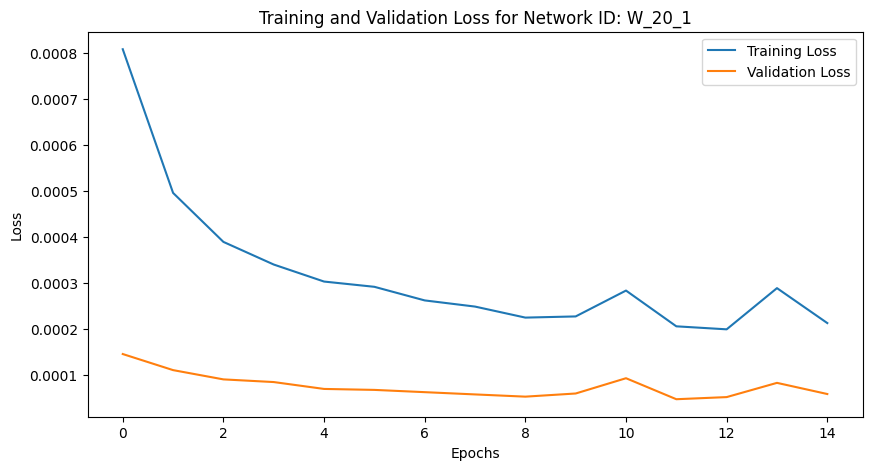

Training Progress:   0%|          | 14/10000 [00:22<4:25:50,  1.60s/epoch, loss=0.000213, val_loss=5.86e-5, patience=1]


Mean Squared Error: 0.0003801324232276503
Iteration: 11, Window Size: 20, Y Days Ahead: 2
X shape: (3786, 20)
y shape: (3786, 2)
Initializing network with layer sizes: [20, 128, 64, 32, 2]
params_W_20_2.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 20), (3028, 2), Validation data shape: (379, 20), (379, 2), Testing data shape: (379, 20), (379, 2)
Parameters loaded from params_W_20_2.npz


Training Progress:   0%|          | 11/10000 [00:17<4:04:45,  1.47s/epoch, loss=0.000352, val_loss=7.64e-5, patience=1]

Epoch 12/10000, Training Loss: 0.000352, Validation Loss: 0.000076
Early stopping at epoch 12. Best validation loss: 0.000076


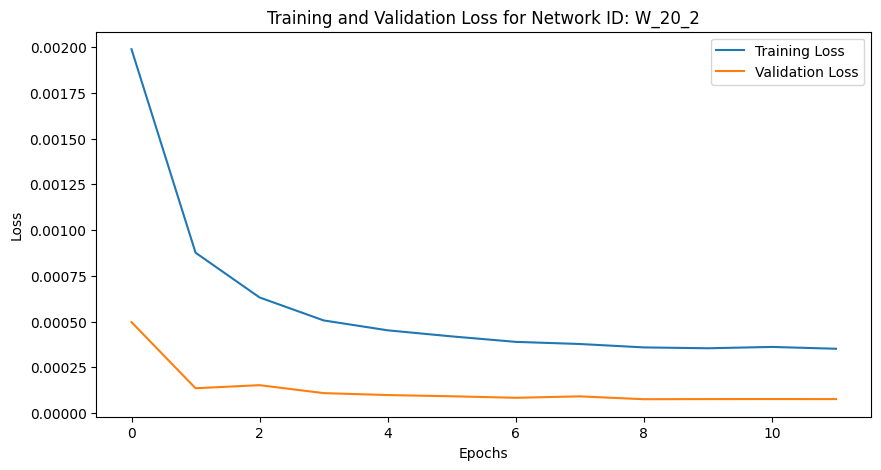

Training Progress:   0%|          | 11/10000 [00:17<4:27:53,  1.61s/epoch, loss=0.000352, val_loss=7.64e-5, patience=1]


Mean Squared Error: 0.0005132270578787721
Iteration: 12, Window Size: 20, Y Days Ahead: 3
X shape: (3785, 20)
y shape: (3785, 3)
Initializing network with layer sizes: [20, 128, 64, 32, 3]
params_W_20_3.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 20), (3028, 3), Validation data shape: (378, 20), (378, 3), Testing data shape: (379, 20), (379, 3)
Parameters loaded from params_W_20_3.npz


Training Progress:   0%|          | 26/10000 [00:39<3:57:19,  1.43s/epoch, loss=0.000352, val_loss=7.11e-5, patience=1]

Epoch 27/10000, Training Loss: 0.000352, Validation Loss: 0.000071
Early stopping at epoch 27. Best validation loss: 0.000064


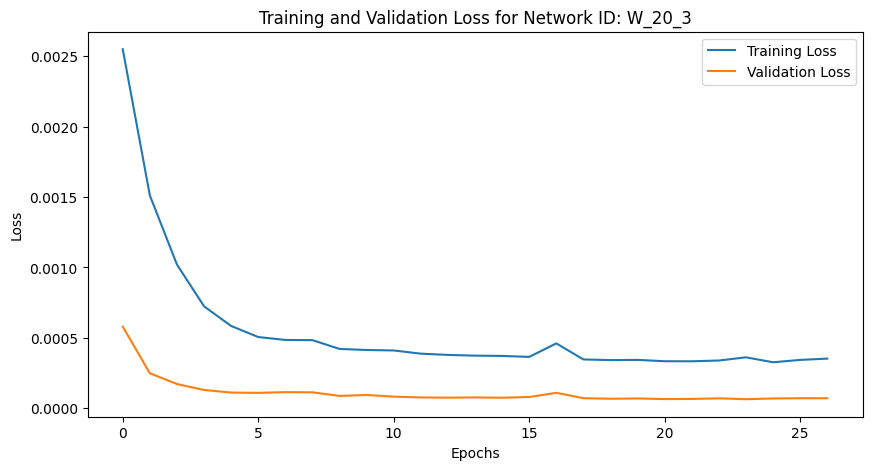

Training Progress:   0%|          | 26/10000 [00:39<4:13:01,  1.52s/epoch, loss=0.000352, val_loss=7.11e-5, patience=1]


Mean Squared Error: 0.0005589654453934925
Iteration: 13, Window Size: 20, Y Days Ahead: 4
X shape: (3784, 20)
y shape: (3784, 4)
Initializing network with layer sizes: [20, 128, 64, 32, 4]
params_W_20_4.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 20), (3027, 4), Validation data shape: (378, 20), (378, 4), Testing data shape: (379, 20), (379, 4)
Parameters loaded from params_W_20_4.npz


Training Progress:   0%|          | 22/10000 [00:34<4:36:03,  1.66s/epoch, loss=0.000433, val_loss=9.13e-5, patience=1] 

Epoch 23/10000, Training Loss: 0.000433, Validation Loss: 0.000091
Early stopping at epoch 23. Best validation loss: 0.000080


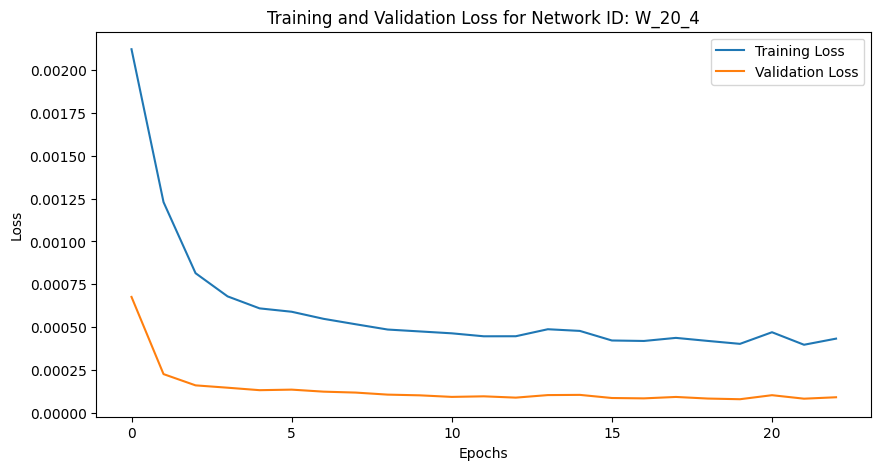

Training Progress:   0%|          | 22/10000 [00:35<4:25:29,  1.60s/epoch, loss=0.000433, val_loss=9.13e-5, patience=1]


Mean Squared Error: 0.0006539101454115555
Iteration: 14, Window Size: 20, Y Days Ahead: 5
X shape: (3783, 20)
y shape: (3783, 5)
Initializing network with layer sizes: [20, 128, 64, 32, 5]
params_W_20_5.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 20), (3026, 5), Validation data shape: (378, 20), (378, 5), Testing data shape: (379, 20), (379, 5)
Parameters loaded from params_W_20_5.npz


Training Progress:   0%|          | 19/10000 [00:33<4:19:37,  1.56s/epoch, loss=0.000557, val_loss=0.000121, patience=1]

Epoch 20/10000, Training Loss: 0.000557, Validation Loss: 0.000121
Early stopping at epoch 20. Best validation loss: 0.000108


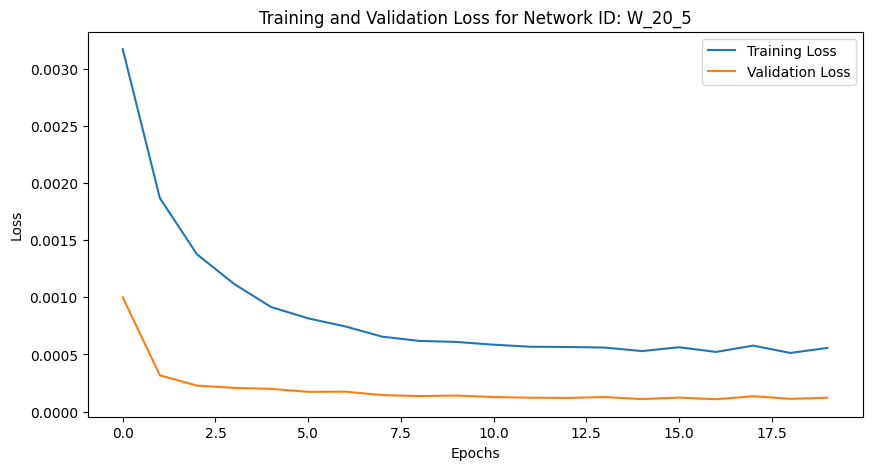

Training Progress:   0%|          | 19/10000 [00:33<4:54:12,  1.77s/epoch, loss=0.000557, val_loss=0.000121, patience=1]


Mean Squared Error: 0.0008072434565516002
Iteration: 15, Window Size: 20, Y Days Ahead: 6
X shape: (3782, 20)
y shape: (3782, 6)
Initializing network with layer sizes: [20, 128, 64, 32, 6]
params_W_20_6.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 20), (3025, 6), Validation data shape: (378, 20), (378, 6), Testing data shape: (379, 20), (379, 6)
Parameters loaded from params_W_20_6.npz


Training Progress:   0%|          | 26/10000 [00:46<7:21:00,  2.65s/epoch, loss=0.000554, val_loss=0.00011, patience=1] 

Epoch 27/10000, Training Loss: 0.000554, Validation Loss: 0.000110
Early stopping at epoch 27. Best validation loss: 0.000110


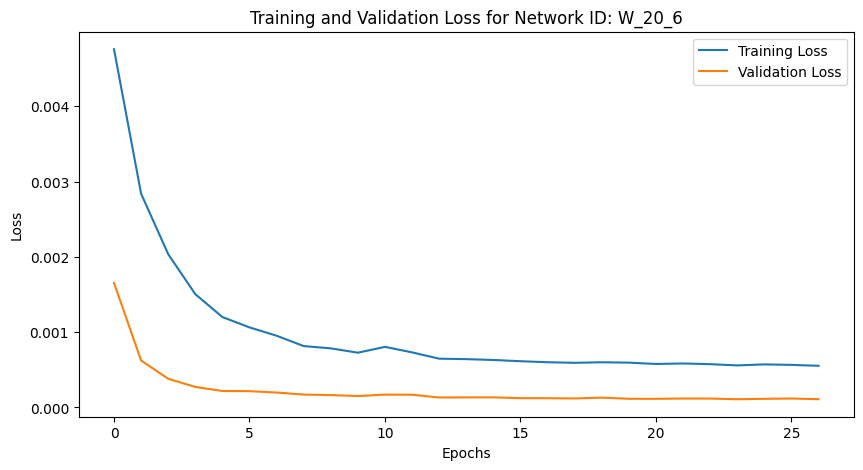

Training Progress:   0%|          | 26/10000 [00:46<4:56:21,  1.78s/epoch, loss=0.000554, val_loss=0.00011, patience=1]


Mean Squared Error: 0.000917637015710865
Iteration: 16, Window Size: 20, Y Days Ahead: 7
X shape: (3781, 20)
y shape: (3781, 7)
Initializing network with layer sizes: [20, 128, 64, 32, 7]
params_W_20_7.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 20), (3024, 7), Validation data shape: (378, 20), (378, 7), Testing data shape: (379, 20), (379, 7)
Parameters loaded from params_W_20_7.npz


Training Progress:   0%|          | 34/10000 [01:09<5:25:15,  1.96s/epoch, loss=0.000599, val_loss=0.000121, patience=1]

Epoch 35/10000, Training Loss: 0.000599, Validation Loss: 0.000121
Early stopping at epoch 35. Best validation loss: 0.000120


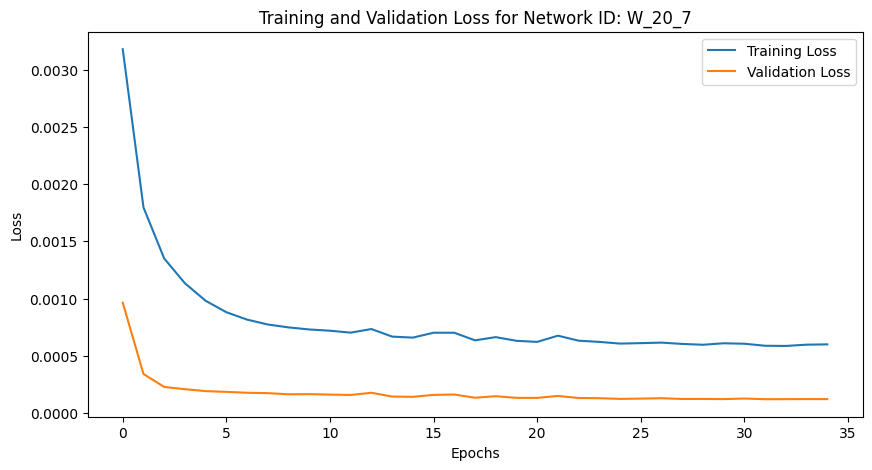

Training Progress:   0%|          | 34/10000 [01:09<5:41:53,  2.06s/epoch, loss=0.000599, val_loss=0.000121, patience=1]


Mean Squared Error: 0.0009038731270561161
Iteration: 17, Window Size: 20, Y Days Ahead: 8
X shape: (3780, 20)
y shape: (3780, 8)
Initializing network with layer sizes: [20, 128, 64, 32, 8]
params_W_20_8.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 20), (3024, 8), Validation data shape: (378, 20), (378, 8), Testing data shape: (378, 20), (378, 8)
Parameters loaded from params_W_20_8.npz


Training Progress:   0%|          | 28/10000 [00:53<5:30:23,  1.99s/epoch, loss=0.000667, val_loss=0.000142, patience=1]

Epoch 29/10000, Training Loss: 0.000667, Validation Loss: 0.000142
Early stopping at epoch 29. Best validation loss: 0.000137


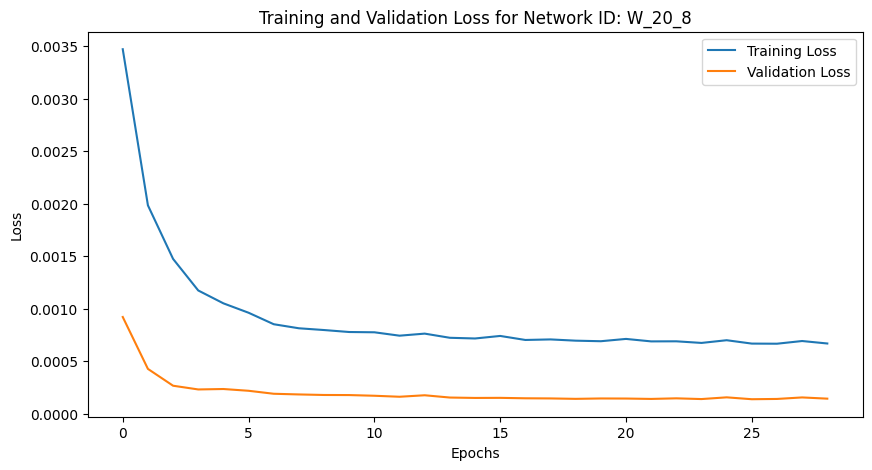

Training Progress:   0%|          | 28/10000 [00:53<5:19:48,  1.92s/epoch, loss=0.000667, val_loss=0.000142, patience=1]


Mean Squared Error: 0.0010672926432133156
Iteration: 18, Window Size: 20, Y Days Ahead: 9
X shape: (3779, 20)
y shape: (3779, 9)
Initializing network with layer sizes: [20, 128, 64, 32, 9]
params_W_20_9.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 20), (3023, 9), Validation data shape: (378, 20), (378, 9), Testing data shape: (378, 20), (378, 9)
Parameters loaded from params_W_20_9.npz


Training Progress:   0%|          | 19/10000 [00:29<4:05:53,  1.48s/epoch, loss=0.000812, val_loss=0.000193, patience=1]

Epoch 20/10000, Training Loss: 0.000812, Validation Loss: 0.000193
Early stopping at epoch 20. Best validation loss: 0.000177


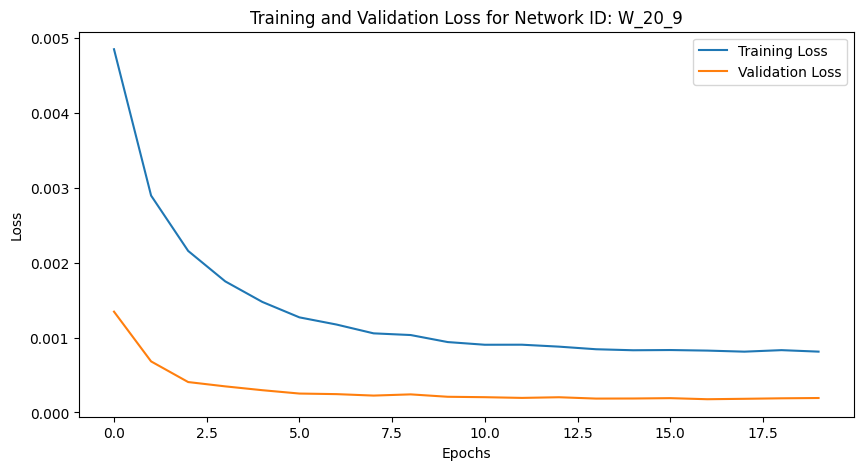

Training Progress:   0%|          | 19/10000 [00:29<4:21:22,  1.57s/epoch, loss=0.000812, val_loss=0.000193, patience=1]


Mean Squared Error: 0.0012786614489888608
Iteration: 19, Window Size: 20, Y Days Ahead: 10
X shape: (3778, 20)
y shape: (3778, 10)
Initializing network with layer sizes: [20, 128, 64, 32, 10]
params_W_20_10.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 20), (3022, 10), Validation data shape: (378, 20), (378, 10), Testing data shape: (378, 20), (378, 10)
Parameters loaded from params_W_20_10.npz


Training Progress:   0%|          | 22/10000 [00:34<4:08:57,  1.50s/epoch, loss=0.000805, val_loss=0.000176, patience=1]

Epoch 23/10000, Training Loss: 0.000805, Validation Loss: 0.000176
Early stopping at epoch 23. Best validation loss: 0.000174


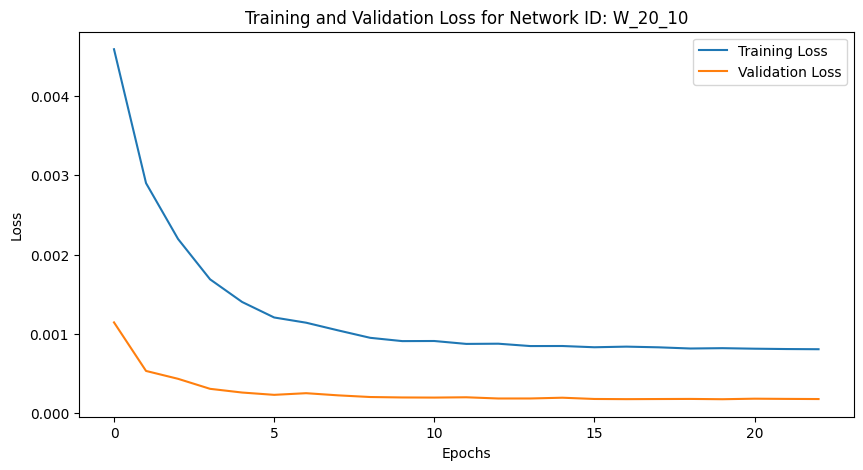

Training Progress:   0%|          | 22/10000 [00:34<4:23:05,  1.58s/epoch, loss=0.000805, val_loss=0.000176, patience=1]


Mean Squared Error: 0.0012751396137587647
Iteration: 20, Window Size: 30, Y Days Ahead: 1
X shape: (3777, 30)
y shape: (3777, 1)
Initializing network with layer sizes: [30, 128, 64, 32, 1]
params_W_30_1.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 30), (3021, 1), Validation data shape: (378, 30), (378, 1), Testing data shape: (378, 30), (378, 1)
Parameters loaded from params_W_30_1.npz


Training Progress:   0%|          | 20/10000 [00:32<4:06:11,  1.48s/epoch, loss=0.000266, val_loss=7.2e-5, patience=1]  

Epoch 21/10000, Training Loss: 0.000266, Validation Loss: 0.000072
Early stopping at epoch 21. Best validation loss: 0.000039


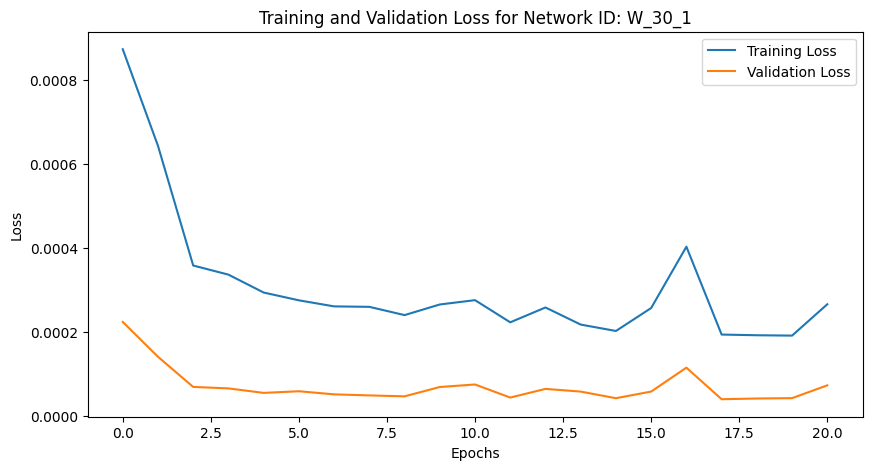

Training Progress:   0%|          | 20/10000 [00:32<4:31:45,  1.63s/epoch, loss=0.000266, val_loss=7.2e-5, patience=1]


Mean Squared Error: 0.0003561044915312089
Iteration: 21, Window Size: 30, Y Days Ahead: 2
X shape: (3776, 30)
y shape: (3776, 2)
Initializing network with layer sizes: [30, 128, 64, 32, 2]
params_W_30_2.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 30), (3020, 2), Validation data shape: (378, 30), (378, 2), Testing data shape: (378, 30), (378, 2)
Parameters loaded from params_W_30_2.npz


Training Progress:   0%|          | 23/10000 [00:41<4:51:46,  1.75s/epoch, loss=0.000283, val_loss=6.62e-5, patience=1]

Epoch 24/10000, Training Loss: 0.000283, Validation Loss: 0.000066
Early stopping at epoch 24. Best validation loss: 0.000054


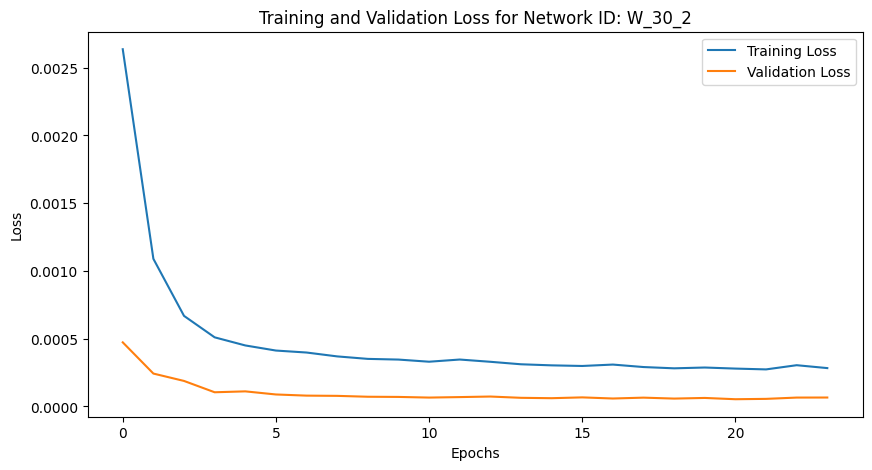

Training Progress:   0%|          | 23/10000 [00:41<5:00:24,  1.81s/epoch, loss=0.000283, val_loss=6.62e-5, patience=1]


Mean Squared Error: 0.0004760453091527459
Iteration: 22, Window Size: 30, Y Days Ahead: 3
X shape: (3775, 30)
y shape: (3775, 3)
Initializing network with layer sizes: [30, 128, 64, 32, 3]
params_W_30_3.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 30), (3020, 3), Validation data shape: (377, 30), (377, 3), Testing data shape: (378, 30), (378, 3)
Parameters loaded from params_W_30_3.npz


Training Progress:   0%|          | 23/10000 [00:38<4:23:29,  1.58s/epoch, loss=0.000369, val_loss=8.34e-5, patience=1] 

Epoch 24/10000, Training Loss: 0.000369, Validation Loss: 0.000083
Early stopping at epoch 24. Best validation loss: 0.000080


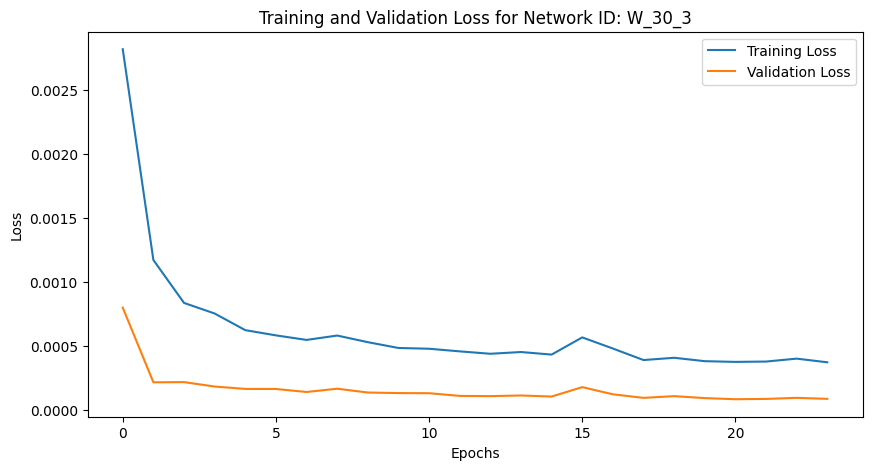

Training Progress:   0%|          | 23/10000 [00:38<4:37:52,  1.67s/epoch, loss=0.000369, val_loss=8.34e-5, patience=1]


Mean Squared Error: 0.0005716882417554507
Iteration: 23, Window Size: 30, Y Days Ahead: 4
X shape: (3774, 30)
y shape: (3774, 4)
Initializing network with layer sizes: [30, 128, 64, 32, 4]
params_W_30_4.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 30), (3019, 4), Validation data shape: (377, 30), (377, 4), Testing data shape: (378, 30), (378, 4)
Parameters loaded from params_W_30_4.npz


Training Progress:   0%|          | 21/10000 [00:35<4:16:27,  1.54s/epoch, loss=0.000497, val_loss=0.000115, patience=1]

Epoch 22/10000, Training Loss: 0.000497, Validation Loss: 0.000115
Early stopping at epoch 22. Best validation loss: 0.000094


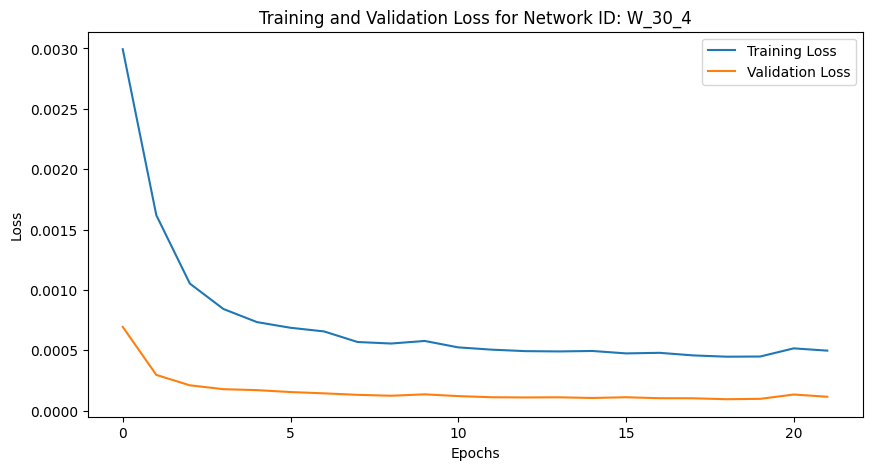

Training Progress:   0%|          | 21/10000 [00:35<4:39:40,  1.68s/epoch, loss=0.000497, val_loss=0.000115, patience=1]


Mean Squared Error: 0.0007161737052161995
Iteration: 24, Window Size: 30, Y Days Ahead: 5
X shape: (3773, 30)
y shape: (3773, 5)
Initializing network with layer sizes: [30, 128, 64, 32, 5]
params_W_30_5.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 30), (3018, 5), Validation data shape: (377, 30), (377, 5), Testing data shape: (378, 30), (378, 5)
Parameters loaded from params_W_30_5.npz


Training Progress:   0%|          | 18/10000 [00:29<4:20:14,  1.56s/epoch, loss=0.000544, val_loss=0.000133, patience=1]

Epoch 19/10000, Training Loss: 0.000544, Validation Loss: 0.000133
Early stopping at epoch 19. Best validation loss: 0.000129


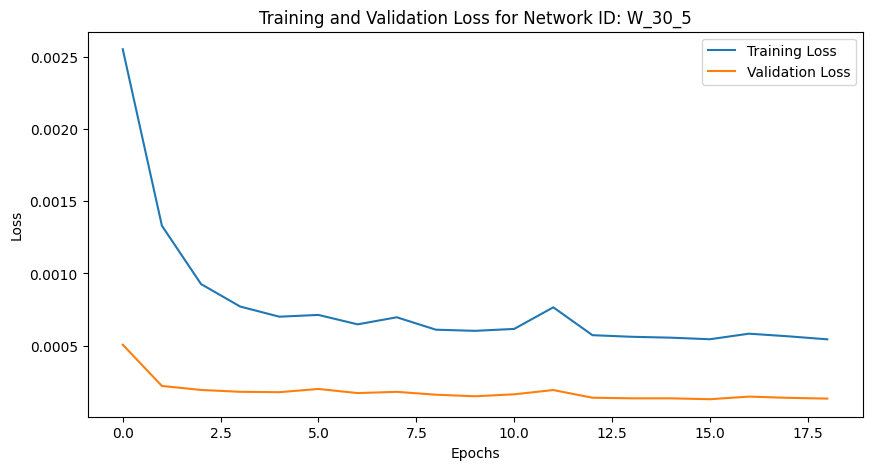

Training Progress:   0%|          | 18/10000 [00:29<4:36:24,  1.66s/epoch, loss=0.000544, val_loss=0.000133, patience=1]


Mean Squared Error: 0.000771507476914374
Iteration: 25, Window Size: 30, Y Days Ahead: 6
X shape: (3772, 30)
y shape: (3772, 6)
Initializing network with layer sizes: [30, 128, 64, 32, 6]
params_W_30_6.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 30), (3017, 6), Validation data shape: (377, 30), (377, 6), Testing data shape: (378, 30), (378, 6)
Parameters loaded from params_W_30_6.npz


Training Progress:   0%|          | 19/10000 [00:32<4:08:42,  1.50s/epoch, loss=0.000621, val_loss=0.00014, patience=1] 

Epoch 20/10000, Training Loss: 0.000621, Validation Loss: 0.000140
Early stopping at epoch 20. Best validation loss: 0.000139


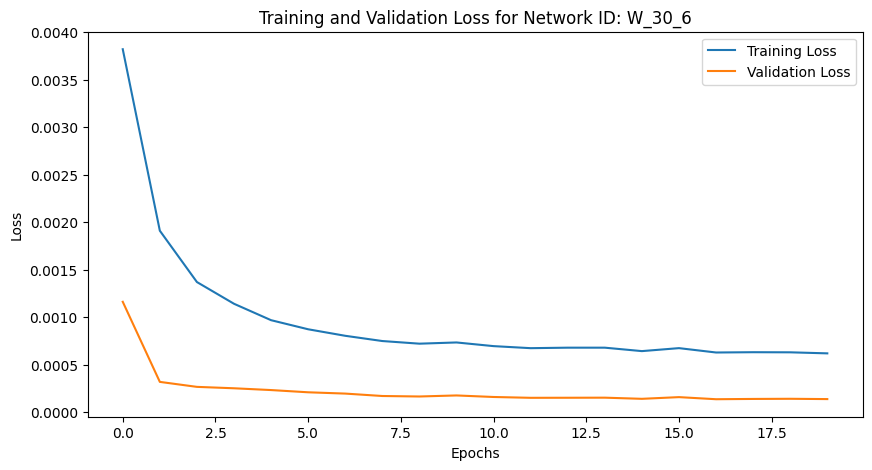

Training Progress:   0%|          | 19/10000 [00:32<4:42:00,  1.70s/epoch, loss=0.000621, val_loss=0.00014, patience=1]


Mean Squared Error: 0.0009620391564873573
Iteration: 26, Window Size: 30, Y Days Ahead: 7
X shape: (3771, 30)
y shape: (3771, 7)
Initializing network with layer sizes: [30, 128, 64, 32, 7]
params_W_30_7.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 30), (3016, 7), Validation data shape: (377, 30), (377, 7), Testing data shape: (378, 30), (378, 7)
Parameters loaded from params_W_30_7.npz


Training Progress:   0%|          | 29/10000 [00:46<4:06:40,  1.48s/epoch, loss=0.00068, val_loss=0.000168, patience=1] 

Epoch 30/10000, Training Loss: 0.000680, Validation Loss: 0.000168
Early stopping at epoch 30. Best validation loss: 0.000152


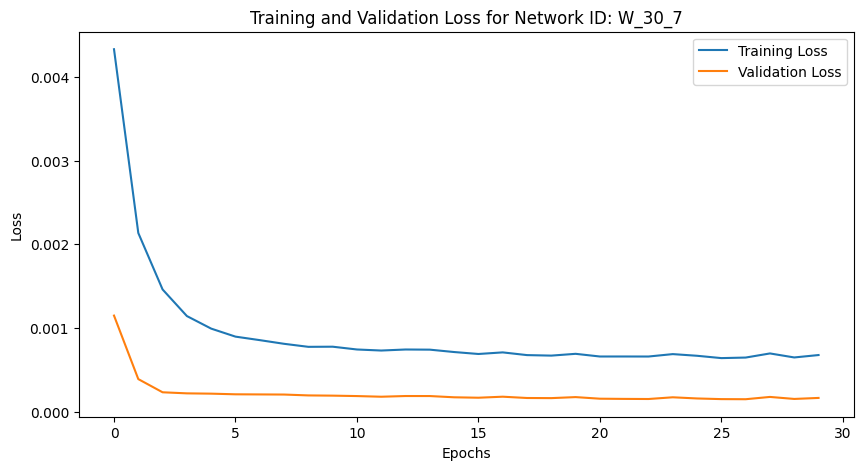

Training Progress:   0%|          | 29/10000 [00:46<4:25:52,  1.60s/epoch, loss=0.00068, val_loss=0.000168, patience=1]


Mean Squared Error: 0.0009773498902913107
Iteration: 27, Window Size: 30, Y Days Ahead: 8
X shape: (3770, 30)
y shape: (3770, 8)
Initializing network with layer sizes: [30, 128, 64, 32, 8]
params_W_30_8.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 30), (3016, 8), Validation data shape: (377, 30), (377, 8), Testing data shape: (377, 30), (377, 8)
Parameters loaded from params_W_30_8.npz


Training Progress:   0%|          | 41/10000 [01:11<4:10:58,  1.51s/epoch, loss=0.000658, val_loss=0.000145, patience=1]

Epoch 42/10000, Training Loss: 0.000658, Validation Loss: 0.000145
Early stopping at epoch 42. Best validation loss: 0.000142


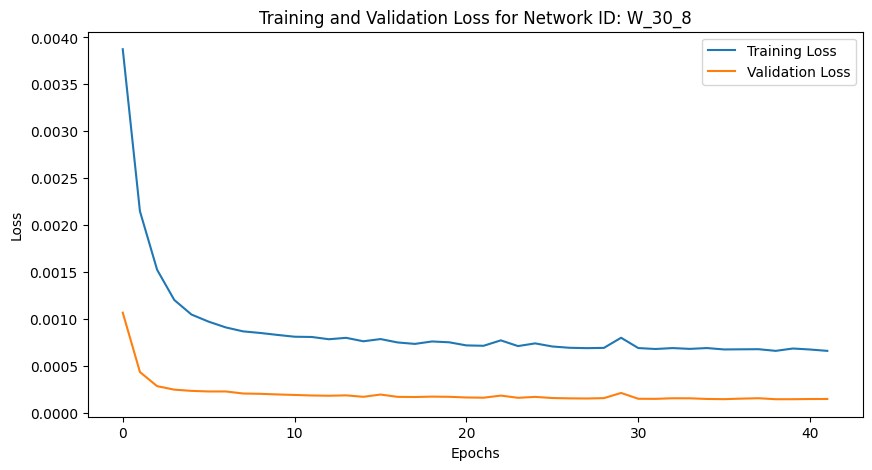

Training Progress:   0%|          | 41/10000 [01:12<4:51:45,  1.76s/epoch, loss=0.000658, val_loss=0.000145, patience=1]


Mean Squared Error: 0.0010296618888702902
Iteration: 28, Window Size: 30, Y Days Ahead: 9
X shape: (3769, 30)
y shape: (3769, 9)
Initializing network with layer sizes: [30, 128, 64, 32, 9]
params_W_30_9.npz not found. Using randomly initialized parameters.
Training data shape: (3015, 30), (3015, 9), Validation data shape: (377, 30), (377, 9), Testing data shape: (377, 30), (377, 9)
Parameters loaded from params_W_30_9.npz


Training Progress:   0%|          | 18/10000 [00:31<4:16:39,  1.54s/epoch, loss=0.000886, val_loss=0.000222, patience=1]

Epoch 19/10000, Training Loss: 0.000886, Validation Loss: 0.000222
Early stopping at epoch 19. Best validation loss: 0.000200


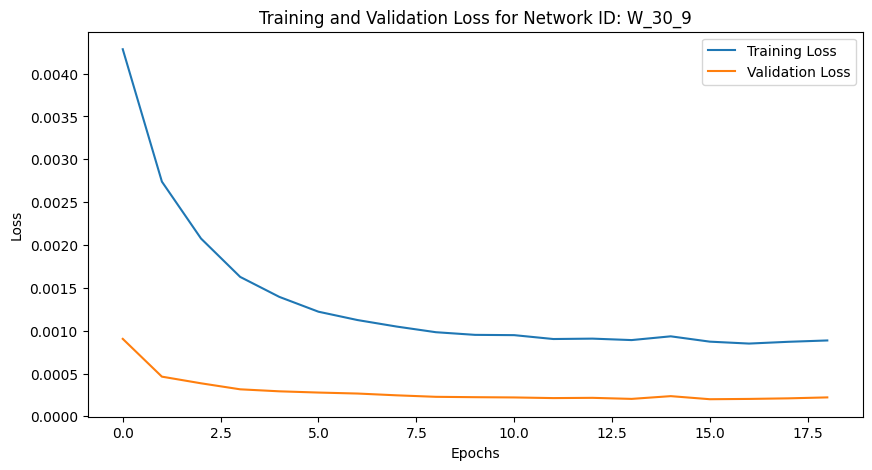

Training Progress:   0%|          | 18/10000 [00:31<4:52:07,  1.76s/epoch, loss=0.000886, val_loss=0.000222, patience=1]


Mean Squared Error: 0.001295890521272177
Iteration: 29, Window Size: 30, Y Days Ahead: 10
X shape: (3768, 30)
y shape: (3768, 10)
Initializing network with layer sizes: [30, 128, 64, 32, 10]
params_W_30_10.npz not found. Using randomly initialized parameters.
Training data shape: (3014, 30), (3014, 10), Validation data shape: (377, 30), (377, 10), Testing data shape: (377, 30), (377, 10)
Parameters loaded from params_W_30_10.npz


Training Progress:   0%|          | 30/10000 [01:00<4:41:23,  1.69s/epoch, loss=0.000818, val_loss=0.000193, patience=1]

Epoch 31/10000, Training Loss: 0.000818, Validation Loss: 0.000193
Early stopping at epoch 31. Best validation loss: 0.000183


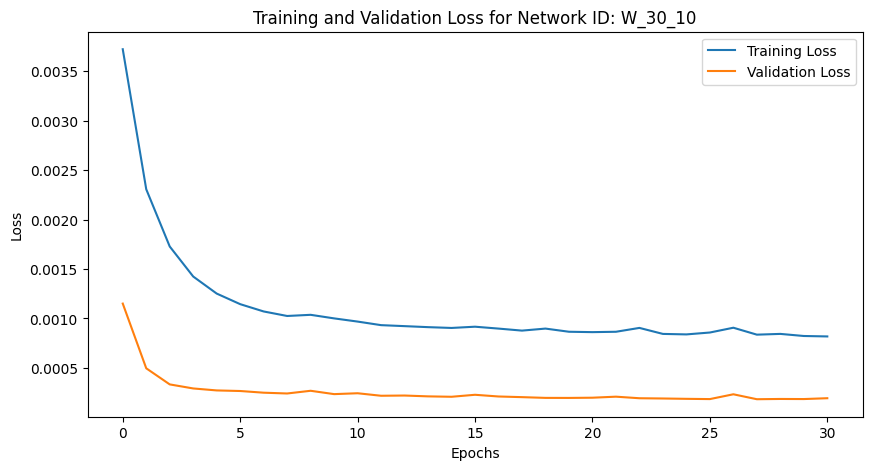

Training Progress:   0%|          | 30/10000 [01:00<5:35:08,  2.02s/epoch, loss=0.000818, val_loss=0.000193, patience=1]


Mean Squared Error: 0.0013032755173025597
Iteration: 30, Window Size: 40, Y Days Ahead: 1
X shape: (3767, 40)
y shape: (3767, 1)
Initializing network with layer sizes: [40, 128, 64, 32, 1]
params_W_40_1.npz not found. Using randomly initialized parameters.
Training data shape: (3013, 40), (3013, 1), Validation data shape: (377, 40), (377, 1), Testing data shape: (377, 40), (377, 1)
Parameters loaded from params_W_40_1.npz


Training Progress:   0%|          | 28/10000 [00:49<4:58:40,  1.80s/epoch, loss=0.000198, val_loss=5.16e-5, patience=1] 

Epoch 29/10000, Training Loss: 0.000198, Validation Loss: 0.000052
Early stopping at epoch 29. Best validation loss: 0.000044


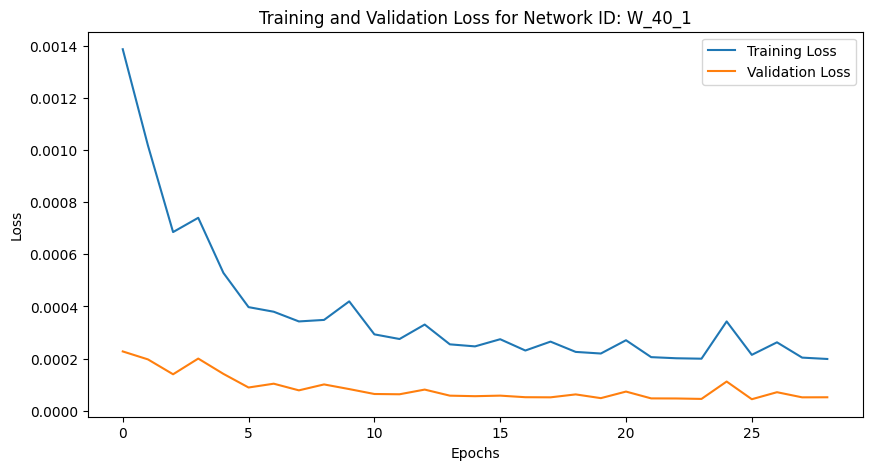

Training Progress:   0%|          | 28/10000 [00:49<4:54:18,  1.77s/epoch, loss=0.000198, val_loss=5.16e-5, patience=1]


Mean Squared Error: 0.0003868791938833306
Iteration: 31, Window Size: 40, Y Days Ahead: 2
X shape: (3766, 40)
y shape: (3766, 2)
Initializing network with layer sizes: [40, 128, 64, 32, 2]
params_W_40_2.npz not found. Using randomly initialized parameters.
Training data shape: (3012, 40), (3012, 2), Validation data shape: (377, 40), (377, 2), Testing data shape: (377, 40), (377, 2)
Parameters loaded from params_W_40_2.npz


Training Progress:   0%|          | 16/10000 [00:28<4:38:48,  1.68s/epoch, loss=0.00052, val_loss=0.000146, patience=1] 

Epoch 17/10000, Training Loss: 0.000520, Validation Loss: 0.000146
Early stopping at epoch 17. Best validation loss: 0.000082


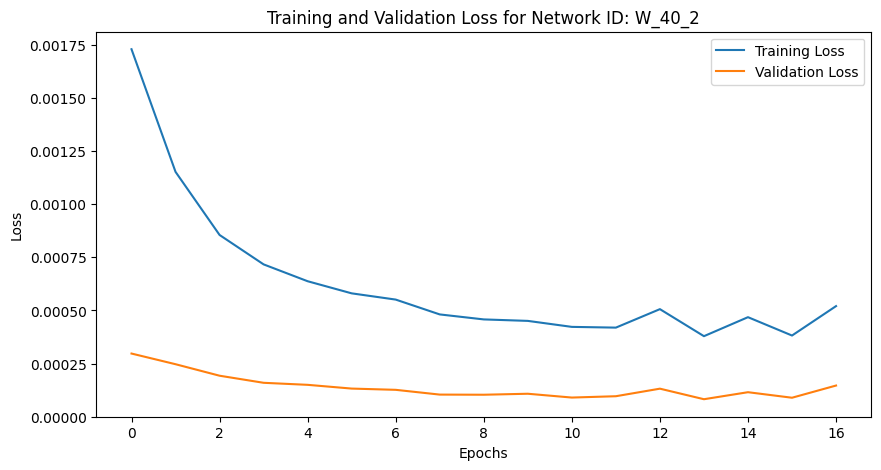

Training Progress:   0%|          | 16/10000 [00:28<4:55:16,  1.77s/epoch, loss=0.00052, val_loss=0.000146, patience=1]


Mean Squared Error: 0.000567408100199585
Iteration: 32, Window Size: 40, Y Days Ahead: 3
X shape: (3765, 40)
y shape: (3765, 3)
Initializing network with layer sizes: [40, 128, 64, 32, 3]
params_W_40_3.npz not found. Using randomly initialized parameters.
Training data shape: (3012, 40), (3012, 3), Validation data shape: (376, 40), (376, 3), Testing data shape: (377, 40), (377, 3)
Parameters loaded from params_W_40_3.npz


Training Progress:   0%|          | 12/10000 [00:25<5:21:50,  1.93s/epoch, loss=0.000524, val_loss=0.000126, patience=1]

Epoch 13/10000, Training Loss: 0.000524, Validation Loss: 0.000126
Early stopping at epoch 13. Best validation loss: 0.000118


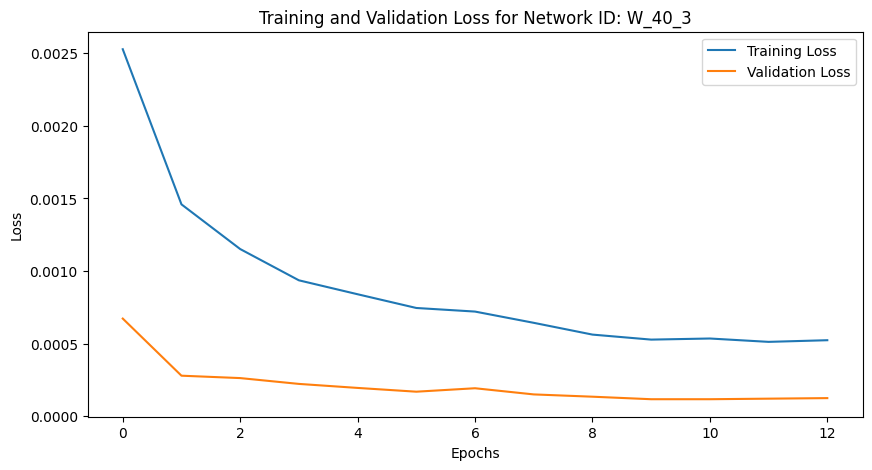

Training Progress:   0%|          | 12/10000 [00:25<5:55:59,  2.14s/epoch, loss=0.000524, val_loss=0.000126, patience=1]


Mean Squared Error: 0.0008019651785407736
Iteration: 33, Window Size: 40, Y Days Ahead: 4
X shape: (3764, 40)
y shape: (3764, 4)
Initializing network with layer sizes: [40, 128, 64, 32, 4]
params_W_40_4.npz not found. Using randomly initialized parameters.
Training data shape: (3011, 40), (3011, 4), Validation data shape: (376, 40), (376, 4), Testing data shape: (377, 40), (377, 4)
Parameters loaded from params_W_40_4.npz


Training Progress:   0%|          | 19/10000 [00:33<4:32:08,  1.64s/epoch, loss=0.000489, val_loss=0.000116, patience=1]

Epoch 20/10000, Training Loss: 0.000489, Validation Loss: 0.000116
Early stopping at epoch 20. Best validation loss: 0.000104


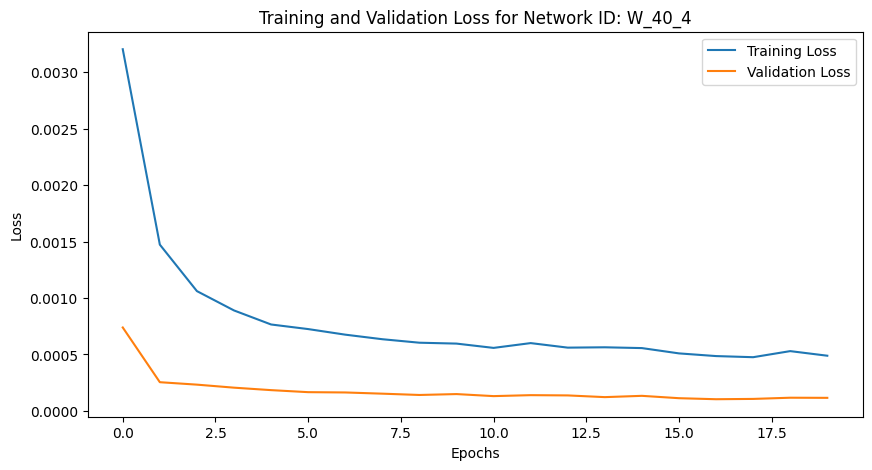

Training Progress:   0%|          | 19/10000 [00:33<4:50:52,  1.75s/epoch, loss=0.000489, val_loss=0.000116, patience=1]


Mean Squared Error: 0.0007492514878347197
Iteration: 34, Window Size: 40, Y Days Ahead: 5
X shape: (3763, 40)
y shape: (3763, 5)
Initializing network with layer sizes: [40, 128, 64, 32, 5]
params_W_40_5.npz not found. Using randomly initialized parameters.
Training data shape: (3010, 40), (3010, 5), Validation data shape: (376, 40), (376, 5), Testing data shape: (377, 40), (377, 5)
Parameters loaded from params_W_40_5.npz


Training Progress:   0%|          | 24/10000 [00:40<4:27:00,  1.61s/epoch, loss=0.000559, val_loss=0.000127, patience=1]

Epoch 25/10000, Training Loss: 0.000559, Validation Loss: 0.000127
Early stopping at epoch 25. Best validation loss: 0.000119


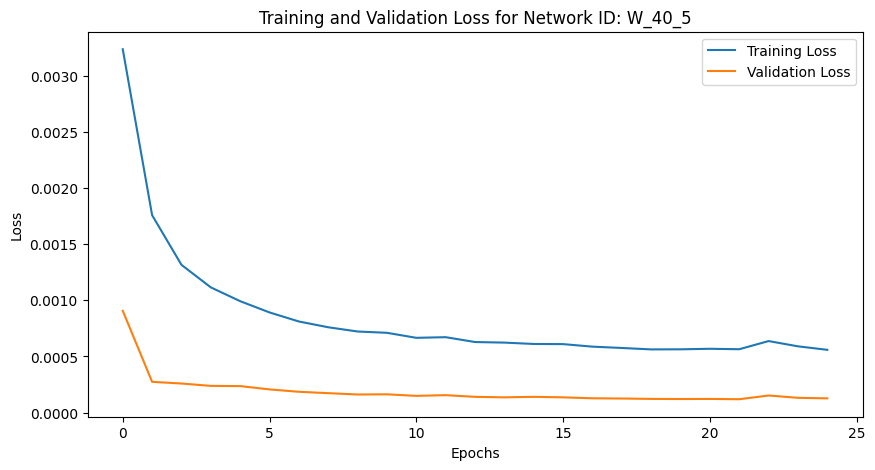

Training Progress:   0%|          | 24/10000 [00:40<4:42:44,  1.70s/epoch, loss=0.000559, val_loss=0.000127, patience=1]


Mean Squared Error: 0.0007836260048245851
Iteration: 35, Window Size: 40, Y Days Ahead: 6
X shape: (3762, 40)
y shape: (3762, 6)
Initializing network with layer sizes: [40, 128, 64, 32, 6]
params_W_40_6.npz not found. Using randomly initialized parameters.
Training data shape: (3009, 40), (3009, 6), Validation data shape: (376, 40), (376, 6), Testing data shape: (377, 40), (377, 6)
Parameters loaded from params_W_40_6.npz


Training Progress:   0%|          | 32/10000 [01:01<4:50:18,  1.75s/epoch, loss=0.000577, val_loss=0.000125, patience=1]

Epoch 33/10000, Training Loss: 0.000577, Validation Loss: 0.000125
Early stopping at epoch 33. Best validation loss: 0.000118


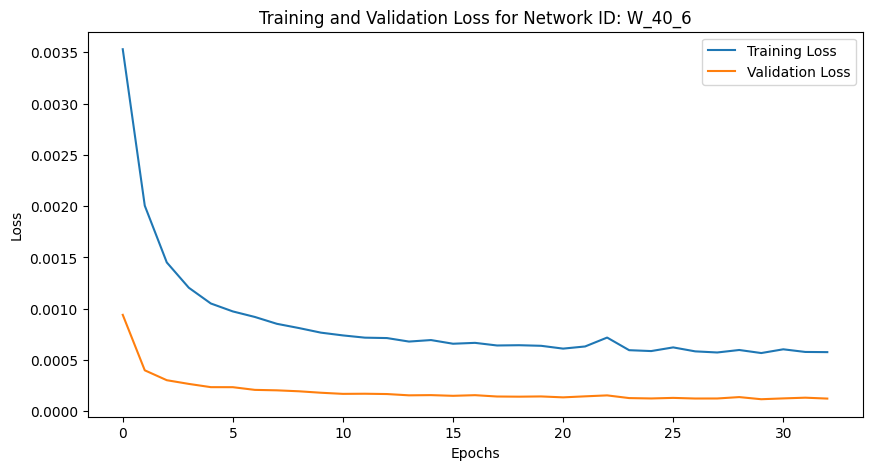

Training Progress:   0%|          | 32/10000 [01:01<5:19:37,  1.92s/epoch, loss=0.000577, val_loss=0.000125, patience=1]


Mean Squared Error: 0.000868581324332608
Iteration: 36, Window Size: 40, Y Days Ahead: 7
X shape: (3761, 40)
y shape: (3761, 7)
Initializing network with layer sizes: [40, 128, 64, 32, 7]
params_W_40_7.npz not found. Using randomly initialized parameters.
Training data shape: (3008, 40), (3008, 7), Validation data shape: (376, 40), (376, 7), Testing data shape: (377, 40), (377, 7)
Parameters loaded from params_W_40_7.npz


Training Progress:   0%|          | 21/10000 [00:36<4:32:19,  1.64s/epoch, loss=0.000709, val_loss=0.000171, patience=1]

Epoch 22/10000, Training Loss: 0.000709, Validation Loss: 0.000171
Early stopping at epoch 22. Best validation loss: 0.000155


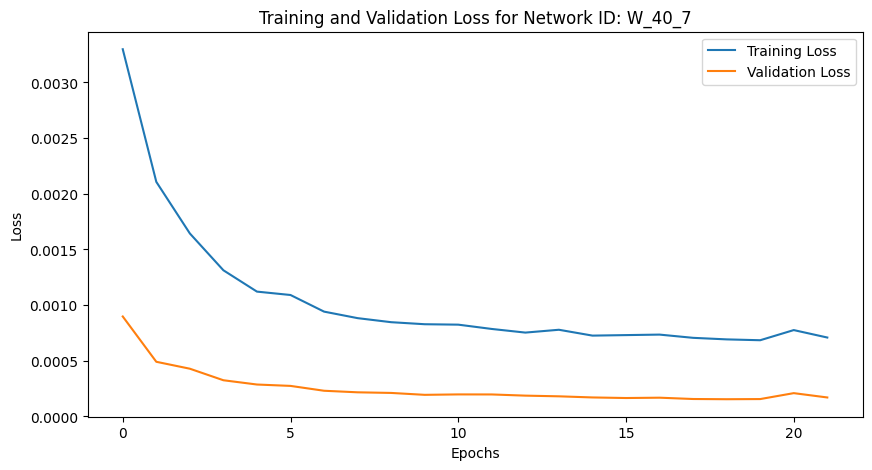

Training Progress:   0%|          | 21/10000 [00:36<4:49:40,  1.74s/epoch, loss=0.000709, val_loss=0.000171, patience=1]


Mean Squared Error: 0.0011030437015973973
Iteration: 37, Window Size: 40, Y Days Ahead: 8
X shape: (3760, 40)
y shape: (3760, 8)
Initializing network with layer sizes: [40, 128, 64, 32, 8]
params_W_40_8.npz not found. Using randomly initialized parameters.
Training data shape: (3008, 40), (3008, 8), Validation data shape: (376, 40), (376, 8), Testing data shape: (376, 40), (376, 8)
Parameters loaded from params_W_40_8.npz


Training Progress:   0%|          | 13/10000 [00:23<4:38:35,  1.67s/epoch, loss=0.000875, val_loss=0.000193, patience=1]

Epoch 14/10000, Training Loss: 0.000875, Validation Loss: 0.000193
Early stopping at epoch 14. Best validation loss: 0.000186


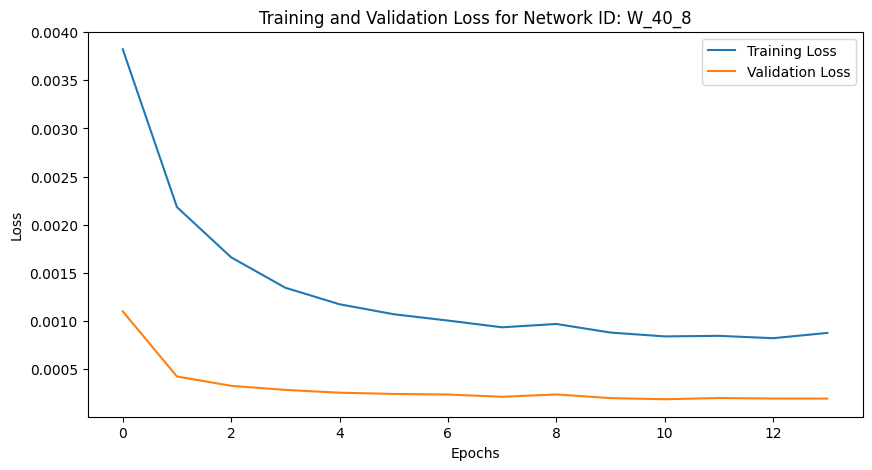

Training Progress:   0%|          | 13/10000 [00:23<5:02:51,  1.82s/epoch, loss=0.000875, val_loss=0.000193, patience=1]


Mean Squared Error: 0.0012378488899809758
Iteration: 38, Window Size: 40, Y Days Ahead: 9
X shape: (3759, 40)
y shape: (3759, 9)
Initializing network with layer sizes: [40, 128, 64, 32, 9]
params_W_40_9.npz not found. Using randomly initialized parameters.
Training data shape: (3007, 40), (3007, 9), Validation data shape: (376, 40), (376, 9), Testing data shape: (376, 40), (376, 9)
Parameters loaded from params_W_40_9.npz


Training Progress:   0%|          | 26/10000 [00:45<4:23:29,  1.59s/epoch, loss=0.000842, val_loss=0.000198, patience=1]

Epoch 27/10000, Training Loss: 0.000842, Validation Loss: 0.000198
Early stopping at epoch 27. Best validation loss: 0.000183


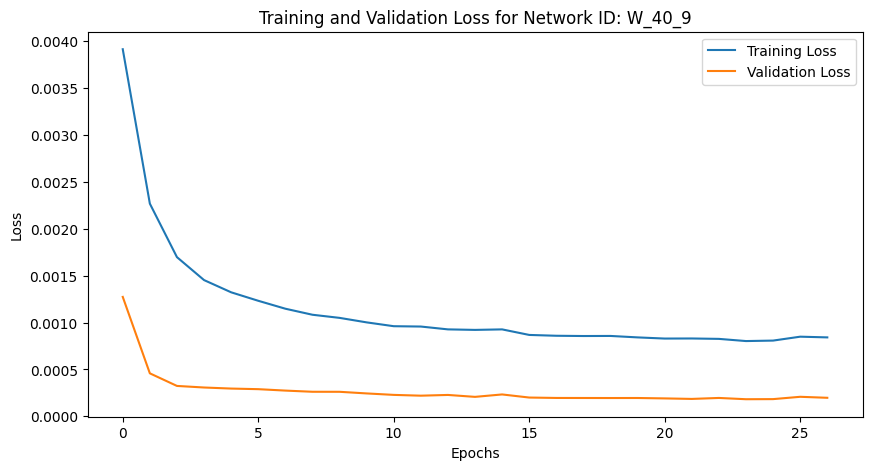

Training Progress:   0%|          | 26/10000 [00:45<4:49:43,  1.74s/epoch, loss=0.000842, val_loss=0.000198, patience=1]


Mean Squared Error: 0.001215102825994117
Iteration: 39, Window Size: 40, Y Days Ahead: 10
X shape: (3758, 40)
y shape: (3758, 10)
Initializing network with layer sizes: [40, 128, 64, 32, 10]
params_W_40_10.npz not found. Using randomly initialized parameters.
Training data shape: (3006, 40), (3006, 10), Validation data shape: (376, 40), (376, 10), Testing data shape: (376, 40), (376, 10)
Parameters loaded from params_W_40_10.npz


Training Progress:   0%|          | 28/10000 [00:47<4:37:19,  1.67s/epoch, loss=0.000841, val_loss=0.000193, patience=1]

Epoch 29/10000, Training Loss: 0.000841, Validation Loss: 0.000193
Early stopping at epoch 29. Best validation loss: 0.000187


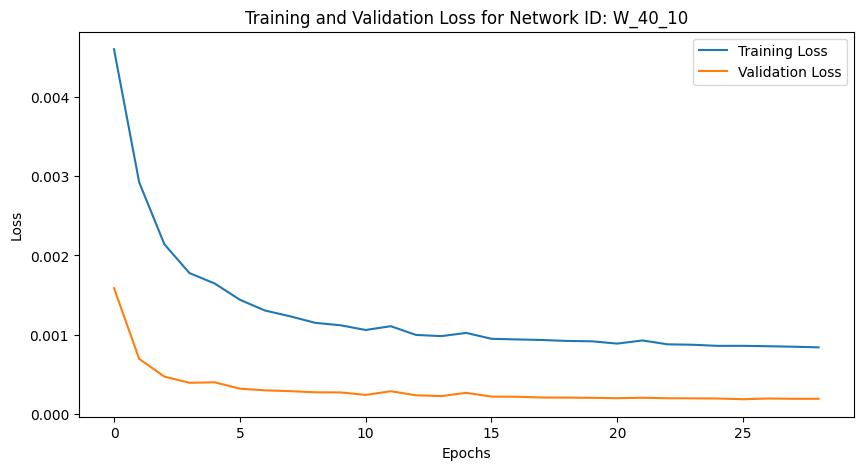

Training Progress:   0%|          | 28/10000 [00:47<4:42:03,  1.70s/epoch, loss=0.000841, val_loss=0.000193, patience=1]


Mean Squared Error: 0.001335126184051062
Iteration: 40, Window Size: 50, Y Days Ahead: 1
X shape: (3757, 50)
y shape: (3757, 1)
Initializing network with layer sizes: [50, 128, 64, 32, 1]
Parameters loaded from params_W_50_1.npz
Training data shape: (3005, 50), (3005, 1), Validation data shape: (376, 50), (376, 1), Testing data shape: (376, 50), (376, 1)
Parameters loaded from params_W_50_1.npz


Training Progress:   0%|          | 19/10000 [00:33<4:44:46,  1.71s/epoch, loss=0.000241, val_loss=5.54e-5, patience=1]

Epoch 20/10000, Training Loss: 0.000241, Validation Loss: 0.000055
Early stopping at epoch 20. Best validation loss: 0.000054


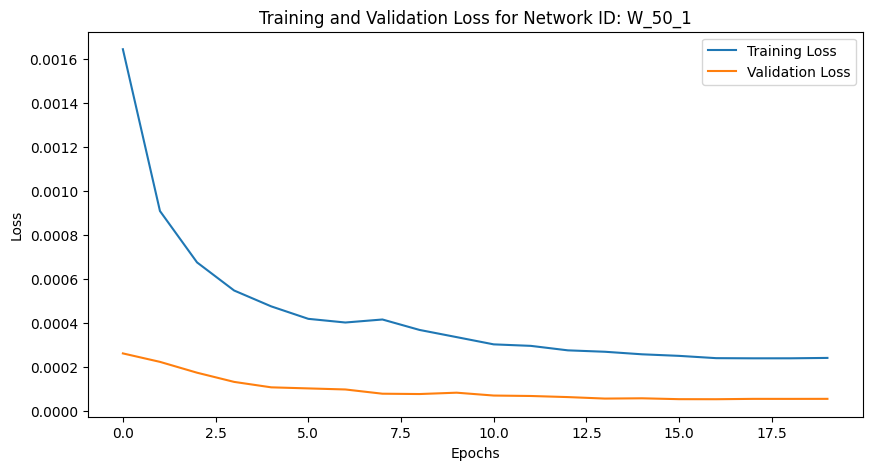

Training Progress:   0%|          | 19/10000 [00:34<4:58:58,  1.80s/epoch, loss=0.000241, val_loss=5.54e-5, patience=1]


Mean Squared Error: 0.00044055517548402843
Iteration: 41, Window Size: 50, Y Days Ahead: 2
X shape: (3756, 50)
y shape: (3756, 2)
Initializing network with layer sizes: [50, 128, 64, 32, 2]
Parameters loaded from params_W_50_2.npz
Training data shape: (3004, 50), (3004, 2), Validation data shape: (376, 50), (376, 2), Testing data shape: (376, 50), (376, 2)
Parameters loaded from params_W_50_2.npz


Training Progress:   0%|          | 21/10000 [00:43<5:01:51,  1.81s/epoch, loss=0.000314, val_loss=7.11e-5, patience=1] 

Epoch 22/10000, Training Loss: 0.000314, Validation Loss: 0.000071
Early stopping at epoch 22. Best validation loss: 0.000065


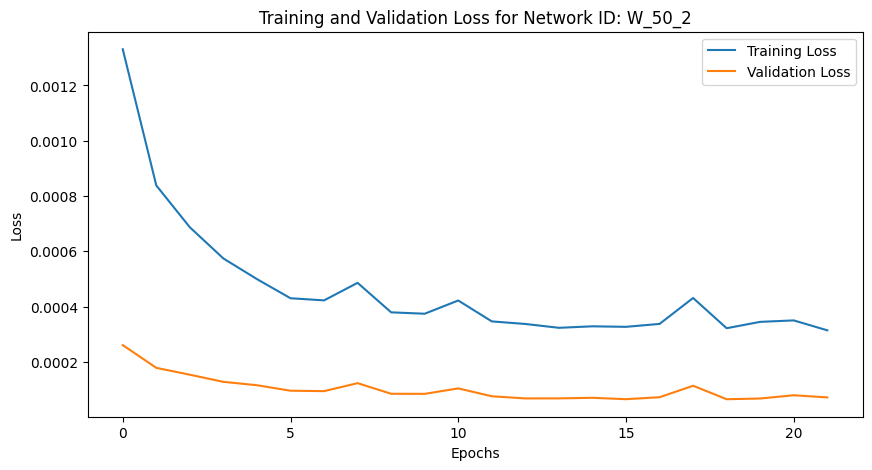

Training Progress:   0%|          | 21/10000 [00:44<5:49:25,  2.10s/epoch, loss=0.000314, val_loss=7.11e-5, patience=1]


Mean Squared Error: 0.0004702543133237337
Iteration: 42, Window Size: 50, Y Days Ahead: 3
X shape: (3755, 50)
y shape: (3755, 3)
Initializing network with layer sizes: [50, 128, 64, 32, 3]
Parameters loaded from params_W_50_3.npz
Training data shape: (3004, 50), (3004, 3), Validation data shape: (375, 50), (375, 3), Testing data shape: (376, 50), (376, 3)
Parameters loaded from params_W_50_3.npz


Training Progress:   0%|          | 14/10000 [00:28<5:04:18,  1.83s/epoch, loss=0.000509, val_loss=9.96e-5, patience=1] 

Epoch 15/10000, Training Loss: 0.000509, Validation Loss: 0.000100
Early stopping at epoch 15. Best validation loss: 0.000084


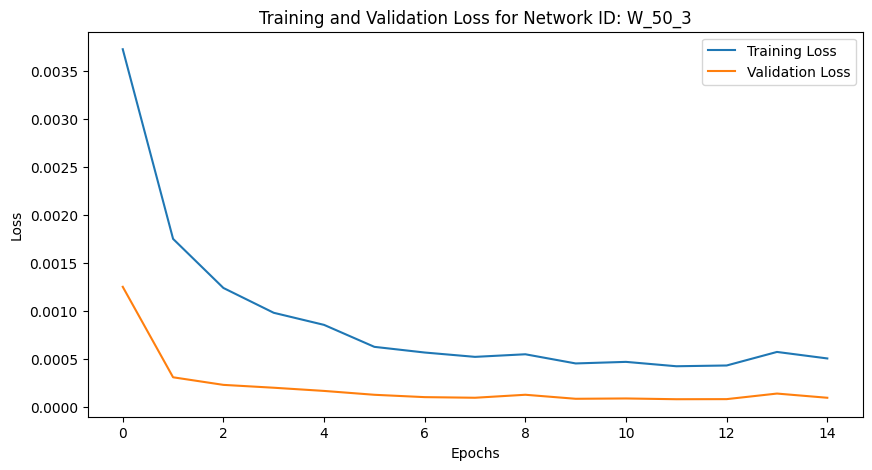

Training Progress:   0%|          | 14/10000 [00:28<5:43:16,  2.06s/epoch, loss=0.000509, val_loss=9.96e-5, patience=1]


Mean Squared Error: 0.000592790375787493
Iteration: 43, Window Size: 50, Y Days Ahead: 4
X shape: (3754, 50)
y shape: (3754, 4)
Initializing network with layer sizes: [50, 128, 64, 32, 4]
Parameters loaded from params_W_50_4.npz
Training data shape: (3003, 50), (3003, 4), Validation data shape: (375, 50), (375, 4), Testing data shape: (376, 50), (376, 4)
Parameters loaded from params_W_50_4.npz


Training Progress:   0%|          | 27/10000 [00:47<4:29:47,  1.62s/epoch, loss=0.000468, val_loss=0.000101, patience=1]

Epoch 28/10000, Training Loss: 0.000468, Validation Loss: 0.000101
Early stopping at epoch 28. Best validation loss: 0.000094


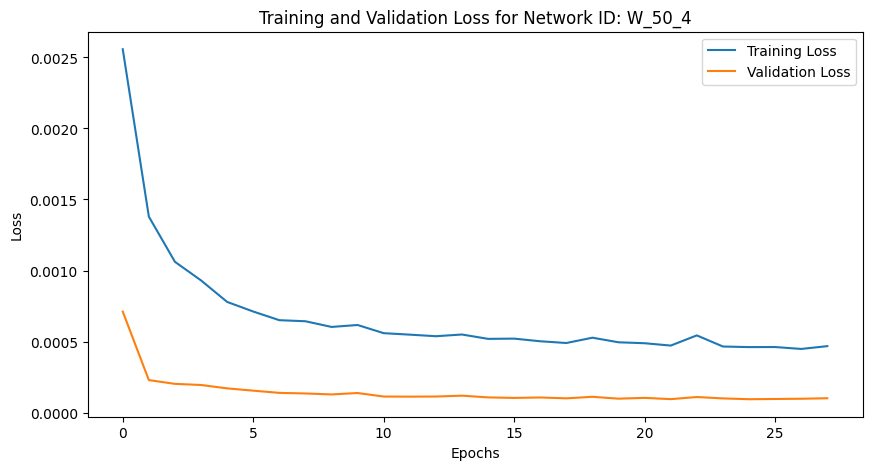

Training Progress:   0%|          | 27/10000 [00:47<4:53:05,  1.76s/epoch, loss=0.000468, val_loss=0.000101, patience=1]


Mean Squared Error: 0.0006960060698573321
Iteration: 44, Window Size: 50, Y Days Ahead: 5
X shape: (3753, 50)
y shape: (3753, 5)
Initializing network with layer sizes: [50, 128, 64, 32, 5]
Parameters loaded from params_W_50_5.npz
Training data shape: (3002, 50), (3002, 5), Validation data shape: (375, 50), (375, 5), Testing data shape: (376, 50), (376, 5)
Parameters loaded from params_W_50_5.npz


Training Progress:   0%|          | 24/10000 [00:42<4:55:33,  1.78s/epoch, loss=0.000499, val_loss=0.00011, patience=1] 

Epoch 25/10000, Training Loss: 0.000499, Validation Loss: 0.000110
Early stopping at epoch 25. Best validation loss: 0.000108


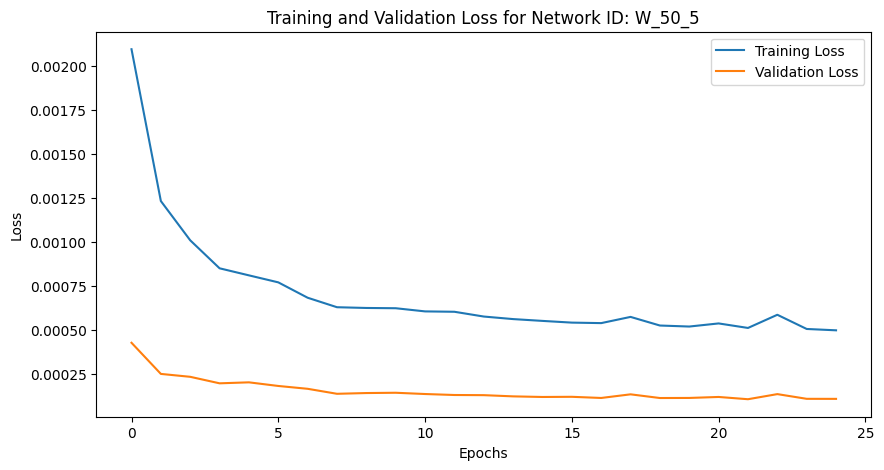

Training Progress:   0%|          | 24/10000 [00:42<4:56:54,  1.79s/epoch, loss=0.000499, val_loss=0.00011, patience=1]


Mean Squared Error: 0.0007927134736605074
Iteration: 45, Window Size: 50, Y Days Ahead: 6
X shape: (3752, 50)
y shape: (3752, 6)
Initializing network with layer sizes: [50, 128, 64, 32, 6]
params_W_50_6.npz not found. Using randomly initialized parameters.
Training data shape: (3001, 50), (3001, 6), Validation data shape: (375, 50), (375, 6), Testing data shape: (376, 50), (376, 6)
Parameters loaded from params_W_50_6.npz


Training Progress:   0%|          | 25/10000 [00:46<5:08:58,  1.86s/epoch, loss=0.000583, val_loss=0.000129, patience=1]

Epoch 26/10000, Training Loss: 0.000583, Validation Loss: 0.000129
Early stopping at epoch 26. Best validation loss: 0.000129


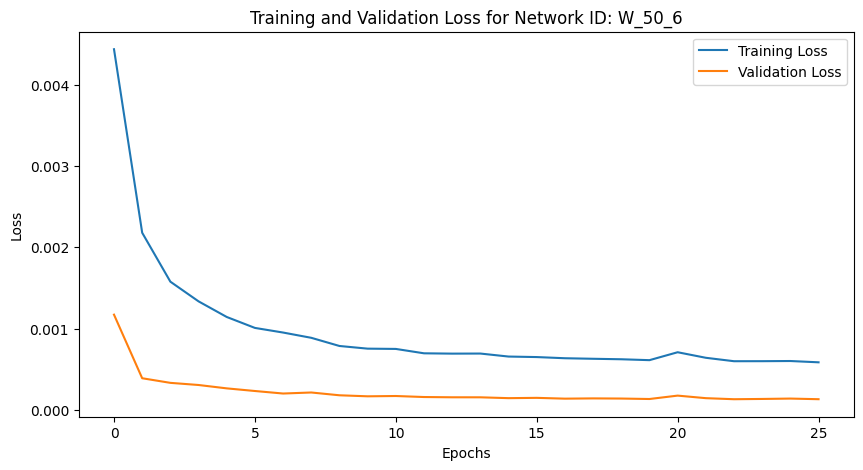

Training Progress:   0%|          | 25/10000 [00:46<5:11:32,  1.87s/epoch, loss=0.000583, val_loss=0.000129, patience=1]


Mean Squared Error: 0.0008897853443010076
Iteration: 46, Window Size: 50, Y Days Ahead: 7
X shape: (3751, 50)
y shape: (3751, 7)
Initializing network with layer sizes: [50, 128, 64, 32, 7]
params_W_50_7.npz not found. Using randomly initialized parameters.
Training data shape: (3000, 50), (3000, 7), Validation data shape: (375, 50), (375, 7), Testing data shape: (376, 50), (376, 7)
Parameters loaded from params_W_50_7.npz


Training Progress:   0%|          | 18/10000 [00:32<4:35:38,  1.66s/epoch, loss=0.000724, val_loss=0.000159, patience=1]

Epoch 19/10000, Training Loss: 0.000724, Validation Loss: 0.000159
Early stopping at epoch 19. Best validation loss: 0.000146


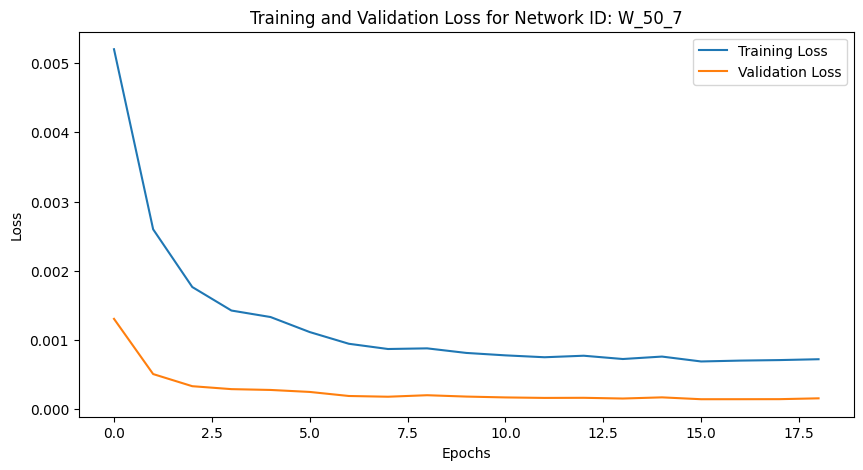

Training Progress:   0%|          | 18/10000 [00:32<5:02:01,  1.82s/epoch, loss=0.000724, val_loss=0.000159, patience=1]


Mean Squared Error: 0.0010307504351103785
Iteration: 47, Window Size: 50, Y Days Ahead: 8
X shape: (3750, 50)
y shape: (3750, 8)
Initializing network with layer sizes: [50, 128, 64, 32, 8]
params_W_50_8.npz not found. Using randomly initialized parameters.
Training data shape: (3000, 50), (3000, 8), Validation data shape: (375, 50), (375, 8), Testing data shape: (375, 50), (375, 8)
Parameters loaded from params_W_50_8.npz


Training Progress:   0%|          | 14/10000 [00:30<5:10:30,  1.87s/epoch, loss=0.000872, val_loss=0.000187, patience=1]

Epoch 15/10000, Training Loss: 0.000872, Validation Loss: 0.000187
Early stopping at epoch 15. Best validation loss: 0.000171


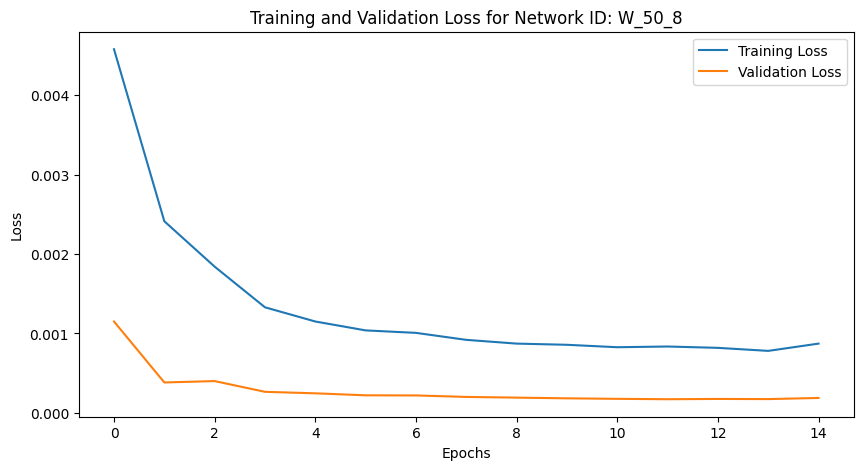

Training Progress:   0%|          | 14/10000 [00:31<6:09:28,  2.22s/epoch, loss=0.000872, val_loss=0.000187, patience=1]


Mean Squared Error: 0.0012390590613808724
Iteration: 48, Window Size: 50, Y Days Ahead: 9
X shape: (3749, 50)
y shape: (3749, 9)
Initializing network with layer sizes: [50, 128, 64, 32, 9]
params_W_50_9.npz not found. Using randomly initialized parameters.
Training data shape: (2999, 50), (2999, 9), Validation data shape: (375, 50), (375, 9), Testing data shape: (375, 50), (375, 9)
Parameters loaded from params_W_50_9.npz


Training Progress:   0%|          | 18/10000 [00:42<7:08:58,  2.58s/epoch, loss=0.000875, val_loss=0.000223, patience=1]

Epoch 19/10000, Training Loss: 0.000875, Validation Loss: 0.000223
Early stopping at epoch 19. Best validation loss: 0.000192


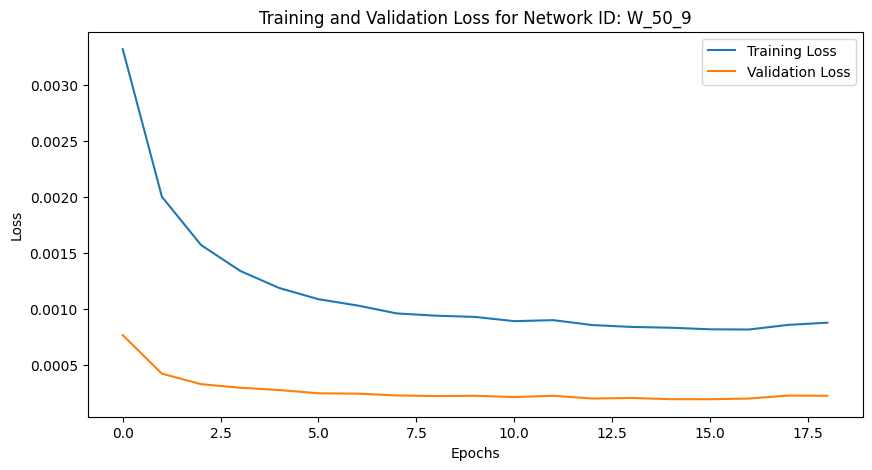

Training Progress:   0%|          | 18/10000 [00:42<6:37:20,  2.39s/epoch, loss=0.000875, val_loss=0.000223, patience=1]


Mean Squared Error: 0.001172119468780076
Iteration: 49, Window Size: 50, Y Days Ahead: 10
X shape: (3748, 50)
y shape: (3748, 10)
Initializing network with layer sizes: [50, 128, 64, 32, 10]
params_W_50_10.npz not found. Using randomly initialized parameters.
Training data shape: (2998, 50), (2998, 10), Validation data shape: (375, 50), (375, 10), Testing data shape: (375, 50), (375, 10)
Parameters loaded from params_W_50_10.npz


Training Progress:   0%|          | 31/10000 [00:53<4:35:08,  1.66s/epoch, loss=0.00081, val_loss=0.000191, patience=1] 

Epoch 32/10000, Training Loss: 0.000810, Validation Loss: 0.000191
Early stopping at epoch 32. Best validation loss: 0.000191


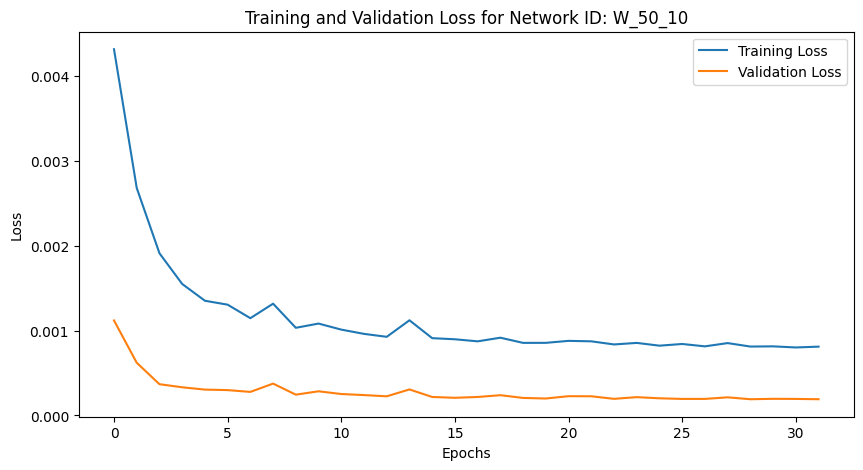

Training Progress:   0%|          | 31/10000 [00:53<4:48:25,  1.74s/epoch, loss=0.00081, val_loss=0.000191, patience=1]

Mean Squared Error: 0.001186850167666815
Iteration: 50, Window Size: 60, Y Days Ahead: 1
X shape: (3747, 60)
y shape: (3747, 1)


Initializing network with layer sizes: [60, 128, 64, 32, 1]
Parameters loaded from params_W_60_1.npz
Training data shape: (2997, 60), (2997, 1), Validation data shape: (375, 60), (375, 1), Testing data shape: (375, 60), (375, 1)
Parameters loaded from params_W_60_1.npz


Training Progress:   0%|          | 9/10000 [00:17<4:41:38,  1.69s/epoch, loss=0.000389, val_loss=8.78e-5, patience=1] 

Epoch 10/10000, Training Loss: 0.000389, Validation Loss: 0.000088
Early stopping at epoch 10. Best validation loss: 0.000067


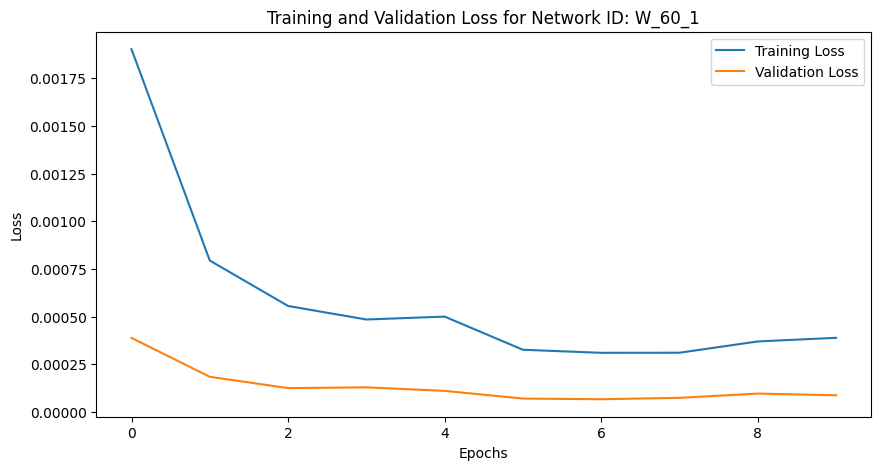

Training Progress:   0%|          | 9/10000 [00:17<5:18:53,  1.92s/epoch, loss=0.000389, val_loss=8.78e-5, patience=1]


Mean Squared Error: 0.0004617256626230236
Iteration: 51, Window Size: 60, Y Days Ahead: 2
X shape: (3746, 60)
y shape: (3746, 2)
Initializing network with layer sizes: [60, 128, 64, 32, 2]
Parameters loaded from params_W_60_2.npz
Training data shape: (2996, 60), (2996, 2), Validation data shape: (375, 60), (375, 2), Testing data shape: (375, 60), (375, 2)
Parameters loaded from params_W_60_2.npz


Training Progress:   0%|          | 21/10000 [00:38<4:45:33,  1.72s/epoch, loss=0.000411, val_loss=9.45e-5, patience=1]

Epoch 22/10000, Training Loss: 0.000411, Validation Loss: 0.000095
Early stopping at epoch 22. Best validation loss: 0.000055


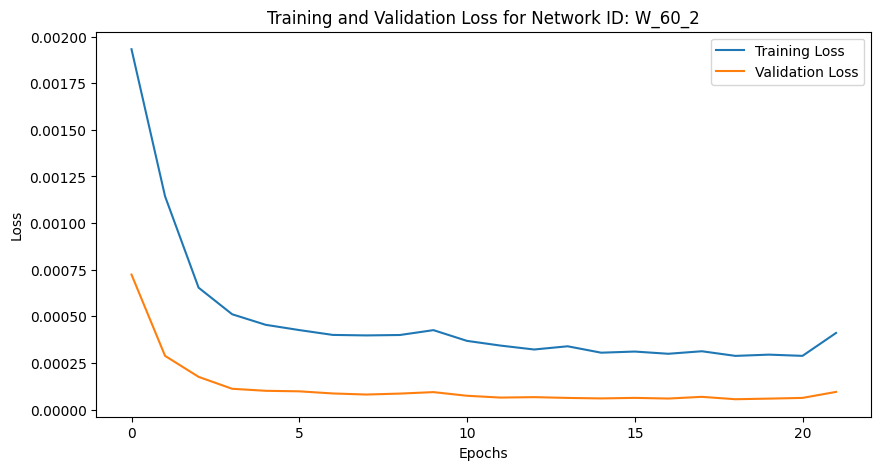

Training Progress:   0%|          | 21/10000 [00:39<5:10:04,  1.86s/epoch, loss=0.000411, val_loss=9.45e-5, patience=1]


Mean Squared Error: 0.00048494902042456496
Iteration: 52, Window Size: 60, Y Days Ahead: 3
X shape: (3745, 60)
y shape: (3745, 3)
Initializing network with layer sizes: [60, 128, 64, 32, 3]
Parameters loaded from params_W_60_3.npz
Training data shape: (2996, 60), (2996, 3), Validation data shape: (374, 60), (374, 3), Testing data shape: (375, 60), (375, 3)
Parameters loaded from params_W_60_3.npz


Training Progress:   0%|          | 30/10000 [00:54<4:45:53,  1.72s/epoch, loss=0.000458, val_loss=0.000101, patience=1]

Epoch 31/10000, Training Loss: 0.000458, Validation Loss: 0.000101
Early stopping at epoch 31. Best validation loss: 0.000078


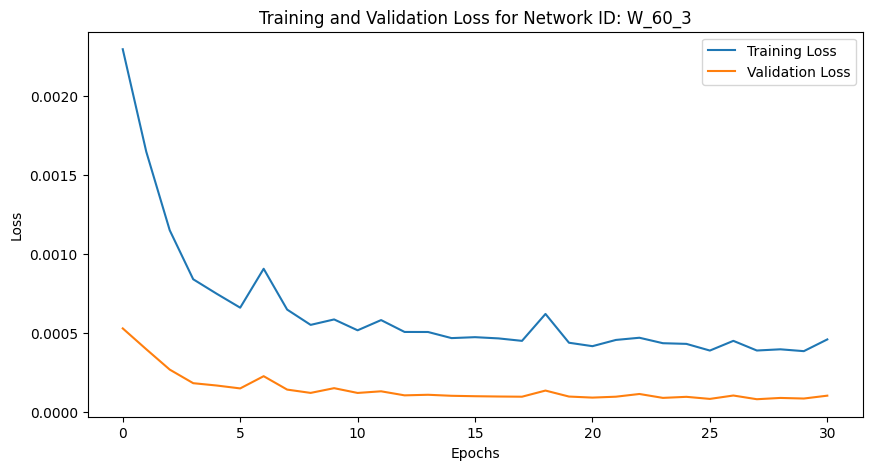

Training Progress:   0%|          | 30/10000 [00:54<5:00:20,  1.81s/epoch, loss=0.000458, val_loss=0.000101, patience=1]


Mean Squared Error: 0.0006045965909277905
Iteration: 53, Window Size: 60, Y Days Ahead: 4
X shape: (3744, 60)
y shape: (3744, 4)
Initializing network with layer sizes: [60, 128, 64, 32, 4]
Parameters loaded from params_W_60_4.npz
Training data shape: (2995, 60), (2995, 4), Validation data shape: (374, 60), (374, 4), Testing data shape: (375, 60), (375, 4)
Parameters loaded from params_W_60_4.npz


Training Progress:   0%|          | 13/10000 [00:24<5:08:42,  1.85s/epoch, loss=0.000525, val_loss=0.00012, patience=1] 

Epoch 14/10000, Training Loss: 0.000525, Validation Loss: 0.000120
Early stopping at epoch 14. Best validation loss: 0.000118


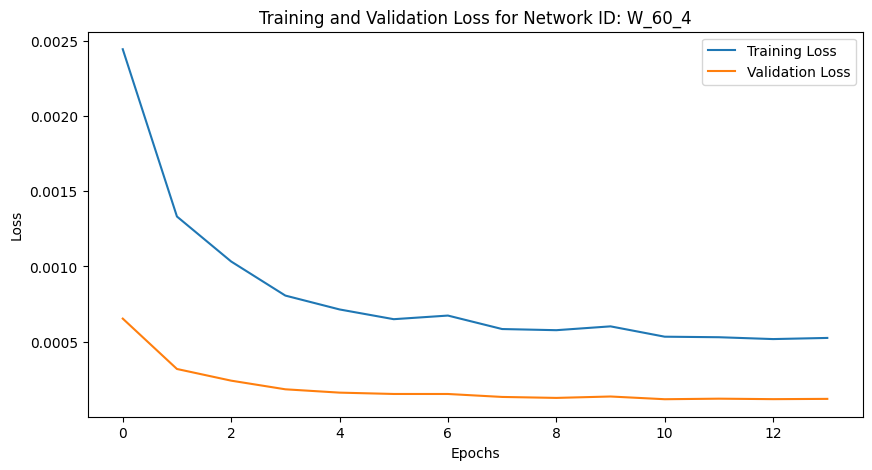

Training Progress:   0%|          | 13/10000 [00:24<5:18:16,  1.91s/epoch, loss=0.000525, val_loss=0.00012, patience=1]


Mean Squared Error: 0.0007626940126091815
Iteration: 54, Window Size: 60, Y Days Ahead: 5
X shape: (3743, 60)
y shape: (3743, 5)
Initializing network with layer sizes: [60, 128, 64, 32, 5]
Parameters loaded from params_W_60_5.npz
Training data shape: (2994, 60), (2994, 5), Validation data shape: (374, 60), (374, 5), Testing data shape: (375, 60), (375, 5)
Parameters loaded from params_W_60_5.npz


Training Progress:   0%|          | 9/10000 [00:18<5:00:51,  1.81s/epoch, loss=0.000755, val_loss=0.000192, patience=1]

Epoch 10/10000, Training Loss: 0.000755, Validation Loss: 0.000192
Early stopping at epoch 10. Best validation loss: 0.000145


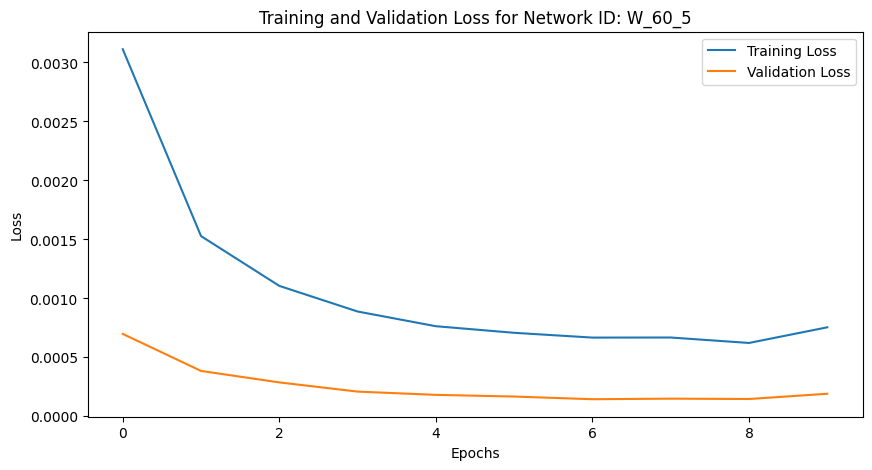

Training Progress:   0%|          | 9/10000 [00:18<5:46:48,  2.08s/epoch, loss=0.000755, val_loss=0.000192, patience=1]


Mean Squared Error: 0.0010073617615122183
Iteration: 55, Window Size: 60, Y Days Ahead: 6
X shape: (3742, 60)
y shape: (3742, 6)
Initializing network with layer sizes: [60, 128, 64, 32, 6]
params_W_60_6.npz not found. Using randomly initialized parameters.
Training data shape: (2993, 60), (2993, 6), Validation data shape: (374, 60), (374, 6), Testing data shape: (375, 60), (375, 6)
Parameters loaded from params_W_60_6.npz


Training Progress:   0%|          | 12/10000 [00:23<4:51:18,  1.75s/epoch, loss=0.000676, val_loss=0.00017, patience=1] 

Epoch 13/10000, Training Loss: 0.000676, Validation Loss: 0.000170
Early stopping at epoch 13. Best validation loss: 0.000159


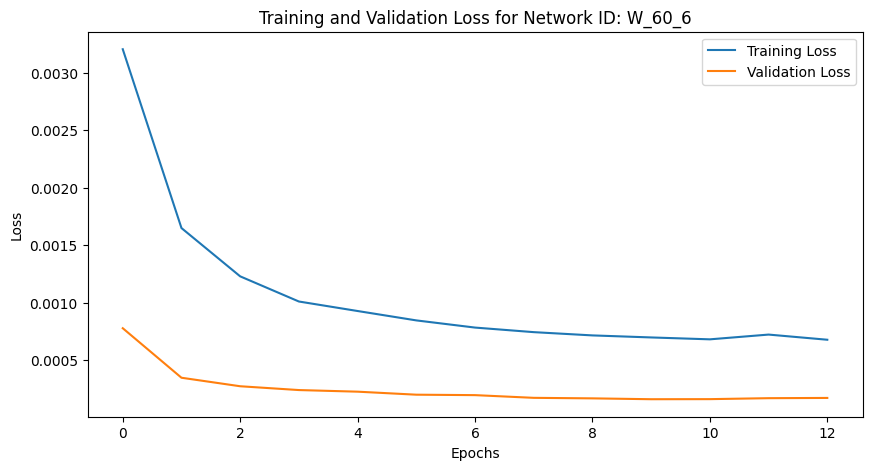

Training Progress:   0%|          | 12/10000 [00:24<5:34:18,  2.01s/epoch, loss=0.000676, val_loss=0.00017, patience=1]


Mean Squared Error: 0.001088928453254993
Iteration: 56, Window Size: 60, Y Days Ahead: 7
X shape: (3741, 60)
y shape: (3741, 7)
Initializing network with layer sizes: [60, 128, 64, 32, 7]
params_W_60_7.npz not found. Using randomly initialized parameters.
Training data shape: (2992, 60), (2992, 7), Validation data shape: (374, 60), (374, 7), Testing data shape: (375, 60), (375, 7)
Parameters loaded from params_W_60_7.npz


Training Progress:   0%|          | 25/10000 [00:45<4:54:50,  1.77s/epoch, loss=0.000693, val_loss=0.000179, patience=1]

Epoch 26/10000, Training Loss: 0.000693, Validation Loss: 0.000179
Early stopping at epoch 26. Best validation loss: 0.000148


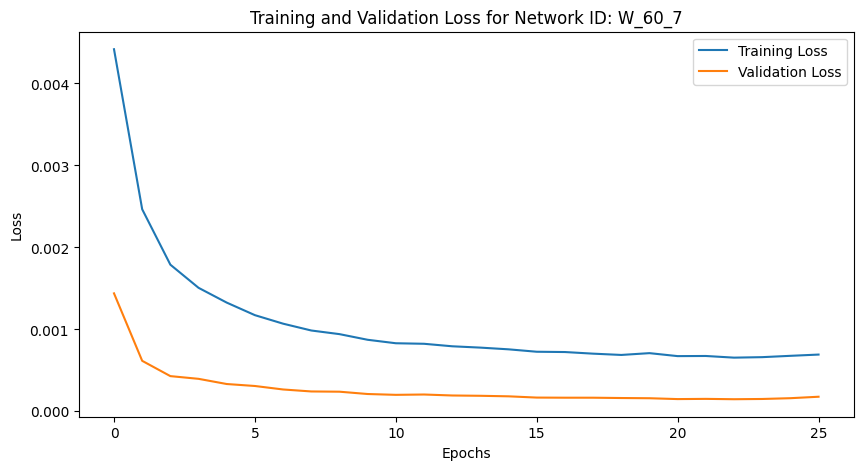

Training Progress:   0%|          | 25/10000 [00:45<5:04:45,  1.83s/epoch, loss=0.000693, val_loss=0.000179, patience=1]


Mean Squared Error: 0.0010010174423632733
Iteration: 57, Window Size: 60, Y Days Ahead: 8
X shape: (3740, 60)
y shape: (3740, 8)
Initializing network with layer sizes: [60, 128, 64, 32, 8]
params_W_60_8.npz not found. Using randomly initialized parameters.
Training data shape: (2992, 60), (2992, 8), Validation data shape: (374, 60), (374, 8), Testing data shape: (374, 60), (374, 8)
Parameters loaded from params_W_60_8.npz


Training Progress:   0%|          | 16/10000 [00:29<4:43:22,  1.70s/epoch, loss=0.000861, val_loss=0.000217, patience=1]

Epoch 17/10000, Training Loss: 0.000861, Validation Loss: 0.000217
Early stopping at epoch 17. Best validation loss: 0.000176


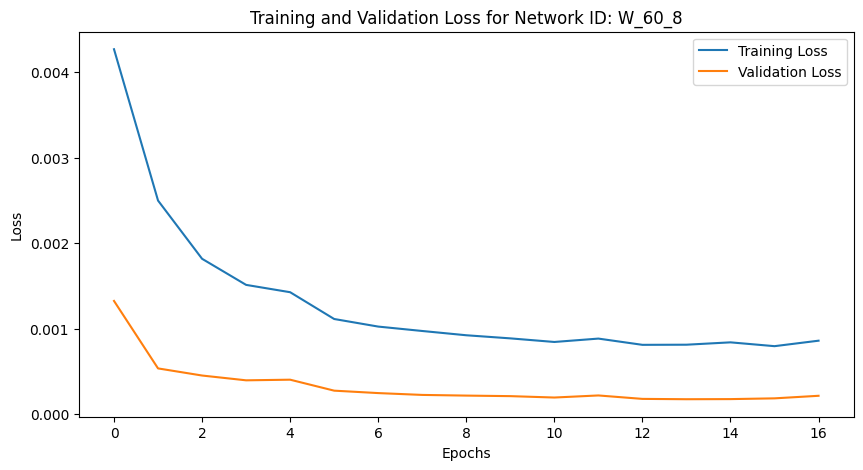

Training Progress:   0%|          | 16/10000 [00:30<5:13:33,  1.88s/epoch, loss=0.000861, val_loss=0.000217, patience=1]


Mean Squared Error: 0.0012582264603634135
Iteration: 58, Window Size: 60, Y Days Ahead: 9
X shape: (3739, 60)
y shape: (3739, 9)
Initializing network with layer sizes: [60, 128, 64, 32, 9]
params_W_60_9.npz not found. Using randomly initialized parameters.
Training data shape: (2991, 60), (2991, 9), Validation data shape: (374, 60), (374, 9), Testing data shape: (374, 60), (374, 9)
Parameters loaded from params_W_60_9.npz


Training Progress:   0%|          | 22/10000 [00:40<4:41:43,  1.69s/epoch, loss=0.000792, val_loss=0.000174, patience=1]

Epoch 23/10000, Training Loss: 0.000792, Validation Loss: 0.000174
Early stopping at epoch 23. Best validation loss: 0.000174


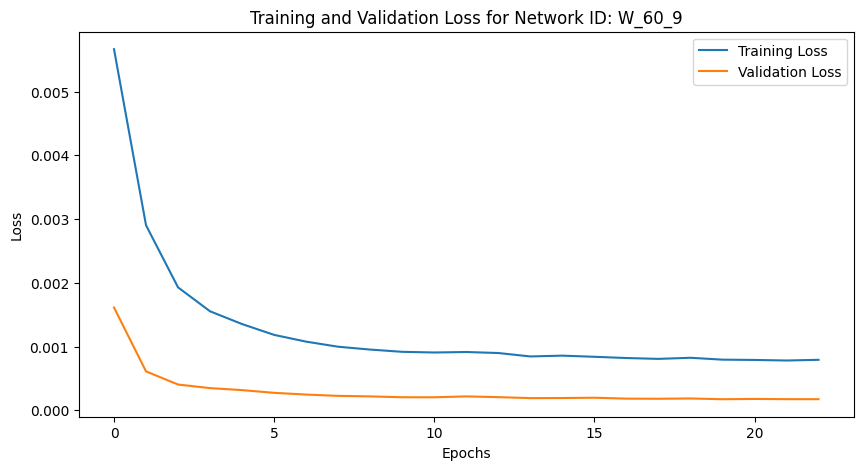

Training Progress:   0%|          | 22/10000 [00:40<5:05:21,  1.84s/epoch, loss=0.000792, val_loss=0.000174, patience=1]


Mean Squared Error: 0.0012320841033136745
Iteration: 59, Window Size: 60, Y Days Ahead: 10
X shape: (3738, 60)
y shape: (3738, 10)
Initializing network with layer sizes: [60, 128, 64, 32, 10]
params_W_60_10.npz not found. Using randomly initialized parameters.
Training data shape: (2990, 60), (2990, 10), Validation data shape: (374, 60), (374, 10), Testing data shape: (374, 60), (374, 10)
Parameters loaded from params_W_60_10.npz


Training Progress:   0%|          | 22/10000 [00:38<4:39:15,  1.68s/epoch, loss=0.000874, val_loss=0.000203, patience=1]

Epoch 23/10000, Training Loss: 0.000874, Validation Loss: 0.000203
Early stopping at epoch 23. Best validation loss: 0.000201


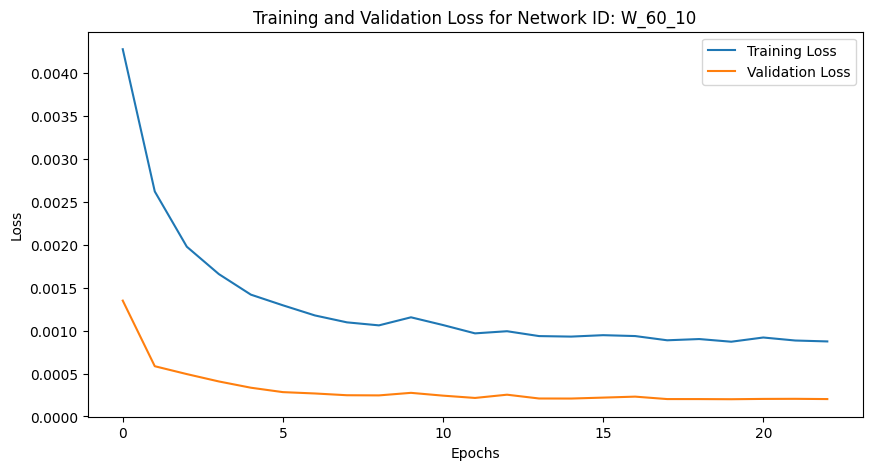

Training Progress:   0%|          | 22/10000 [00:38<4:53:29,  1.76s/epoch, loss=0.000874, val_loss=0.000203, patience=1]


Mean Squared Error: 0.001303961706528309
Iteration: 60, Window Size: 70, Y Days Ahead: 1
X shape: (3737, 70)
y shape: (3737, 1)
Initializing network with layer sizes: [70, 128, 64, 32, 1]
Parameters loaded from params_W_70_1.npz
Training data shape: (2989, 70), (2989, 1), Validation data shape: (374, 70), (374, 1), Testing data shape: (374, 70), (374, 1)
Parameters loaded from params_W_70_1.npz


Training Progress:   0%|          | 7/10000 [00:13<4:46:46,  1.72s/epoch, loss=0.000756, val_loss=0.000265, patience=1]

Epoch 8/10000, Training Loss: 0.000756, Validation Loss: 0.000265
Early stopping at epoch 8. Best validation loss: 0.000107


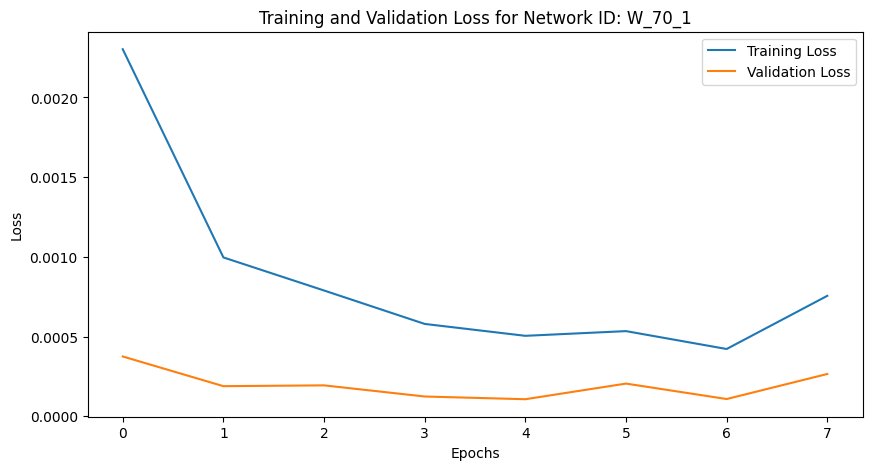

Training Progress:   0%|          | 7/10000 [00:14<5:34:03,  2.01s/epoch, loss=0.000756, val_loss=0.000265, patience=1]


Mean Squared Error: 0.0006906602469055154
Iteration: 61, Window Size: 70, Y Days Ahead: 2
X shape: (3736, 70)
y shape: (3736, 2)
Initializing network with layer sizes: [70, 128, 64, 32, 2]
Parameters loaded from params_W_70_2.npz
Training data shape: (2988, 70), (2988, 2), Validation data shape: (374, 70), (374, 2), Testing data shape: (374, 70), (374, 2)
Parameters loaded from params_W_70_2.npz


Training Progress:   0%|          | 17/10000 [00:31<4:45:00,  1.71s/epoch, loss=0.000517, val_loss=0.000112, patience=1]

Epoch 18/10000, Training Loss: 0.000517, Validation Loss: 0.000112
Early stopping at epoch 18. Best validation loss: 0.000088


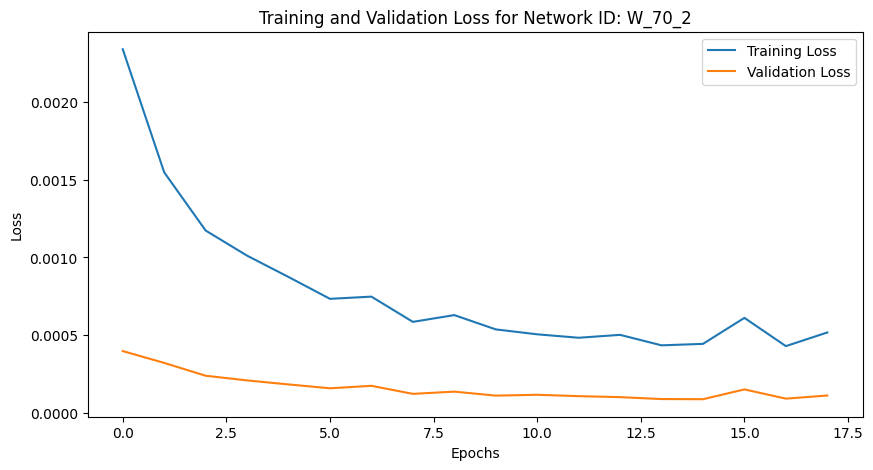

Training Progress:   0%|          | 17/10000 [00:31<5:08:42,  1.86s/epoch, loss=0.000517, val_loss=0.000112, patience=1]


Mean Squared Error: 0.0006276689985677687
Iteration: 62, Window Size: 70, Y Days Ahead: 3
X shape: (3735, 70)
y shape: (3735, 3)
Initializing network with layer sizes: [70, 128, 64, 32, 3]
Parameters loaded from params_W_70_3.npz
Training data shape: (2988, 70), (2988, 3), Validation data shape: (373, 70), (373, 3), Testing data shape: (374, 70), (374, 3)
Parameters loaded from params_W_70_3.npz


Training Progress:   0%|          | 19/10000 [00:34<4:47:57,  1.73s/epoch, loss=0.000427, val_loss=9.97e-5, patience=1] 

Epoch 20/10000, Training Loss: 0.000427, Validation Loss: 0.000100
Early stopping at epoch 20. Best validation loss: 0.000090


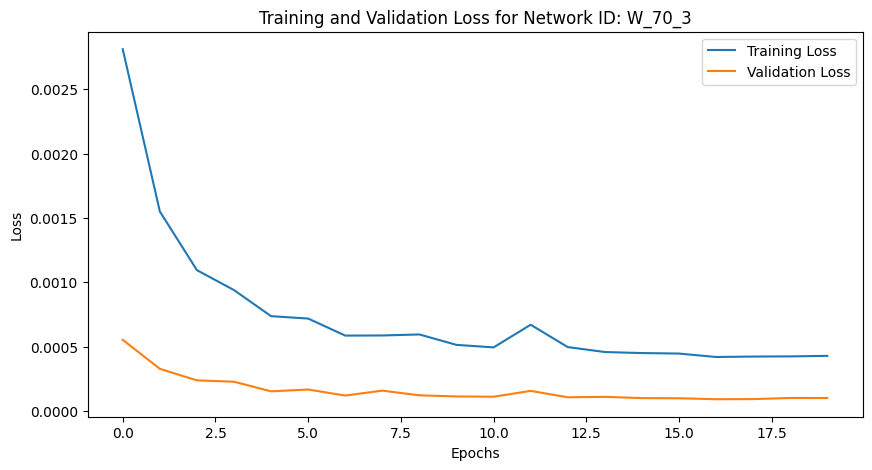

Training Progress:   0%|          | 19/10000 [00:34<5:00:14,  1.80s/epoch, loss=0.000427, val_loss=9.97e-5, patience=1]


Mean Squared Error: 0.0006646984898506287
Iteration: 63, Window Size: 70, Y Days Ahead: 4
X shape: (3734, 70)
y shape: (3734, 4)
Initializing network with layer sizes: [70, 128, 64, 32, 4]
Parameters loaded from params_W_70_4.npz
Training data shape: (2987, 70), (2987, 4), Validation data shape: (373, 70), (373, 4), Testing data shape: (374, 70), (374, 4)
Parameters loaded from params_W_70_4.npz


Training Progress:   0%|          | 33/10000 [01:00<4:43:54,  1.71s/epoch, loss=0.000477, val_loss=0.000119, patience=1]

Epoch 34/10000, Training Loss: 0.000477, Validation Loss: 0.000119
Early stopping at epoch 34. Best validation loss: 0.000098


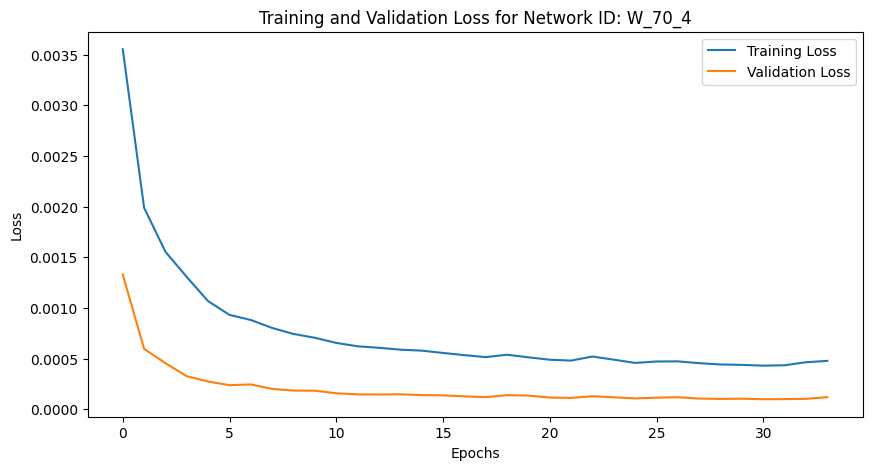

Training Progress:   0%|          | 33/10000 [01:00<5:05:02,  1.84s/epoch, loss=0.000477, val_loss=0.000119, patience=1]


Mean Squared Error: 0.0007126930548596262
Iteration: 64, Window Size: 70, Y Days Ahead: 5
X shape: (3733, 70)
y shape: (3733, 5)
Initializing network with layer sizes: [70, 128, 64, 32, 5]
Parameters loaded from params_W_70_5.npz
Training data shape: (2986, 70), (2986, 5), Validation data shape: (373, 70), (373, 5), Testing data shape: (374, 70), (374, 5)
Parameters loaded from params_W_70_5.npz


Training Progress:   0%|          | 12/10000 [00:22<4:43:28,  1.70s/epoch, loss=0.000669, val_loss=0.000149, patience=1]

Epoch 13/10000, Training Loss: 0.000669, Validation Loss: 0.000149
Early stopping at epoch 13. Best validation loss: 0.000147


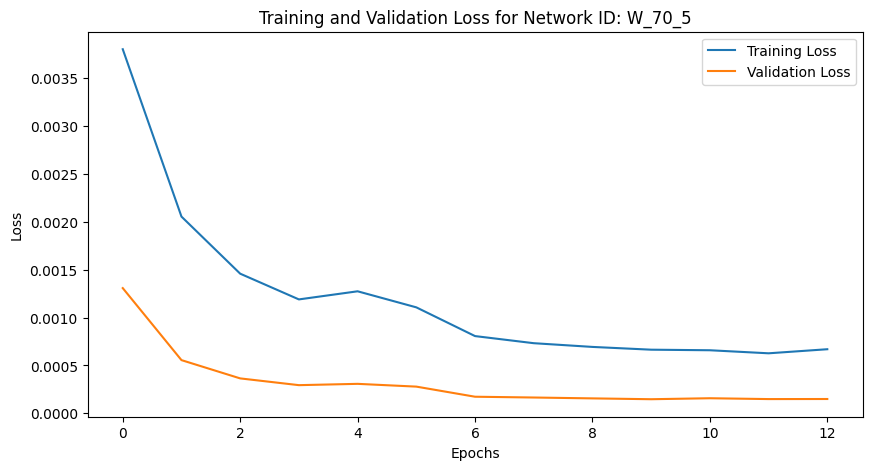

Training Progress:   0%|          | 12/10000 [00:22<5:13:47,  1.88s/epoch, loss=0.000669, val_loss=0.000149, patience=1]


Mean Squared Error: 0.0009896875392731682
Iteration: 65, Window Size: 70, Y Days Ahead: 6
X shape: (3732, 70)
y shape: (3732, 6)
Initializing network with layer sizes: [70, 128, 64, 32, 6]
params_W_70_6.npz not found. Using randomly initialized parameters.
Training data shape: (2985, 70), (2985, 6), Validation data shape: (373, 70), (373, 6), Testing data shape: (374, 70), (374, 6)
Parameters loaded from params_W_70_6.npz


Training Progress:   0%|          | 20/10000 [00:37<4:53:38,  1.77s/epoch, loss=0.000835, val_loss=0.000222, patience=1]

Epoch 21/10000, Training Loss: 0.000835, Validation Loss: 0.000222
Early stopping at epoch 21. Best validation loss: 0.000147


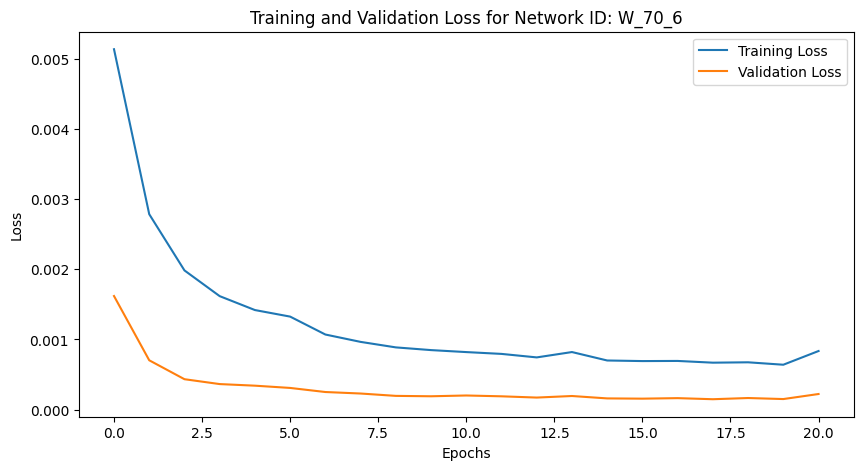

Training Progress:   0%|          | 20/10000 [00:37<5:12:50,  1.88s/epoch, loss=0.000835, val_loss=0.000222, patience=1]


Mean Squared Error: 0.0010082296879493685
Iteration: 66, Window Size: 70, Y Days Ahead: 7
X shape: (3731, 70)
y shape: (3731, 7)
Initializing network with layer sizes: [70, 128, 64, 32, 7]
params_W_70_7.npz not found. Using randomly initialized parameters.
Training data shape: (2984, 70), (2984, 7), Validation data shape: (373, 70), (373, 7), Testing data shape: (374, 70), (374, 7)
Parameters loaded from params_W_70_7.npz


Training Progress:   0%|          | 16/10000 [00:36<8:01:43,  2.90s/epoch, loss=0.000836, val_loss=0.000202, patience=1]

Epoch 17/10000, Training Loss: 0.000836, Validation Loss: 0.000202
Early stopping at epoch 17. Best validation loss: 0.000182


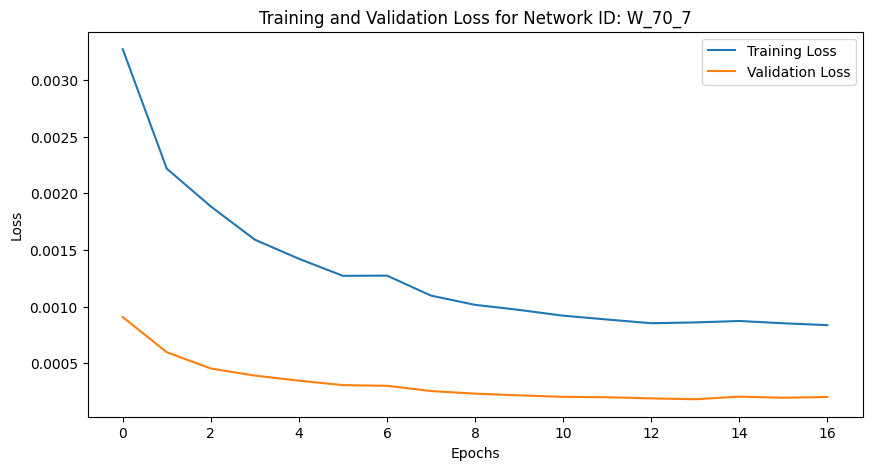

Training Progress:   0%|          | 16/10000 [00:36<6:21:43,  2.29s/epoch, loss=0.000836, val_loss=0.000202, patience=1]


Mean Squared Error: 0.0013609189319253256
Iteration: 67, Window Size: 70, Y Days Ahead: 8
X shape: (3730, 70)
y shape: (3730, 8)
Initializing network with layer sizes: [70, 128, 64, 32, 8]
params_W_70_8.npz not found. Using randomly initialized parameters.
Training data shape: (2984, 70), (2984, 8), Validation data shape: (373, 70), (373, 8), Testing data shape: (373, 70), (373, 8)
Parameters loaded from params_W_70_8.npz


Training Progress:   0%|          | 26/10000 [00:55<4:56:24,  1.78s/epoch, loss=0.000735, val_loss=0.000186, patience=1]

Epoch 27/10000, Training Loss: 0.000735, Validation Loss: 0.000186
Early stopping at epoch 27. Best validation loss: 0.000183


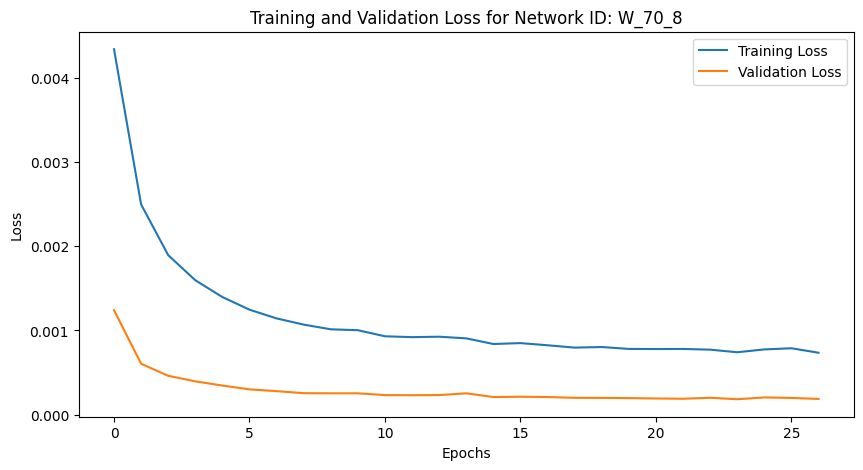

Training Progress:   0%|          | 26/10000 [00:56<5:58:42,  2.16s/epoch, loss=0.000735, val_loss=0.000186, patience=1]


Mean Squared Error: 0.00116313419561763
Iteration: 68, Window Size: 70, Y Days Ahead: 9
X shape: (3729, 70)
y shape: (3729, 9)
Initializing network with layer sizes: [70, 128, 64, 32, 9]
params_W_70_9.npz not found. Using randomly initialized parameters.
Training data shape: (2983, 70), (2983, 9), Validation data shape: (373, 70), (373, 9), Testing data shape: (373, 70), (373, 9)
Parameters loaded from params_W_70_9.npz


Training Progress:   0%|          | 25/10000 [00:47<5:03:01,  1.82s/epoch, loss=0.000806, val_loss=0.000183, patience=1]

Epoch 26/10000, Training Loss: 0.000806, Validation Loss: 0.000183
Early stopping at epoch 26. Best validation loss: 0.000182


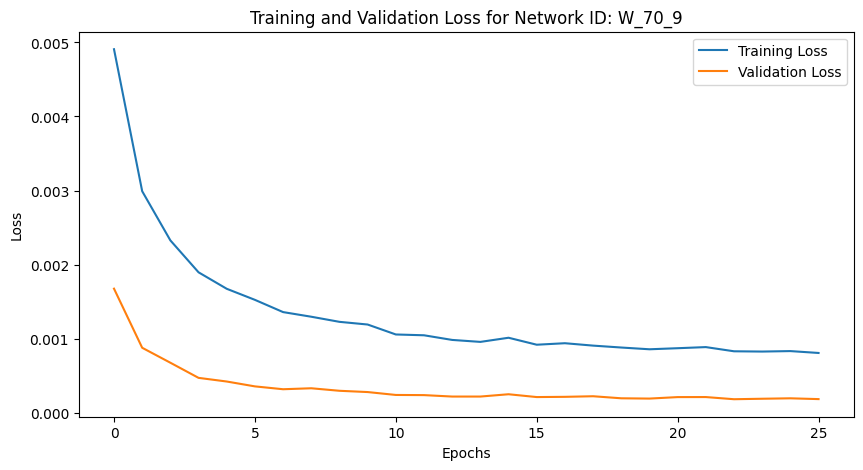

Training Progress:   0%|          | 25/10000 [00:47<5:16:50,  1.91s/epoch, loss=0.000806, val_loss=0.000183, patience=1]


Mean Squared Error: 0.0012896370226945994
Iteration: 69, Window Size: 70, Y Days Ahead: 10
X shape: (3728, 70)
y shape: (3728, 10)
Initializing network with layer sizes: [70, 128, 64, 32, 10]
params_W_70_10.npz not found. Using randomly initialized parameters.
Training data shape: (2982, 70), (2982, 10), Validation data shape: (373, 70), (373, 10), Testing data shape: (373, 70), (373, 10)
Parameters loaded from params_W_70_10.npz


Training Progress:   0%|          | 27/10000 [00:51<5:12:01,  1.88s/epoch, loss=0.000935, val_loss=0.000217, patience=1]

Epoch 28/10000, Training Loss: 0.000935, Validation Loss: 0.000217
Early stopping at epoch 28. Best validation loss: 0.000196


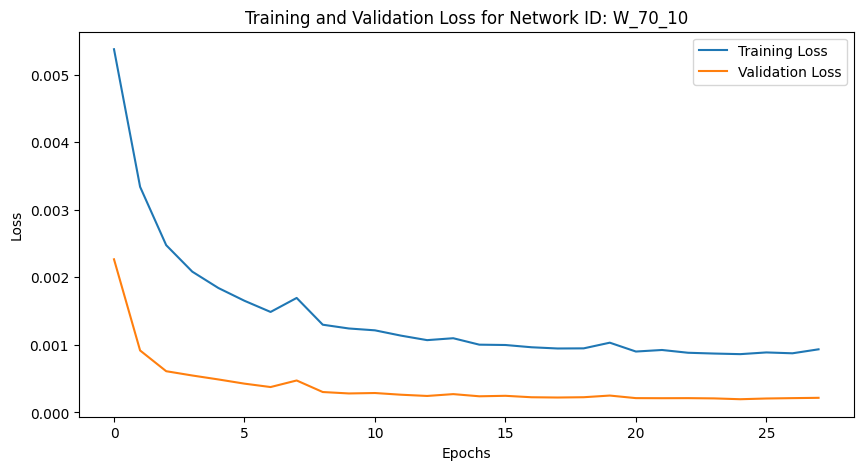

Training Progress:   0%|          | 27/10000 [00:51<5:16:48,  1.91s/epoch, loss=0.000935, val_loss=0.000217, patience=1]


Mean Squared Error: 0.0013362234371419607
Iteration: 70, Window Size: 80, Y Days Ahead: 1
X shape: (3727, 80)
y shape: (3727, 1)
Initializing network with layer sizes: [80, 128, 64, 32, 1]
Parameters loaded from params_W_80_1.npz
Training data shape: (2981, 80), (2981, 1), Validation data shape: (373, 80), (373, 1), Testing data shape: (373, 80), (373, 1)
Parameters loaded from params_W_80_1.npz


Training Progress:   0%|          | 21/10000 [00:55<7:41:39,  2.78s/epoch, loss=0.000246, val_loss=7.4e-5, patience=1] 

Epoch 22/10000, Training Loss: 0.000246, Validation Loss: 0.000074
Early stopping at epoch 22. Best validation loss: 0.000055


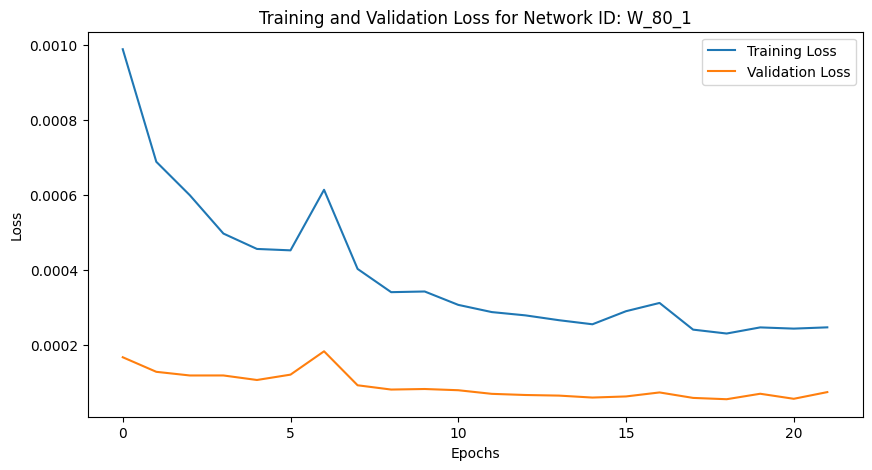

Training Progress:   0%|          | 21/10000 [00:55<7:19:20,  2.64s/epoch, loss=0.000246, val_loss=7.4e-5, patience=1]


Mean Squared Error: 0.00036310794965255976
Iteration: 71, Window Size: 80, Y Days Ahead: 2
X shape: (3726, 80)
y shape: (3726, 2)
Initializing network with layer sizes: [80, 128, 64, 32, 2]
Parameters loaded from params_W_80_2.npz
Training data shape: (2980, 80), (2980, 2), Validation data shape: (373, 80), (373, 2), Testing data shape: (373, 80), (373, 2)
Parameters loaded from params_W_80_2.npz


Training Progress:   0%|          | 23/10000 [00:56<5:56:38,  2.14s/epoch, loss=0.00033, val_loss=8.67e-5, patience=1]  

Epoch 24/10000, Training Loss: 0.000330, Validation Loss: 0.000087
Early stopping at epoch 24. Best validation loss: 0.000077


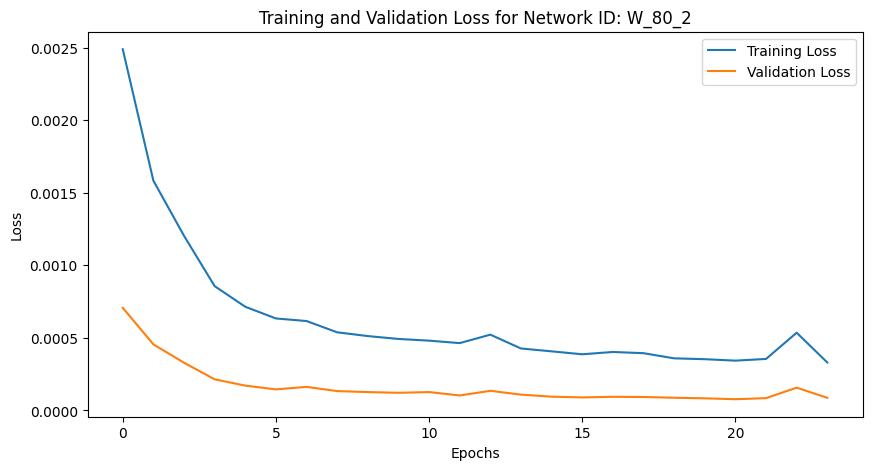

Training Progress:   0%|          | 23/10000 [00:56<6:48:32,  2.46s/epoch, loss=0.00033, val_loss=8.67e-5, patience=1]


Mean Squared Error: 0.0005314435662374807
Iteration: 72, Window Size: 80, Y Days Ahead: 3
X shape: (3725, 80)
y shape: (3725, 3)
Initializing network with layer sizes: [80, 128, 64, 32, 3]
Parameters loaded from params_W_80_3.npz
Training data shape: (2980, 80), (2980, 3), Validation data shape: (372, 80), (372, 3), Testing data shape: (373, 80), (373, 3)
Parameters loaded from params_W_80_3.npz


Training Progress:   0%|          | 11/10000 [00:23<5:24:44,  1.95s/epoch, loss=0.000536, val_loss=0.000131, patience=1]

Epoch 12/10000, Training Loss: 0.000536, Validation Loss: 0.000131
Early stopping at epoch 12. Best validation loss: 0.000129


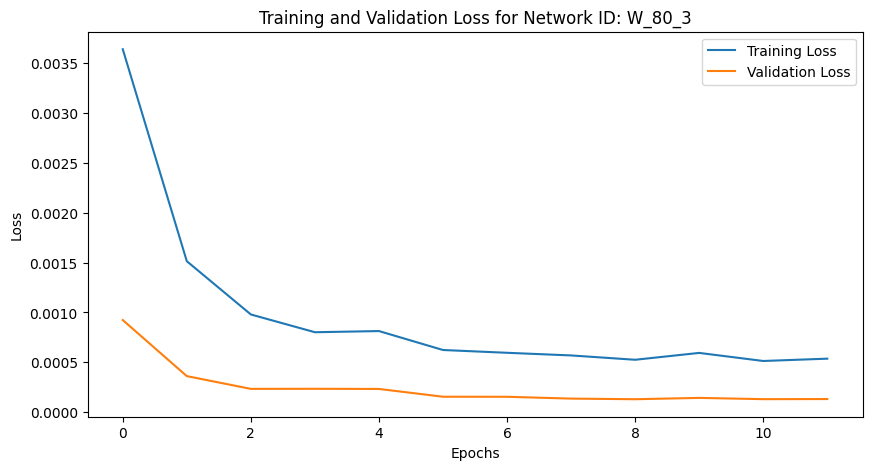

Training Progress:   0%|          | 11/10000 [00:23<5:52:02,  2.11s/epoch, loss=0.000536, val_loss=0.000131, patience=1]


Mean Squared Error: 0.0008394612941064281
Iteration: 73, Window Size: 80, Y Days Ahead: 4
X shape: (3724, 80)
y shape: (3724, 4)
Initializing network with layer sizes: [80, 128, 64, 32, 4]
Parameters loaded from params_W_80_4.npz
Training data shape: (2979, 80), (2979, 4), Validation data shape: (372, 80), (372, 4), Testing data shape: (373, 80), (373, 4)
Parameters loaded from params_W_80_4.npz


Training Progress:   0%|          | 8/10000 [00:16<4:54:55,  1.77s/epoch, loss=0.000717, val_loss=0.000206, patience=1]

Epoch 9/10000, Training Loss: 0.000717, Validation Loss: 0.000206
Early stopping at epoch 9. Best validation loss: 0.000177


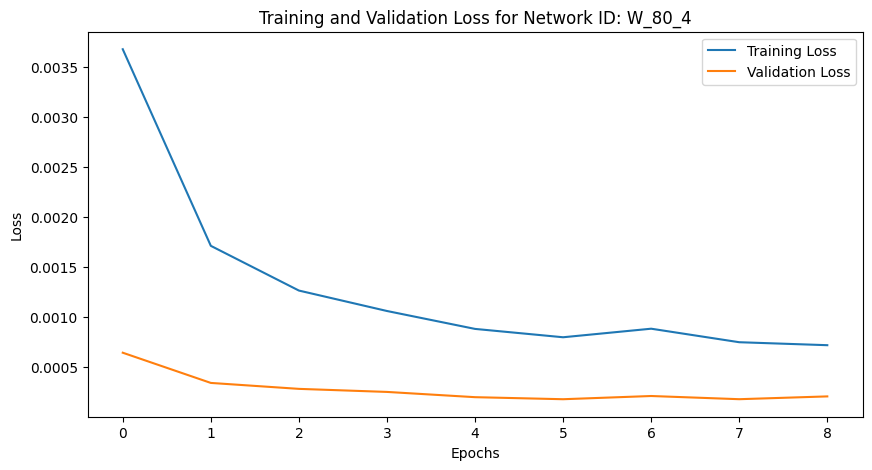

Training Progress:   0%|          | 8/10000 [00:16<5:38:37,  2.03s/epoch, loss=0.000717, val_loss=0.000206, patience=1]


Mean Squared Error: 0.001183437459756673
Iteration: 74, Window Size: 80, Y Days Ahead: 5
X shape: (3723, 80)
y shape: (3723, 5)
Initializing network with layer sizes: [80, 128, 64, 32, 5]
Parameters loaded from params_W_80_5.npz
Training data shape: (2978, 80), (2978, 5), Validation data shape: (372, 80), (372, 5), Testing data shape: (373, 80), (373, 5)
Parameters loaded from params_W_80_5.npz


Training Progress:   0%|          | 18/10000 [00:34<5:06:15,  1.84s/epoch, loss=0.000768, val_loss=0.000192, patience=1]

Epoch 19/10000, Training Loss: 0.000768, Validation Loss: 0.000192
Early stopping at epoch 19. Best validation loss: 0.000140


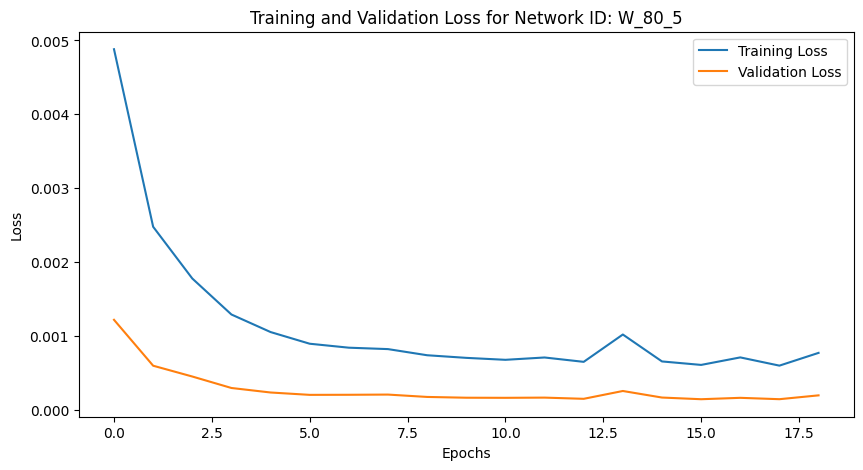

Training Progress:   0%|          | 18/10000 [00:34<5:23:28,  1.94s/epoch, loss=0.000768, val_loss=0.000192, patience=1]


Mean Squared Error: 0.0008868237783490058
Iteration: 75, Window Size: 80, Y Days Ahead: 6
X shape: (3722, 80)
y shape: (3722, 6)
Initializing network with layer sizes: [80, 128, 64, 32, 6]
params_W_80_6.npz not found. Using randomly initialized parameters.
Training data shape: (2977, 80), (2977, 6), Validation data shape: (372, 80), (372, 6), Testing data shape: (373, 80), (373, 6)
Parameters loaded from params_W_80_6.npz


Training Progress:   0%|          | 25/10000 [00:48<5:15:04,  1.90s/epoch, loss=0.000802, val_loss=0.000233, patience=1]

Epoch 26/10000, Training Loss: 0.000802, Validation Loss: 0.000233
Early stopping at epoch 26. Best validation loss: 0.000154


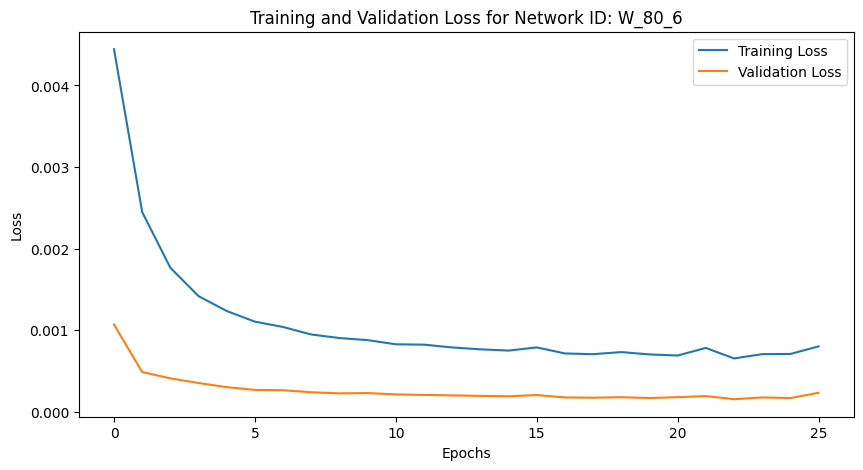

Training Progress:   0%|          | 25/10000 [00:48<5:24:47,  1.95s/epoch, loss=0.000802, val_loss=0.000233, patience=1]


Mean Squared Error: 0.0009737644264892891
Iteration: 76, Window Size: 80, Y Days Ahead: 7
X shape: (3721, 80)
y shape: (3721, 7)
Initializing network with layer sizes: [80, 128, 64, 32, 7]
params_W_80_7.npz not found. Using randomly initialized parameters.
Training data shape: (2976, 80), (2976, 7), Validation data shape: (372, 80), (372, 7), Testing data shape: (373, 80), (373, 7)
Parameters loaded from params_W_80_7.npz


Training Progress:   0%|          | 38/10000 [01:20<6:32:00,  2.36s/epoch, loss=0.000624, val_loss=0.000142, patience=1]

Epoch 39/10000, Training Loss: 0.000624, Validation Loss: 0.000142
Early stopping at epoch 39. Best validation loss: 0.000141


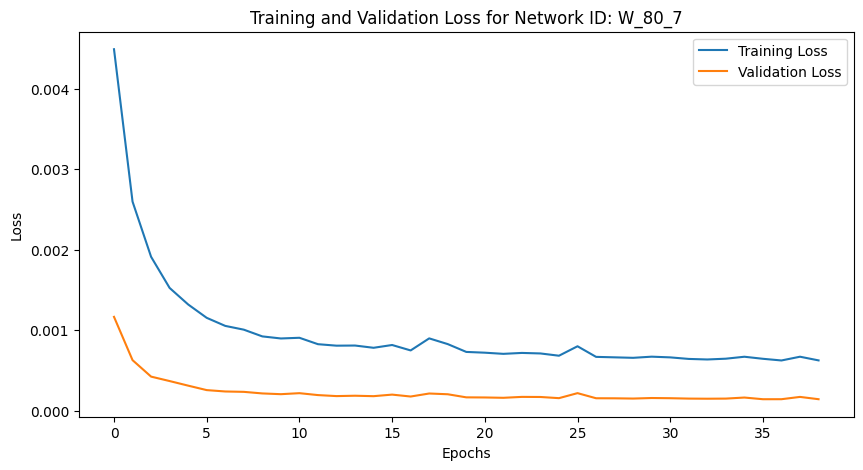

Training Progress:   0%|          | 38/10000 [01:21<5:54:29,  2.14s/epoch, loss=0.000624, val_loss=0.000142, patience=1]


Mean Squared Error: 0.0009845144323613793
Iteration: 77, Window Size: 80, Y Days Ahead: 8
X shape: (3720, 80)
y shape: (3720, 8)
Initializing network with layer sizes: [80, 128, 64, 32, 8]
params_W_80_8.npz not found. Using randomly initialized parameters.
Training data shape: (2976, 80), (2976, 8), Validation data shape: (372, 80), (372, 8), Testing data shape: (372, 80), (372, 8)
Parameters loaded from params_W_80_8.npz


Training Progress:   0%|          | 30/10000 [01:04<4:58:45,  1.80s/epoch, loss=0.000743, val_loss=0.000178, patience=1]

Epoch 31/10000, Training Loss: 0.000743, Validation Loss: 0.000178
Early stopping at epoch 31. Best validation loss: 0.000156


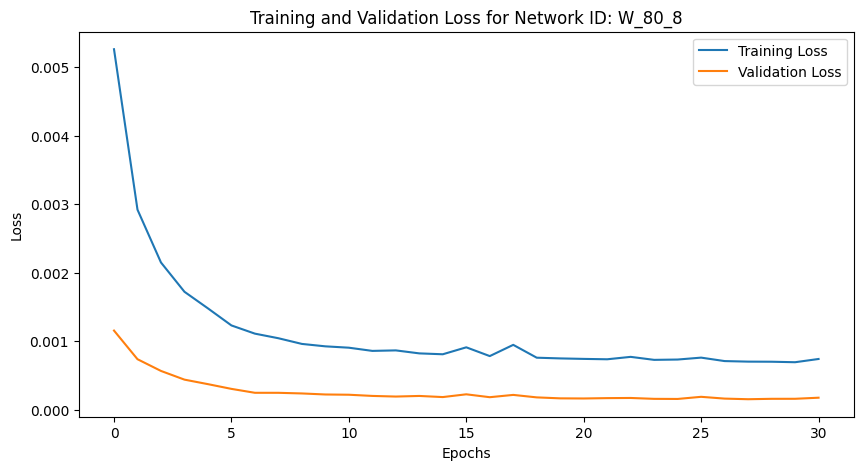

Training Progress:   0%|          | 30/10000 [01:04<5:57:03,  2.15s/epoch, loss=0.000743, val_loss=0.000178, patience=1]


Mean Squared Error: 0.001127603527519188
Iteration: 78, Window Size: 80, Y Days Ahead: 9
X shape: (3719, 80)
y shape: (3719, 9)
Initializing network with layer sizes: [80, 128, 64, 32, 9]
params_W_80_9.npz not found. Using randomly initialized parameters.
Training data shape: (2975, 80), (2975, 9), Validation data shape: (372, 80), (372, 9), Testing data shape: (372, 80), (372, 9)
Parameters loaded from params_W_80_9.npz


Training Progress:   0%|          | 24/10000 [00:46<5:06:01,  1.84s/epoch, loss=0.000838, val_loss=0.000207, patience=1]

Epoch 25/10000, Training Loss: 0.000838, Validation Loss: 0.000207
Early stopping at epoch 25. Best validation loss: 0.000197


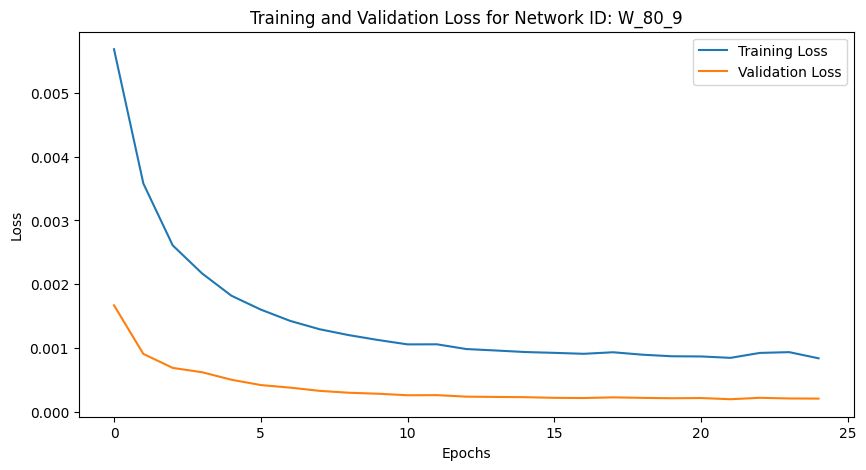

Training Progress:   0%|          | 24/10000 [00:46<5:20:16,  1.93s/epoch, loss=0.000838, val_loss=0.000207, patience=1]


Mean Squared Error: 0.0012708346060687136
Iteration: 79, Window Size: 80, Y Days Ahead: 10
X shape: (3718, 80)
y shape: (3718, 10)
Initializing network with layer sizes: [80, 128, 64, 32, 10]
params_W_80_10.npz not found. Using randomly initialized parameters.
Training data shape: (2974, 80), (2974, 10), Validation data shape: (372, 80), (372, 10), Testing data shape: (372, 80), (372, 10)
Parameters loaded from params_W_80_10.npz


Training Progress:   0%|          | 19/10000 [00:38<5:19:42,  1.92s/epoch, loss=0.000966, val_loss=0.000219, patience=1]

Epoch 20/10000, Training Loss: 0.000966, Validation Loss: 0.000219
Early stopping at epoch 20. Best validation loss: 0.000207


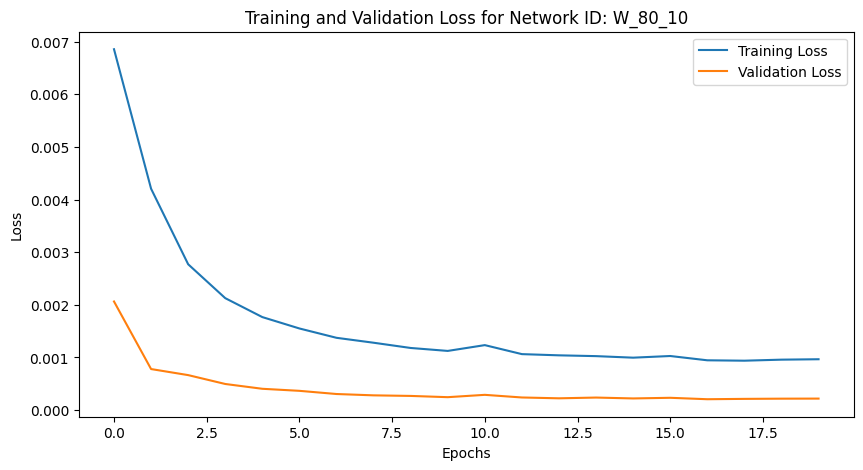

Training Progress:   0%|          | 19/10000 [00:38<5:36:05,  2.02s/epoch, loss=0.000966, val_loss=0.000219, patience=1]


Mean Squared Error: 0.00142252856648946
Iteration: 80, Window Size: 90, Y Days Ahead: 1
X shape: (3717, 90)
y shape: (3717, 1)
Initializing network with layer sizes: [90, 128, 64, 32, 1]
Parameters loaded from params_W_90_1.npz
Training data shape: (2973, 90), (2973, 1), Validation data shape: (372, 90), (372, 1), Testing data shape: (372, 90), (372, 1)
Parameters loaded from params_W_90_1.npz


Training Progress:   0%|          | 15/10000 [00:31<5:15:53,  1.90s/epoch, loss=0.000429, val_loss=8.64e-5, patience=1]

Epoch 16/10000, Training Loss: 0.000429, Validation Loss: 0.000086
Early stopping at epoch 16. Best validation loss: 0.000064


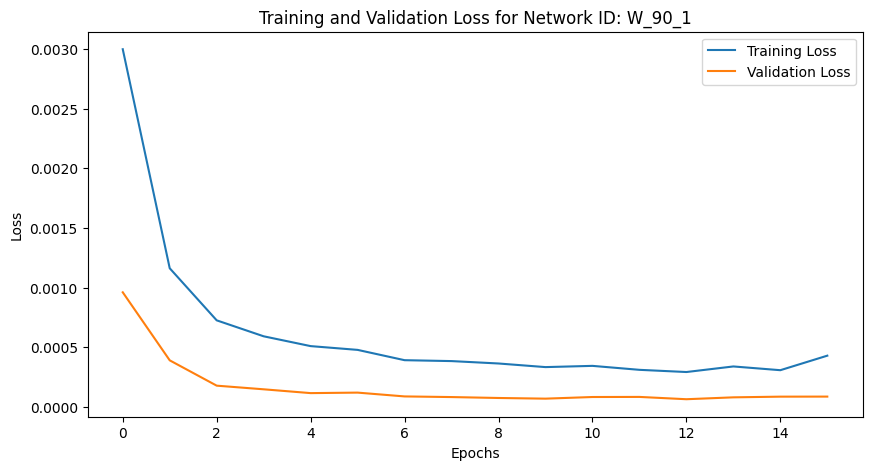

Training Progress:   0%|          | 15/10000 [00:31<5:49:06,  2.10s/epoch, loss=0.000429, val_loss=8.64e-5, patience=1]


Mean Squared Error: 0.000488046500491883
Iteration: 81, Window Size: 90, Y Days Ahead: 2
X shape: (3716, 90)
y shape: (3716, 2)
Initializing network with layer sizes: [90, 128, 64, 32, 2]
Parameters loaded from params_W_90_2.npz
Training data shape: (2972, 90), (2972, 2), Validation data shape: (372, 90), (372, 2), Testing data shape: (372, 90), (372, 2)
Parameters loaded from params_W_90_2.npz


Training Progress:   0%|          | 22/10000 [00:43<5:11:07,  1.87s/epoch, loss=0.000365, val_loss=8.38e-5, patience=1] 

Epoch 23/10000, Training Loss: 0.000365, Validation Loss: 0.000084
Early stopping at epoch 23. Best validation loss: 0.000079


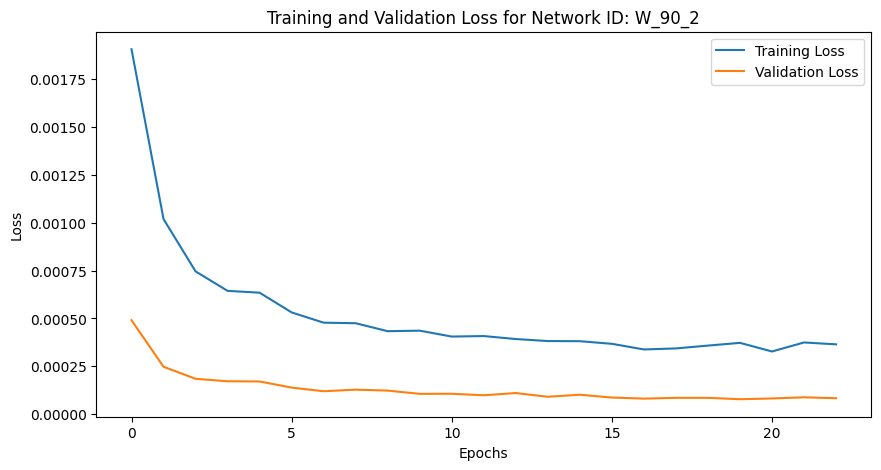

Training Progress:   0%|          | 22/10000 [00:43<5:30:17,  1.99s/epoch, loss=0.000365, val_loss=8.38e-5, patience=1]


Mean Squared Error: 0.00054200307110362
Iteration: 82, Window Size: 90, Y Days Ahead: 3
X shape: (3715, 90)
y shape: (3715, 3)
Initializing network with layer sizes: [90, 128, 64, 32, 3]
Parameters loaded from params_W_90_3.npz
Training data shape: (2972, 90), (2972, 3), Validation data shape: (371, 90), (371, 3), Testing data shape: (372, 90), (372, 3)
Parameters loaded from params_W_90_3.npz


Training Progress:   0%|          | 17/10000 [00:30<4:18:02,  1.55s/epoch, loss=0.000479, val_loss=0.000128, patience=1]

Epoch 18/10000, Training Loss: 0.000479, Validation Loss: 0.000128
Early stopping at epoch 18. Best validation loss: 0.000113


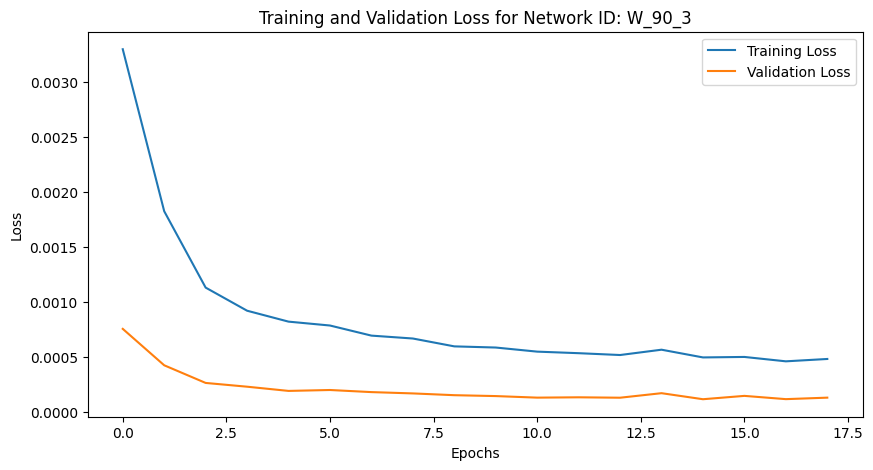

Training Progress:   0%|          | 17/10000 [00:30<4:57:45,  1.79s/epoch, loss=0.000479, val_loss=0.000128, patience=1]


Mean Squared Error: 0.0007030728498043392
Iteration: 83, Window Size: 90, Y Days Ahead: 4
X shape: (3714, 90)
y shape: (3714, 4)
Initializing network with layer sizes: [90, 128, 64, 32, 4]
Parameters loaded from params_W_90_4.npz
Training data shape: (2971, 90), (2971, 4), Validation data shape: (371, 90), (371, 4), Testing data shape: (372, 90), (372, 4)
Parameters loaded from params_W_90_4.npz


Training Progress:   0%|          | 23/10000 [00:38<4:22:57,  1.58s/epoch, loss=0.000594, val_loss=0.00016, patience=1] 

Epoch 24/10000, Training Loss: 0.000594, Validation Loss: 0.000160
Early stopping at epoch 24. Best validation loss: 0.000118


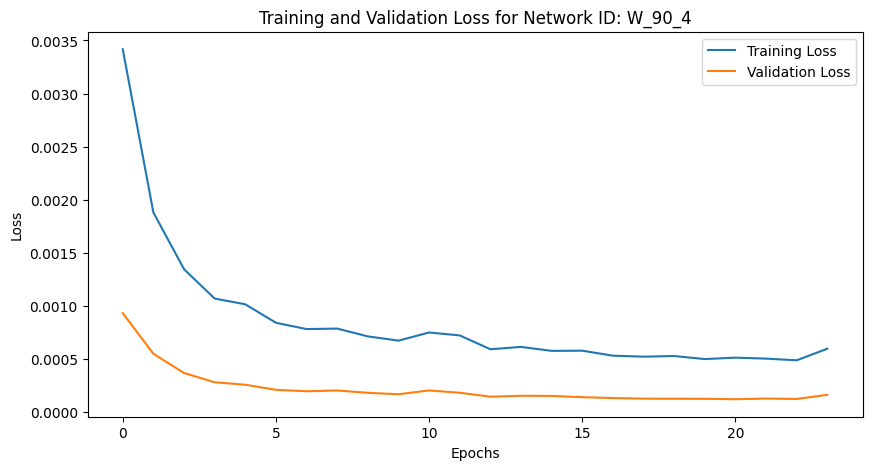

Training Progress:   0%|          | 23/10000 [00:38<4:40:14,  1.69s/epoch, loss=0.000594, val_loss=0.00016, patience=1]


Mean Squared Error: 0.0007727719300448313
Iteration: 84, Window Size: 90, Y Days Ahead: 5
X shape: (3713, 90)
y shape: (3713, 5)
Initializing network with layer sizes: [90, 128, 64, 32, 5]
Parameters loaded from params_W_90_5.npz
Training data shape: (2970, 90), (2970, 5), Validation data shape: (371, 90), (371, 5), Testing data shape: (372, 90), (372, 5)
Parameters loaded from params_W_90_5.npz


Training Progress:   0%|          | 20/10000 [00:33<4:33:28,  1.64s/epoch, loss=0.000626, val_loss=0.000149, patience=1]

Epoch 21/10000, Training Loss: 0.000626, Validation Loss: 0.000149
Early stopping at epoch 21. Best validation loss: 0.000141


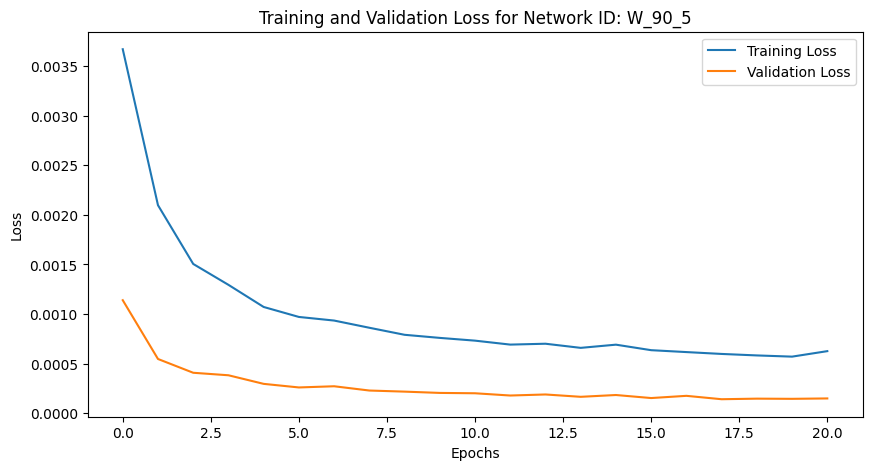

Training Progress:   0%|          | 20/10000 [00:34<4:43:18,  1.70s/epoch, loss=0.000626, val_loss=0.000149, patience=1]


Mean Squared Error: 0.0009531137639345714
Iteration: 85, Window Size: 90, Y Days Ahead: 6
X shape: (3712, 90)
y shape: (3712, 6)
Initializing network with layer sizes: [90, 128, 64, 32, 6]
params_W_90_6.npz not found. Using randomly initialized parameters.
Training data shape: (2969, 90), (2969, 6), Validation data shape: (371, 90), (371, 6), Testing data shape: (372, 90), (372, 6)
Parameters loaded from params_W_90_6.npz


Training Progress:   0%|          | 13/10000 [00:22<4:32:40,  1.64s/epoch, loss=0.000769, val_loss=0.000196, patience=1]

Epoch 14/10000, Training Loss: 0.000769, Validation Loss: 0.000196
Early stopping at epoch 14. Best validation loss: 0.000192


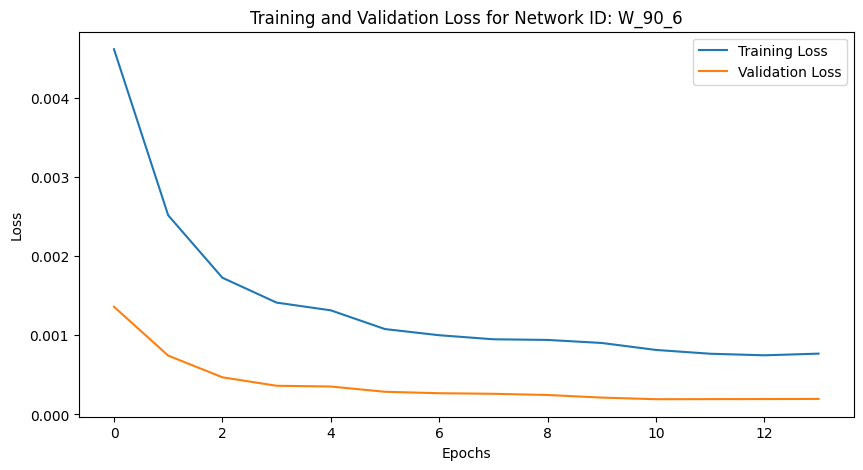

Training Progress:   0%|          | 13/10000 [00:22<4:53:14,  1.76s/epoch, loss=0.000769, val_loss=0.000196, patience=1]


Mean Squared Error: 0.0011563111716217152
Iteration: 86, Window Size: 90, Y Days Ahead: 7
X shape: (3711, 90)
y shape: (3711, 7)
Initializing network with layer sizes: [90, 128, 64, 32, 7]
params_W_90_7.npz not found. Using randomly initialized parameters.
Training data shape: (2968, 90), (2968, 7), Validation data shape: (371, 90), (371, 7), Testing data shape: (372, 90), (372, 7)
Parameters loaded from params_W_90_7.npz


Training Progress:   0%|          | 23/10000 [00:44<5:36:21,  2.02s/epoch, loss=0.000683, val_loss=0.000164, patience=1]

Epoch 24/10000, Training Loss: 0.000683, Validation Loss: 0.000164
Early stopping at epoch 24. Best validation loss: 0.000160


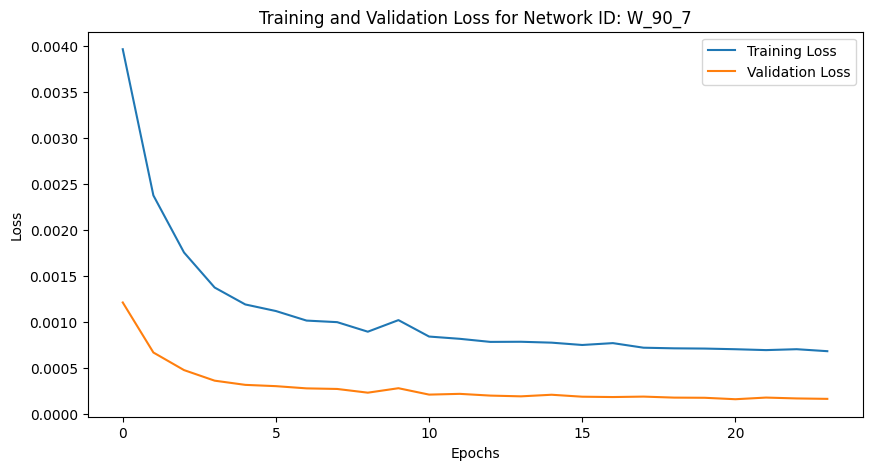

Training Progress:   0%|          | 23/10000 [00:44<5:24:41,  1.95s/epoch, loss=0.000683, val_loss=0.000164, patience=1]


Mean Squared Error: 0.0010322045553580988
Iteration: 87, Window Size: 90, Y Days Ahead: 8
X shape: (3710, 90)
y shape: (3710, 8)
Initializing network with layer sizes: [90, 128, 64, 32, 8]
params_W_90_8.npz not found. Using randomly initialized parameters.
Training data shape: (2968, 90), (2968, 8), Validation data shape: (371, 90), (371, 8), Testing data shape: (371, 90), (371, 8)
Parameters loaded from params_W_90_8.npz


Training Progress:   0%|          | 15/10000 [00:31<5:12:49,  1.88s/epoch, loss=0.000903, val_loss=0.000221, patience=1]

Epoch 16/10000, Training Loss: 0.000903, Validation Loss: 0.000221
Early stopping at epoch 16. Best validation loss: 0.000216


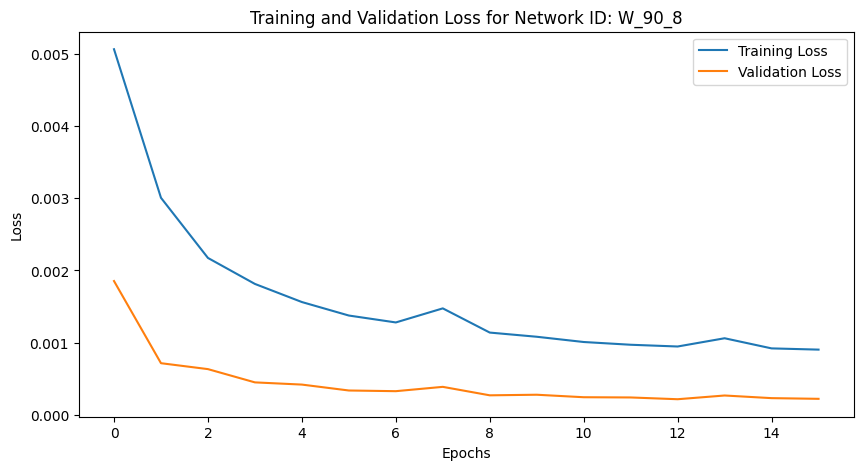

Training Progress:   0%|          | 15/10000 [00:31<5:48:05,  2.09s/epoch, loss=0.000903, val_loss=0.000221, patience=1]


Mean Squared Error: 0.0014265057251349076
Iteration: 88, Window Size: 90, Y Days Ahead: 9
X shape: (3709, 90)
y shape: (3709, 9)
Initializing network with layer sizes: [90, 128, 64, 32, 9]
params_W_90_9.npz not found. Using randomly initialized parameters.
Training data shape: (2967, 90), (2967, 9), Validation data shape: (371, 90), (371, 9), Testing data shape: (371, 90), (371, 9)
Parameters loaded from params_W_90_9.npz


Training Progress:   0%|          | 19/10000 [00:39<5:17:44,  1.91s/epoch, loss=0.000844, val_loss=0.000223, patience=1]

Epoch 20/10000, Training Loss: 0.000844, Validation Loss: 0.000223
Early stopping at epoch 20. Best validation loss: 0.000220


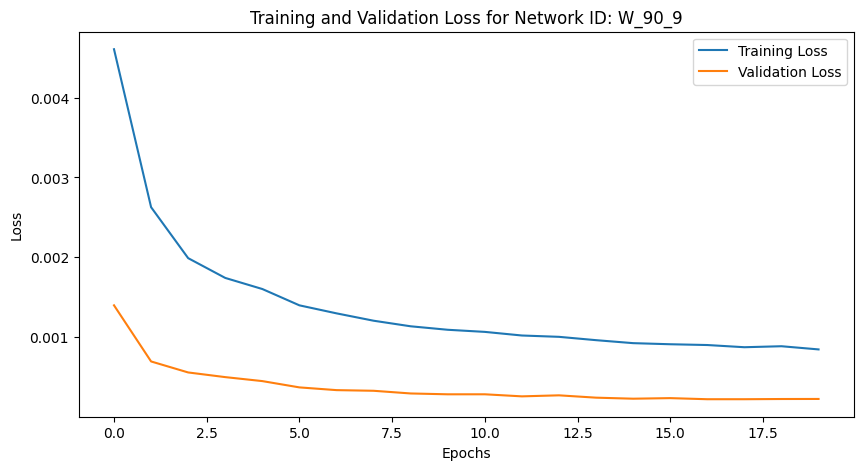

Training Progress:   0%|          | 19/10000 [00:39<5:45:25,  2.08s/epoch, loss=0.000844, val_loss=0.000223, patience=1]


Mean Squared Error: 0.0013895509557203755
Iteration: 89, Window Size: 90, Y Days Ahead: 10
X shape: (3708, 90)
y shape: (3708, 10)
Initializing network with layer sizes: [90, 128, 64, 32, 10]
params_W_90_10.npz not found. Using randomly initialized parameters.
Training data shape: (2966, 90), (2966, 10), Validation data shape: (371, 90), (371, 10), Testing data shape: (371, 90), (371, 10)
Parameters loaded from params_W_90_10.npz


Training Progress:   0%|          | 25/10000 [00:53<5:16:27,  1.90s/epoch, loss=0.000898, val_loss=0.000219, patience=1]

Epoch 26/10000, Training Loss: 0.000898, Validation Loss: 0.000219
Early stopping at epoch 26. Best validation loss: 0.000208


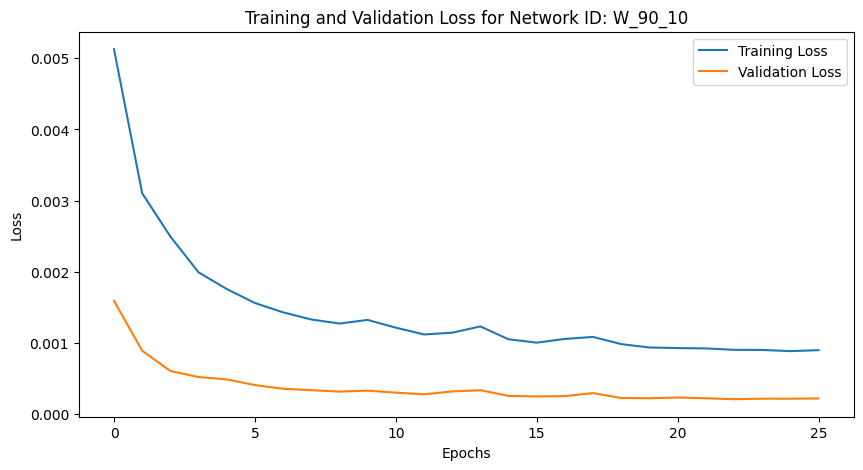

Training Progress:   0%|          | 25/10000 [00:53<5:58:19,  2.16s/epoch, loss=0.000898, val_loss=0.000219, patience=1]


Mean Squared Error: 0.0014258486516039136
Iteration: 90, Window Size: 100, Y Days Ahead: 1
X shape: (3707, 100)
y shape: (3707, 1)
Initializing network with layer sizes: [100, 128, 64, 32, 1]
params_W_100_1.npz not found. Using randomly initialized parameters.
Training data shape: (2965, 100), (2965, 1), Validation data shape: (371, 100), (371, 1), Testing data shape: (371, 100), (371, 1)
Parameters loaded from params_W_100_1.npz


Training Progress:   0%|          | 20/10000 [00:42<5:47:50,  2.09s/epoch, loss=0.000328, val_loss=8.19e-5, patience=1] 

Epoch 21/10000, Training Loss: 0.000328, Validation Loss: 0.000082
Early stopping at epoch 21. Best validation loss: 0.000069


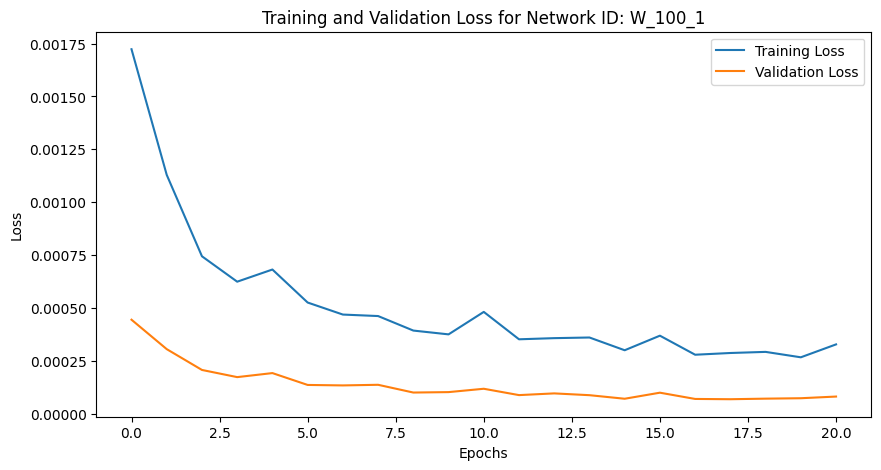

Training Progress:   0%|          | 20/10000 [00:42<5:54:41,  2.13s/epoch, loss=0.000328, val_loss=8.19e-5, patience=1]


Mean Squared Error: 0.0004458627574052606
Iteration: 91, Window Size: 100, Y Days Ahead: 2
X shape: (3706, 100)
y shape: (3706, 2)
Initializing network with layer sizes: [100, 128, 64, 32, 2]
params_W_100_2.npz not found. Using randomly initialized parameters.
Training data shape: (2964, 100), (2964, 2), Validation data shape: (371, 100), (371, 2), Testing data shape: (371, 100), (371, 2)
Parameters loaded from params_W_100_2.npz


Training Progress:   0%|          | 12/10000 [00:26<5:21:11,  1.93s/epoch, loss=0.000682, val_loss=0.000162, patience=1]

Epoch 13/10000, Training Loss: 0.000682, Validation Loss: 0.000162
Early stopping at epoch 13. Best validation loss: 0.000134


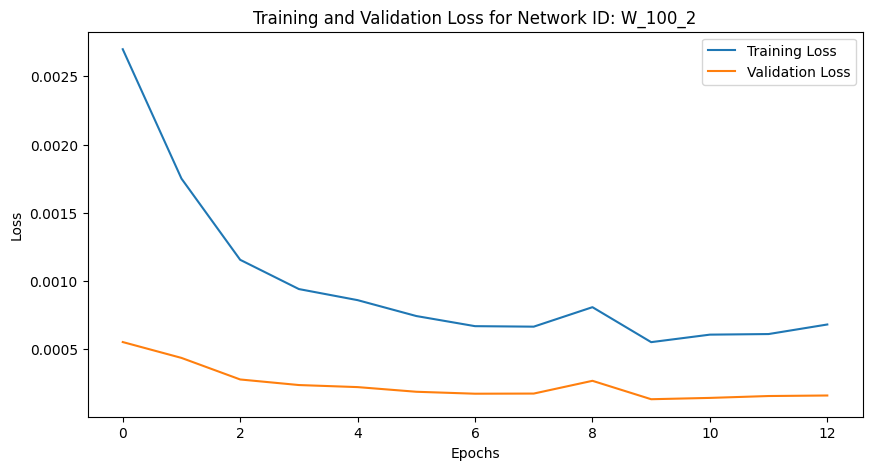

Training Progress:   0%|          | 12/10000 [00:26<6:10:50,  2.23s/epoch, loss=0.000682, val_loss=0.000162, patience=1]


Mean Squared Error: 0.0008946615220854037
Iteration: 92, Window Size: 100, Y Days Ahead: 3
X shape: (3705, 100)
y shape: (3705, 3)
Initializing network with layer sizes: [100, 128, 64, 32, 3]
params_W_100_3.npz not found. Using randomly initialized parameters.
Training data shape: (2964, 100), (2964, 3), Validation data shape: (370, 100), (370, 3), Testing data shape: (371, 100), (371, 3)
Parameters loaded from params_W_100_3.npz


Training Progress:   0%|          | 28/10000 [00:56<5:32:02,  2.00s/epoch, loss=0.000393, val_loss=0.000104, patience=1]

Epoch 29/10000, Training Loss: 0.000393, Validation Loss: 0.000104
Early stopping at epoch 29. Best validation loss: 0.000098


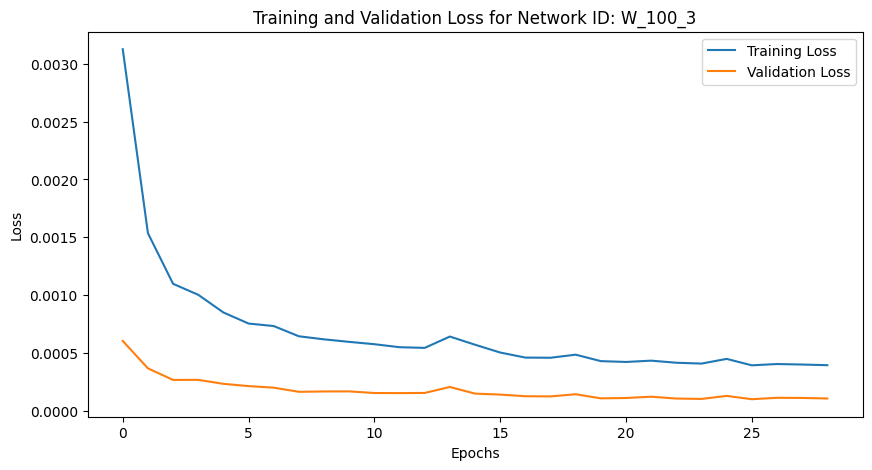

Training Progress:   0%|          | 28/10000 [00:57<5:38:28,  2.04s/epoch, loss=0.000393, val_loss=0.000104, patience=1]


Mean Squared Error: 0.000636652751752326
Iteration: 93, Window Size: 100, Y Days Ahead: 4
X shape: (3704, 100)
y shape: (3704, 4)
Initializing network with layer sizes: [100, 128, 64, 32, 4]
params_W_100_4.npz not found. Using randomly initialized parameters.
Training data shape: (2963, 100), (2963, 4), Validation data shape: (370, 100), (370, 4), Testing data shape: (371, 100), (371, 4)
Parameters loaded from params_W_100_4.npz


Training Progress:   0%|          | 19/10000 [00:40<5:21:18,  1.93s/epoch, loss=0.000567, val_loss=0.000147, patience=1]

Epoch 20/10000, Training Loss: 0.000567, Validation Loss: 0.000147
Early stopping at epoch 20. Best validation loss: 0.000144


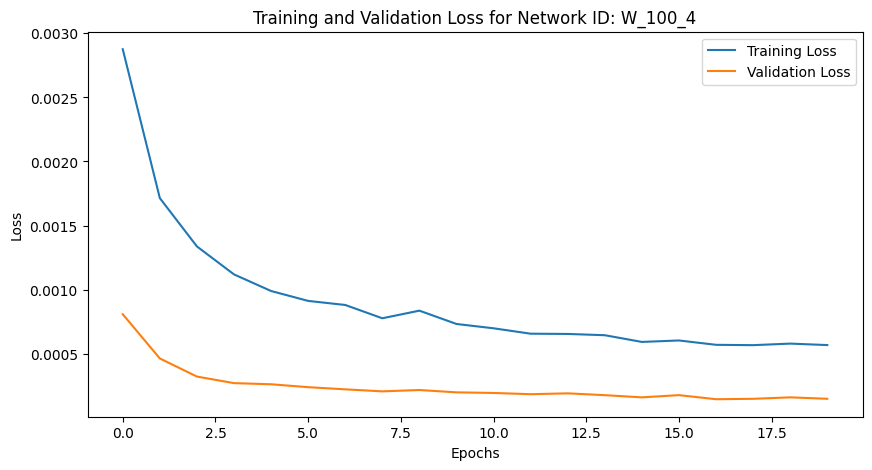

Training Progress:   0%|          | 19/10000 [00:40<5:57:32,  2.15s/epoch, loss=0.000567, val_loss=0.000147, patience=1]


Mean Squared Error: 0.0008842559525353892
Iteration: 94, Window Size: 100, Y Days Ahead: 5
X shape: (3703, 100)
y shape: (3703, 5)
Initializing network with layer sizes: [100, 128, 64, 32, 5]
params_W_100_5.npz not found. Using randomly initialized parameters.
Training data shape: (2962, 100), (2962, 5), Validation data shape: (370, 100), (370, 5), Testing data shape: (371, 100), (371, 5)
Parameters loaded from params_W_100_5.npz


Training Progress:   0%|          | 16/10000 [00:33<5:47:30,  2.09s/epoch, loss=0.000738, val_loss=0.000179, patience=1]

Epoch 17/10000, Training Loss: 0.000738, Validation Loss: 0.000179
Early stopping at epoch 17. Best validation loss: 0.000169


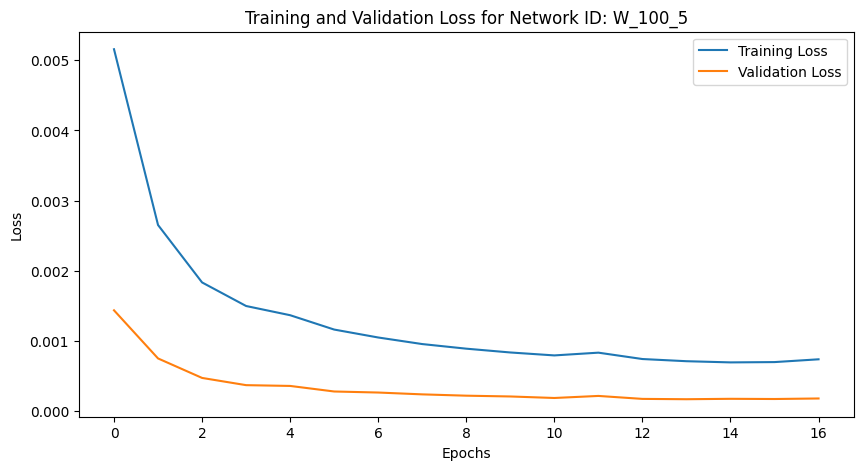

Training Progress:   0%|          | 16/10000 [00:33<5:52:29,  2.12s/epoch, loss=0.000738, val_loss=0.000179, patience=1]


Mean Squared Error: 0.001066980002606496
Iteration: 95, Window Size: 100, Y Days Ahead: 6
X shape: (3702, 100)
y shape: (3702, 6)
Initializing network with layer sizes: [100, 128, 64, 32, 6]
params_W_100_6.npz not found. Using randomly initialized parameters.
Training data shape: (2961, 100), (2961, 6), Validation data shape: (370, 100), (370, 6), Testing data shape: (371, 100), (371, 6)
Parameters loaded from params_W_100_6.npz


Training Progress:   0%|          | 21/10000 [00:47<5:57:25,  2.15s/epoch, loss=0.000722, val_loss=0.000182, patience=1]

Epoch 22/10000, Training Loss: 0.000722, Validation Loss: 0.000182
Early stopping at epoch 22. Best validation loss: 0.000172


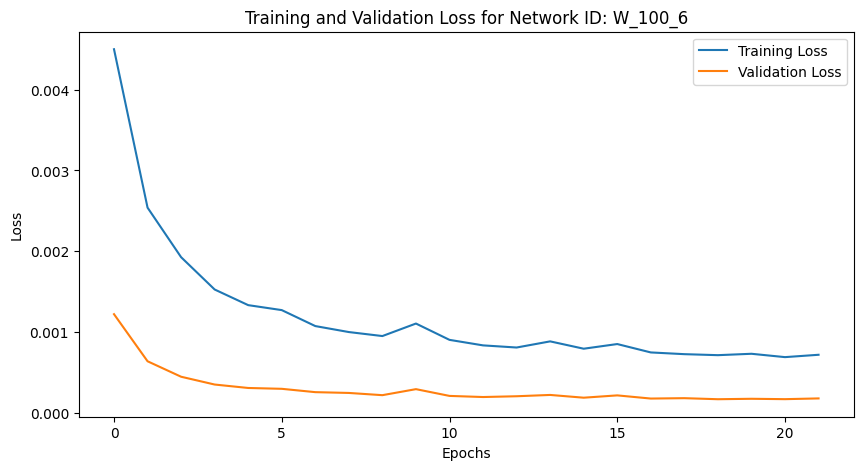

Training Progress:   0%|          | 21/10000 [00:47<6:16:10,  2.26s/epoch, loss=0.000722, val_loss=0.000182, patience=1]


Mean Squared Error: 0.001001460131244252
Iteration: 96, Window Size: 100, Y Days Ahead: 7
X shape: (3701, 100)
y shape: (3701, 7)
Initializing network with layer sizes: [100, 128, 64, 32, 7]
params_W_100_7.npz not found. Using randomly initialized parameters.
Training data shape: (2960, 100), (2960, 7), Validation data shape: (370, 100), (370, 7), Testing data shape: (371, 100), (371, 7)
Parameters loaded from params_W_100_7.npz


Training Progress:   0%|          | 11/10000 [00:25<5:40:38,  2.05s/epoch, loss=0.00113, val_loss=0.000328, patience=1] 

Epoch 12/10000, Training Loss: 0.001128, Validation Loss: 0.000328
Early stopping at epoch 12. Best validation loss: 0.000246


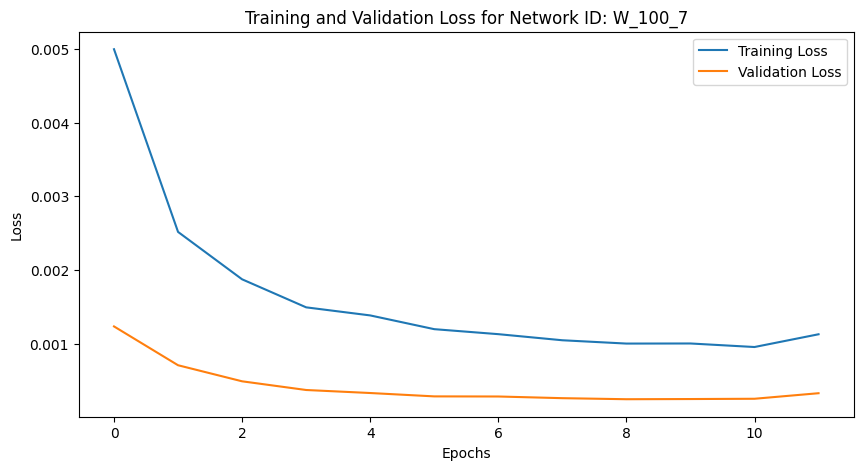

Training Progress:   0%|          | 11/10000 [00:25<6:22:12,  2.30s/epoch, loss=0.00113, val_loss=0.000328, patience=1]


Mean Squared Error: 0.0014473469410389416
Iteration: 97, Window Size: 100, Y Days Ahead: 8
X shape: (3700, 100)
y shape: (3700, 8)
Initializing network with layer sizes: [100, 128, 64, 32, 8]
params_W_100_8.npz not found. Using randomly initialized parameters.
Training data shape: (2960, 100), (2960, 8), Validation data shape: (370, 100), (370, 8), Testing data shape: (370, 100), (370, 8)
Parameters loaded from params_W_100_8.npz


Training Progress:   0%|          | 25/10000 [00:55<5:52:46,  2.12s/epoch, loss=0.000775, val_loss=0.000188, patience=1]

Epoch 26/10000, Training Loss: 0.000775, Validation Loss: 0.000188
Early stopping at epoch 26. Best validation loss: 0.000180


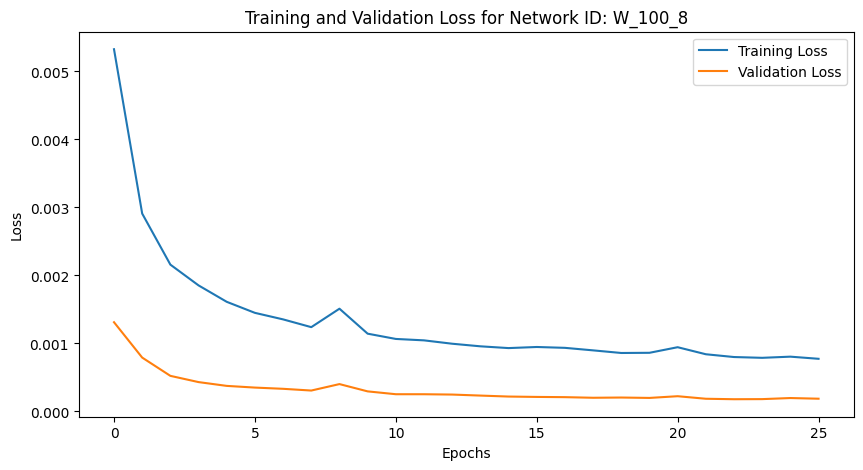

Training Progress:   0%|          | 25/10000 [00:55<6:10:06,  2.23s/epoch, loss=0.000775, val_loss=0.000188, patience=1]


Mean Squared Error: 0.0012096949321736342
Iteration: 98, Window Size: 100, Y Days Ahead: 9
X shape: (3699, 100)
y shape: (3699, 9)
Initializing network with layer sizes: [100, 128, 64, 32, 9]
params_W_100_9.npz not found. Using randomly initialized parameters.
Training data shape: (2959, 100), (2959, 9), Validation data shape: (370, 100), (370, 9), Testing data shape: (370, 100), (370, 9)
Parameters loaded from params_W_100_9.npz


Training Progress:   0%|          | 11/10000 [00:27<6:30:07,  2.34s/epoch, loss=0.00115, val_loss=0.000299, patience=1]

Epoch 12/10000, Training Loss: 0.001151, Validation Loss: 0.000299
Early stopping at epoch 12. Best validation loss: 0.000290


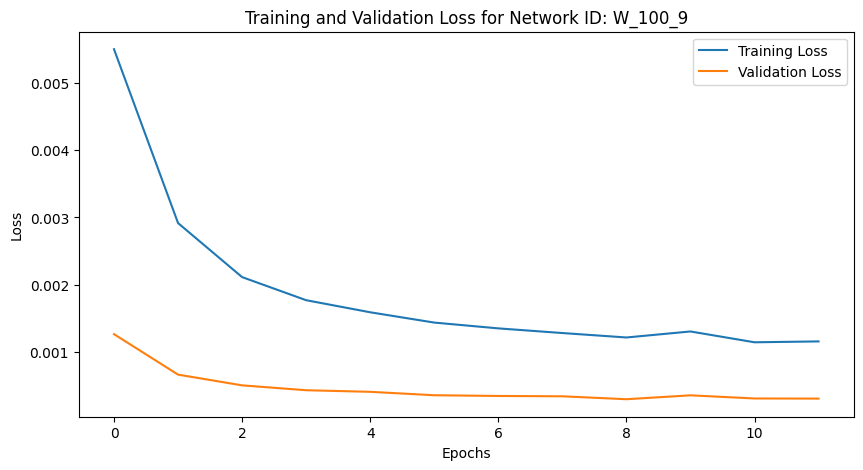

Training Progress:   0%|          | 11/10000 [00:27<6:55:45,  2.50s/epoch, loss=0.00115, val_loss=0.000299, patience=1]


Mean Squared Error: 0.0016579840329367943
Iteration: 99, Window Size: 100, Y Days Ahead: 10
X shape: (3698, 100)
y shape: (3698, 10)
Initializing network with layer sizes: [100, 128, 64, 32, 10]
params_W_100_10.npz not found. Using randomly initialized parameters.
Training data shape: (2958, 100), (2958, 10), Validation data shape: (370, 100), (370, 10), Testing data shape: (370, 100), (370, 10)
Parameters loaded from params_W_100_10.npz


Training Progress:   0%|          | 24/10000 [00:55<6:06:47,  2.21s/epoch, loss=0.000965, val_loss=0.000254, patience=1]

Epoch 25/10000, Training Loss: 0.000965, Validation Loss: 0.000254
Early stopping at epoch 25. Best validation loss: 0.000253


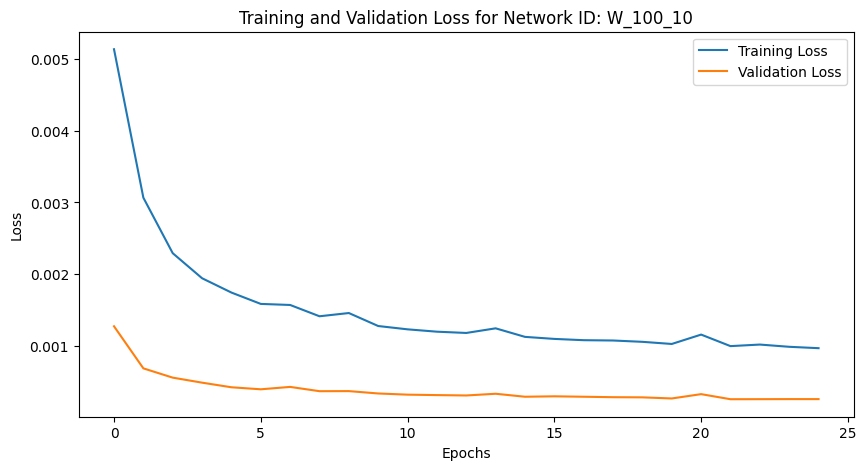

Training Progress:   0%|          | 24/10000 [00:55<6:22:35,  2.30s/epoch, loss=0.000965, val_loss=0.000254, patience=1]

Mean Squared Error: 0.001422261927980739


In [6]:
def functionError(window_size, y_days_ahead):
    X, y = create_dataset(scaled_data, window_size, y_days_ahead)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    
    #Test Manual BPNN
    layer_sizes = [X_train.shape[1], 128, 64, 32, y_train.shape[1]]
    model_name = f"W_{X_train.shape[1]}_{y_train.shape[1]}"
    model_manual = BPNN(layer_sizes, model_name)
    print(f"Training data shape: {X_train.shape}, {y_train.shape}, Validation data shape: {X_val.shape}, {y_val.shape}, Testing data shape: {X_test.shape}, {y_test.shape}")
    history = model_manual.train(X_train, y_train, X_val, y_val, epochs = 10000,batch_size = 1 , shuffle = True, patience = 3, learning_rate=1e-5)
    predictions = model_manual.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")

    return mse

for i in range(numberOfDataPoints):
    window_size = minWindowsInput + i * distanceBetweenDataPointsWindows
    for j in range(numberOfDataPoints):
        y_days_ahead = minWindowsPredicted + j * distanceBetweenDataPointsPredict
        print("=====================================================================================================")
        print(f"Iteration: {iteration}, Window Size: {window_size}, Y Days Ahead: {y_days_ahead}")
        error[i][j] = functionError(window_size, y_days_ahead)
        iteration += 1

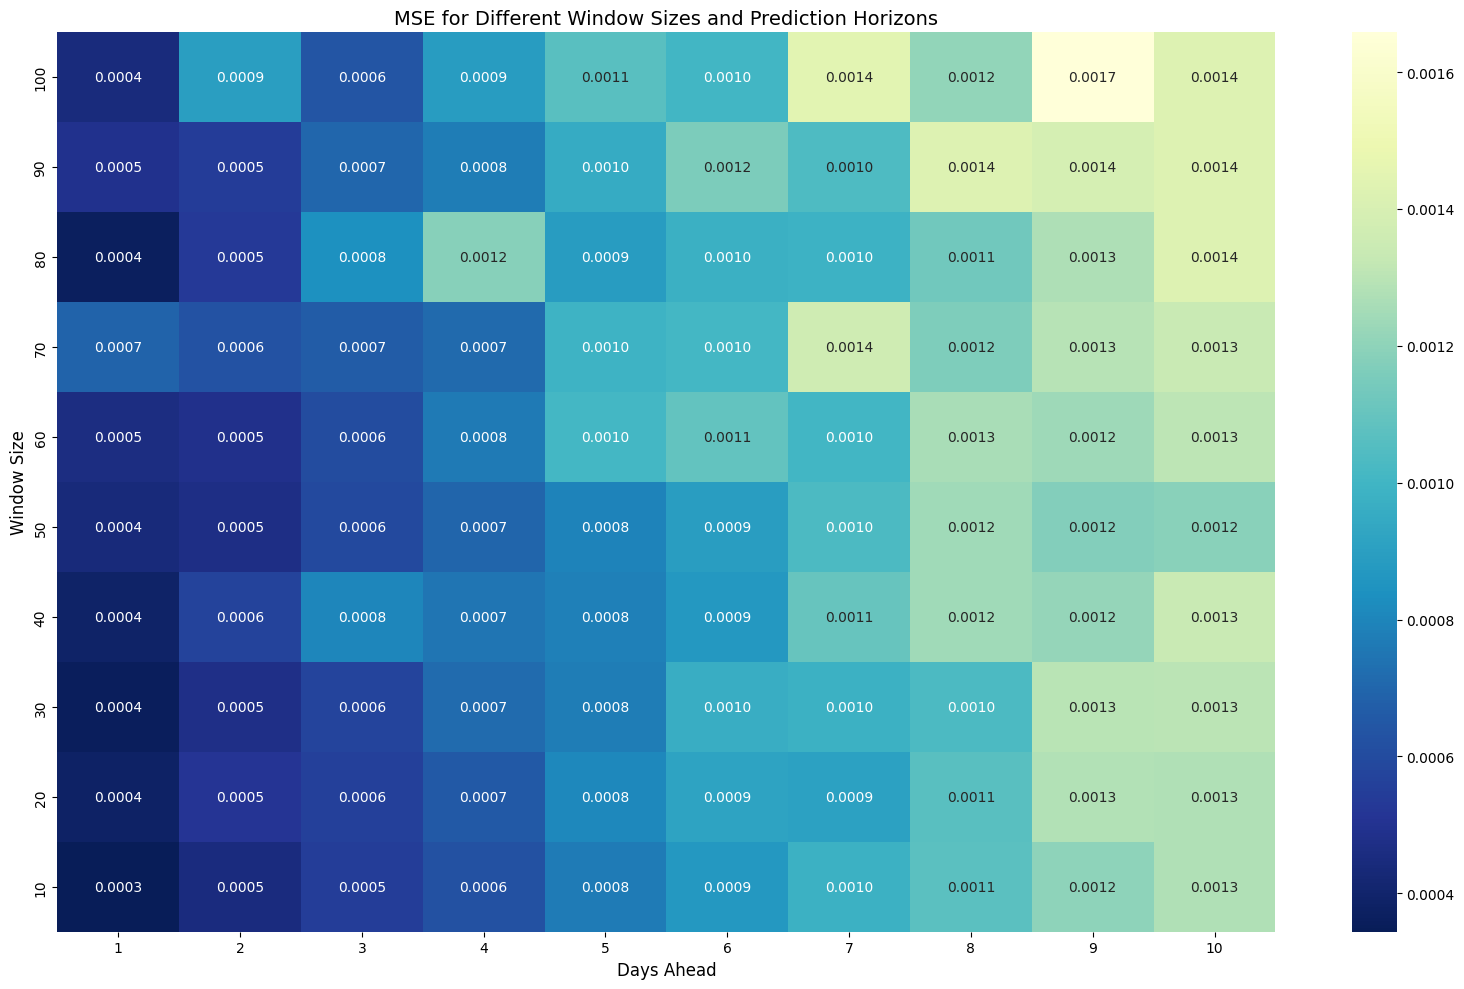

In [7]:
# Create figure with good size
plt.figure(figsize=(16, 10))

# Create enhanced heatmap
sns.heatmap(np.flipud(error), 
            annot=True,              
            fmt=".4f",               
            cmap="YlGnBu_r",         
            xticklabels=range(minWindowsPredicted, minWindowsPredicted + numberOfDataPoints * distanceBetweenDataPointsPredict, distanceBetweenDataPointsPredict),  # X-axis labels (1-10)
            yticklabels=range(minWindowsInput + numberOfDataPoints* distanceBetweenDataPointsWindows -distanceBetweenDataPointsWindows, minWindowsInput - 1, -distanceBetweenDataPointsWindows))  # Y-axis labels (1-10)

# Add axis labels and title
plt.xlabel('Days Ahead', fontsize=12)
plt.ylabel('Window Size', fontsize=12)
plt.title('MSE for Different Window Sizes and Prediction Horizons', fontsize=14)

# Save figure before showing
plt.tight_layout()
plt.savefig('window_analysis_heatmap.png', dpi=300)
plt.show()

X shape: (3797, 10)
y shape: (3797, 1)
Initializing network with layer sizes: [10, 128, 64, 32, 1]
Parameters loaded from params_W_10_1.npz


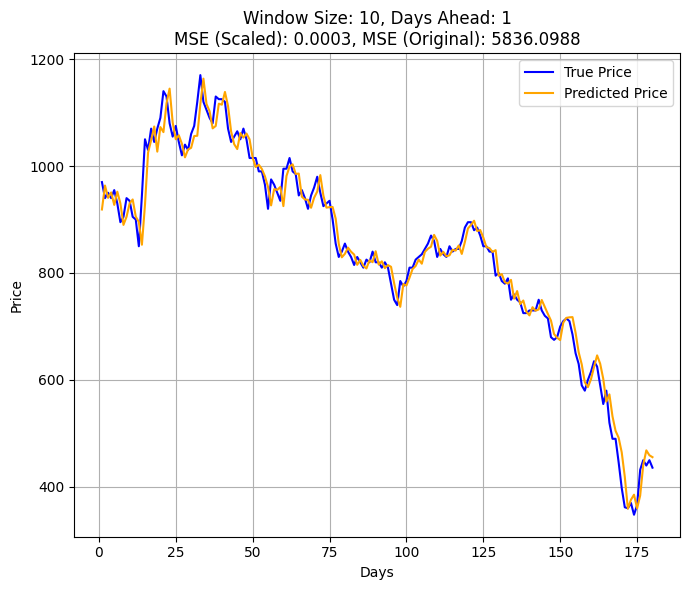

X shape: (3707, 100)
y shape: (3707, 1)
Initializing network with layer sizes: [100, 128, 64, 32, 1]
Parameters loaded from params_W_100_1.npz


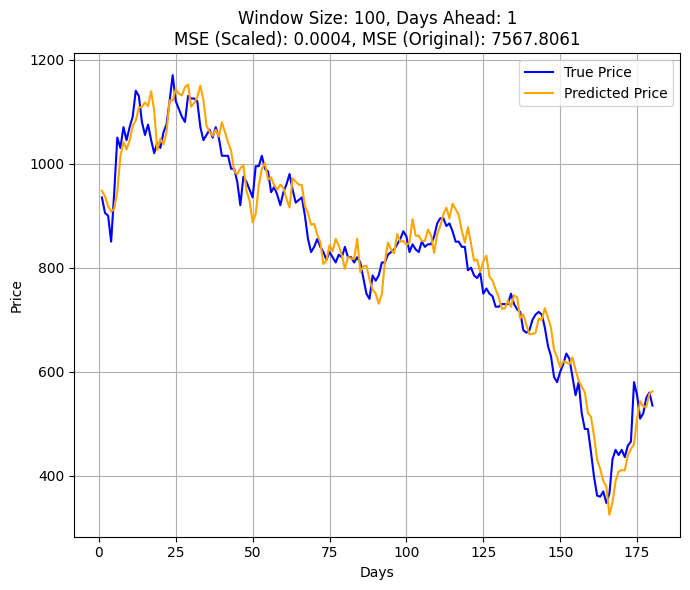

X shape: (3788, 10)
y shape: (3788, 10)
Initializing network with layer sizes: [10, 128, 64, 32, 10]
Parameters loaded from params_W_10_10.npz


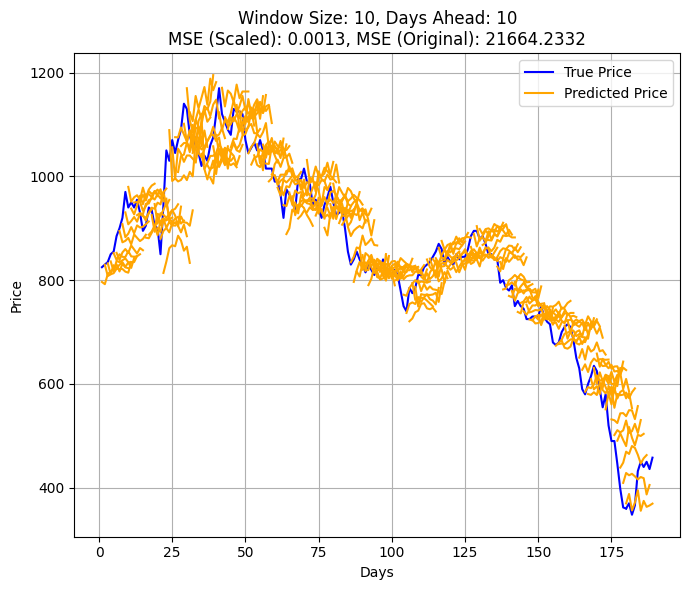

X shape: (3698, 100)
y shape: (3698, 10)
Initializing network with layer sizes: [100, 128, 64, 32, 10]
Parameters loaded from params_W_100_10.npz


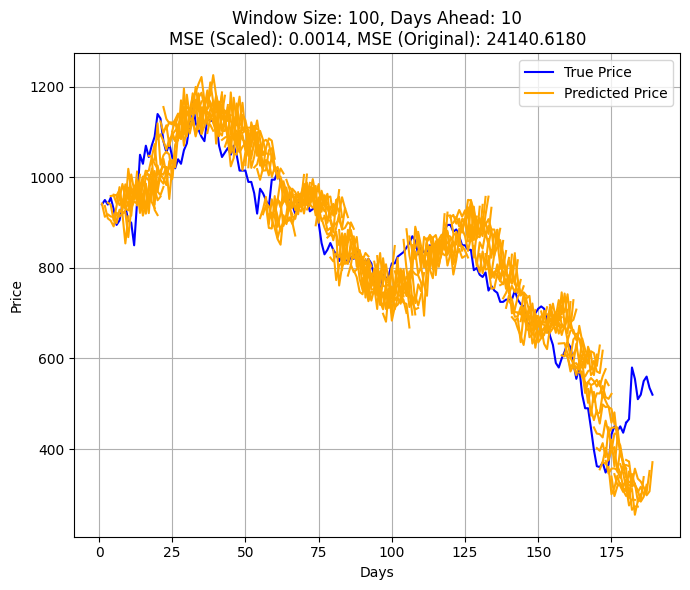

In [8]:
# Function remains the same
def visualize_case(window_size, days_ahead, scaler):
    # Create dataset with specific parameters
    X, y = create_dataset(scaled_data, window_size, days_ahead)
    
    # Use the same splitting approach as defined previously
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    
    # Load the appropriate model
    layer_sizes = [window_size, 128, 64, 32, days_ahead]
    model_name = f"W_{window_size}_{days_ahead}"
    model = BPNN(layer_sizes, model_name)
    
    # Generate predictions
    predictions = model.predict(X_test)
    
    # Calculate MSE on scaled data
    scaled_mse = mean_squared_error(y_test, predictions)
    
    # Inverse transform y_test and predictions to original scale
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
    pred_orig = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
    
    # Calculate MSE on original scale
    orig_mse = mean_squared_error(y_test_orig, pred_orig)
    
    return y_test_orig, pred_orig, scaled_mse, orig_mse

# Get min and max values
min_window = minWindowsInput
max_window = minWindowsInput + (numberOfDataPoints - 1) * distanceBetweenDataPointsWindows
min_days_ahead = minWindowsPredicted
max_days_ahead = minWindowsPredicted + (numberOfDataPoints - 1) * distanceBetweenDataPointsPredict

days_shown = 200

# Adjust days_shown based on the number of data points and distance between data points
days_shown -= 20

# Case 1: Min window, min days (single day prediction)

y_test_orig, pred_orig, scaled_mse1, orig_mse1 = visualize_case(min_window, min_days_ahead, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict

plt.figure(figsize=(7, 6))
plt.plot(X, y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X, pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {min_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse1:.4f}, MSE (Original): {orig_mse1:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case1.png', dpi=300)
plt.show()

# Case 2: Max window, min days (single day prediction)
y_test_orig, pred_orig, scaled_mse2, orig_mse2 = visualize_case(max_window, min_days_ahead, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict

plt.figure(figsize=(7, 6))
plt.plot(X,y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X,pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {max_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse2:.4f}, MSE (Original): {orig_mse2:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case2.png', dpi=300)
plt.show()


# Case 3: Min window, max days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse3, orig_mse3 = visualize_case(min_window, max_days_ahead, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')


for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {min_window}, Days Ahead: {max_days_ahead}\nMSE (Scaled): {scaled_mse3:.4f}, MSE (Original): {orig_mse3:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case3.png', dpi=300)
plt.show()

# Case 4: Max window, max days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse4, orig_mse4 = visualize_case(max_window, max_days_ahead, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')

for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {max_window}, Days Ahead: {max_days_ahead}\nMSE (Scaled): {scaled_mse4:.4f}, MSE (Original): {orig_mse4:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case4.png', dpi=300)
plt.show()


X shape: (3757, 50)
y shape: (3757, 1)
Initializing network with layer sizes: [50, 128, 64, 32, 1]
Parameters loaded from params_W_50_1.npz
Training data shape: (3005, 50), (3005, 1), Validation data shape: (376, 50), (376, 1), Testing data shape: (376, 50), (376, 1)
Parameters loaded from params_W_50_1.npz


Training Progress:   0%|          | 19/10000 [00:43<5:59:03,  2.16s/epoch, loss=0.000241, val_loss=5.54e-5, patience=1]

Epoch 20/10000, Training Loss: 0.000241, Validation Loss: 0.000055
Early stopping at epoch 20. Best validation loss: 0.000054


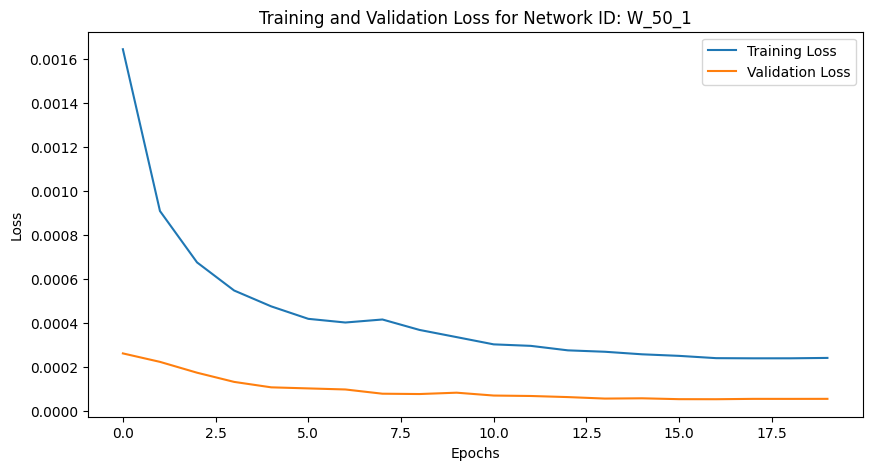

Training Progress:   0%|          | 19/10000 [00:44<6:28:19,  2.33s/epoch, loss=0.000241, val_loss=5.54e-5, patience=1]


Mean Squared Error: 0.00044055517548402843
X shape: (3757, 50)
y shape: (3757, 1)
Initializing network with layer sizes: [50, 128, 64, 32, 1]
Parameters loaded from params_W_50_1.npz


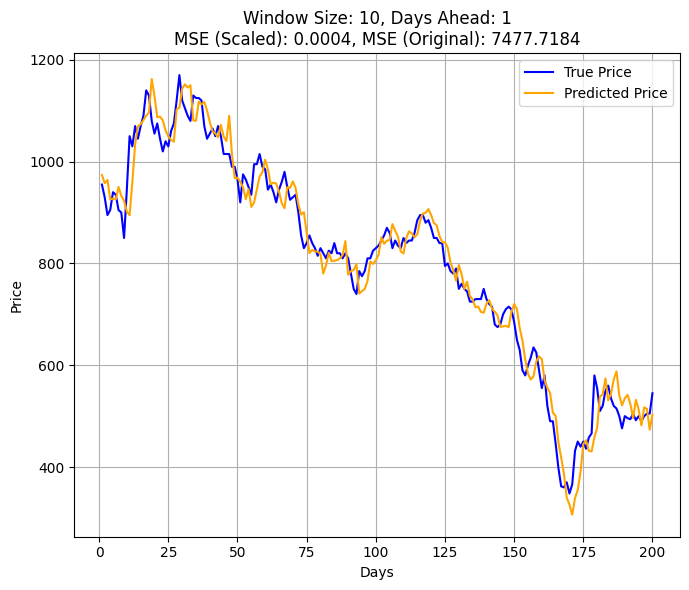

In [9]:
#Train
window_size = 50
days_ahead = 1
functionError(window_size, days_ahead);
#Test
days_shown = 200
y_test_orig, pred_orig, scaled_mse, orig_mse  = visualize_case(window_size, days_ahead, scaler)
X = (np.arange(days_shown) + 1)

plt.figure(figsize=(7, 6))
plt.plot(X, y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X, pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {min_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse:.4f}, MSE (Original): {orig_mse:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case.png', dpi=300)
plt.show()